In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [61]:
# ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# Í∏ÄÏî® ÏÑ†Î™ÖÌïòÍ≤å
set_matplotlib_formats("retina")

In [62]:
ads_list = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/ÏàòÏ†ï_Í¥ëÍ≥†Î™©Î°ù.csv')
print(f"Îç∞Ïù¥ÌÑ∞ Ïàò : {ads_list.shape}")
ads_list.head()

Îç∞Ïù¥ÌÑ∞ Ïàò : (445260, 26)


ads_idx    ads_code  aff_idx  adv_idx  sch_idx  ads_type  ads_category              ads_name  \
0      160  tr71opm6C1        6       10    13604         1             1              Î¶¨ÎãàÏßÄÎ†àÎìúÎÇòÏù¥Ï∏†   
1      284  xlNpfkgtLX        6       10    13605         1             1  Í∞ïÏ≤†ÏùòÌï®ÎåÄ:Ocean Overlord   
2      292  7Hj8V5QKiy        6       10    13606         1             1              Ïä§ÎÖ∏Ïö∞ SNOW   
3      304  1RfxHJcuEe        6       10    13607         2             1       ÏÑúÎ®∏ÎÑàÏ¶à Ïõå: Ï≤úÍ≥µÏùò ÏïÑÎ†àÎÇò   
4      306  l3GyilYEVk        6       10    23543         1             1                  ÌïòÏù¥ÎßàÌä∏   

                                                                                                  ads_search  \
0                                            Î¶¨ÎãàÏßÄÎ†àÎìúÎÇòÏù¥Ï∏†,com.ncsoft.redknights,ecaab3f9d2616f6e3e79867518ad495a   
1                                     Í∞ïÏ≤†ÏùòÌï®ÎåÄ:Ocean Overlord,com.gamepub.lw.g,a370ab701419a7fe0a8aa81ea6bb1c5d   
2                                              Ïä§ÎÖ∏Ïö∞ SNOW,com.campmobile.snow,5b892d7e0cff73621c5e505cf9452317   
3  ÏÑúÎ®∏ÎÑàÏ¶à Ïõå: Ï≤úÍ≥µÏùò ÏïÑÎ†àÎÇò,com.com2us.smon.normal.freefull.google.kr.android.common,57a5cb1d24df295d5040f763865b2e5d   
4                                                      ÌïòÏù¥ÎßàÌä∏,com.himart.main,8230c6a95581533fad10b0e3b1b8f529   

                                                                                                 ads_icon_img  \
0  https://lh3.googleusercontent.com/oDGXxngO9oOPImzdzn5lewYXGUy_qh45O4l-FdQ4K0zibGnQEXcIK4ekA2RQ1hhNpNs=w300   
1                               http://nextapps-nas.aws.appang.kr/icon/20161229124815888767968_1482983323.png   
2                               http://nextapps-nas.aws.appang.kr/icon/20160923110742923603784_1474596474.png   
3                                               http://nextapps-nas.aws.appang.kr/icon/EecpHzP_1452066806.png   
4                               http://nextapps-nas.aws.appang.kr/icon/20160321114431429829370_1458528364.png   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ads_summary  \
0                                                                                                                                                                                                                                                                                                

In [63]:
ads_info = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/ÏàòÏ†ï2_Í¥ëÍ≥†Ï∞∏Ïó¨Ï†ïÎ≥¥.csv')
print(f"Îç∞Ïù¥ÌÑ∞ Ïàò : {ads_info.shape}")
ads_info.head()

Îç∞Ïù¥ÌÑ∞ Ïàò : (16854865, 14)


click_key  ads_idx   dvc_idx  mda_idx  pub_sub_rel_id  contract_price  media_price   click_day  click_time           click_date     exp_day network  \
0  000000d54b9faad47ee99d6cd3cf53894dd4baa5   313780  61906528      539       144350110            6000         4500  2025-08-17          21  2025-08-17 21:07:37  2025-09-16       0   
1  000002b4d92f7648b455877c2676452efcd22a09   412426  34422806       58        46032732             180          170  2025-07-26           2  2025-07-26 02:18:24  2025-08-25     NaN   
2  0000057e97361ff3d0263aaecee34cfaa3ba30fb   443660  38366075      808               1             170          120  2025-08-12          18  2025-08-12 18:17:59  2025-09-11    WIFI   
3  00000607f60139015da3ee1dd5499db3faa100dc   360192  61894110      539       144350110            6000         4500  2025-08-17           3  2025-08-17 03:35:02  2025-09-16       0   
4  0000066bc25d4a6d147c27326cf972a4de88024e   372307  61956954      539       144350110           15600        11700  2025-08-18           8  2025-08-18 08:01:26  2025-09-17       0   

           user_ip  converted  
0    16.184.28.219          0  
1     35.78.117.76          1  
2      39.7.55.192          1  
3  211.252.100.157          0  
4     3.38.148.211          0

In [ ]:
domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/Ï∞∏Ïó¨Ï†ÅÎ¶ΩÏ°∞Ïù∏.csv')
print(f"Îç∞Ïù¥ÌÑ∞ Ïàò : {domain.shape}")
domain.head()

Îç∞Ïù¥ÌÑ∞ Ïàò : (16854865, 22)


Unnamed: 0                                 click_key  ads_idx   dvc_idx  mda_idx  pub_sub_rel_id  contract_price  media_price   click_day  click_time           click_date     exp_day network  \
0           0  000000d54b9faad47ee99d6cd3cf53894dd4baa5   313780  61906528      539       144350110            6000         4500  2025-08-17          21  2025-08-17 21:07:37  2025-09-16       0   
1           1  000002b4d92f7648b455877c2676452efcd22a09   412426  34422806       58        46032732             180          170  2025-07-26           2  2025-07-26 02:18:24  2025-08-25     NaN   
2           2  0000057e97361ff3d0263aaecee34cfaa3ba30fb   443660  38366075      808               1             170          120  2025-08-12          18  2025-08-12 18:17:59  2025-09-11    WIFI   
3           3  00000607f60139015da3ee1dd5499db3faa100dc   360192  61894110      539       144350110            6000         4500  2025-08-17           3  2025-08-17 03:35:02  2025-09-16       0   
4           4  0000066bc25d4a6d147c27326cf972a4de88024e   372307  61956954      539       144350110           15600        11700  2025-08-18           8  2025-08-18 08:01:26  2025-09-17       0   

           user_ip          rwd_idx    ads_code                                 advid  adv_cost  earn_cost              regdate    ctit  conversion  
0    16.184.28.219              NaN         NaN                                   NaN       NaN        NaN                  NaN     NaN           0  
1     35.78.117.76 238,313,226.0000  yuRe4YoPuZ  40ceb01c-9b60-4452-bacd-0e061fb18ab4  180.0000   170.0000  2025-07-26 02:19:21 57.0000           1  
2      39.7.55.192 239,017,177.0000  WuIp8HKmt9  73793f44-a471-4351-ae1c-d09accaf223a  170.0000   120.0000  2025-08-12 18:19:21 82.0000           1  
3  211.252.100.157              NaN         NaN                                   NaN       NaN        NaN                  NaN     NaN           0  
4     3.38.148.211              NaN         NaN                                   NaN       NaN        NaN                  NaN     NaN           0

: 

In [ ]:
part_earn = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/Ï∞∏Ïó¨Ï†ÅÎ¶ΩÏ°∞Ïù∏.csv')
print(f"Îç∞Ïù¥ÌÑ∞ Ïàò : {part_earn.shape}")
part_earn.head()

In [ ]:
ads_time = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/ÏãúÍ∞ÑÎ≥ÑÏ†ÅÎ¶ΩÎ≥¥Í≥†ÏÑú_1ÎÖÑÏπò.csv')
print(f"Îç∞Ïù¥ÌÑ∞ Ïàò : {ads_time.shape}")
ads_time.head()

Îç∞Ïù¥ÌÑ∞ Ïàò : (6953146, 12)


rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0    2024-07-27              0     4418      761             1              0   
1    2024-07-27              0     7377      213             1              0   
2    2024-07-27              0     7377      337             1              0   
3    2024-07-27              0     7377      496             1              1   
4    2024-07-27              0     7528      792             1              0   

   rpt_time_scost  rpt_time_acost  rpt_time_cost  rpt_time_earn  weekday  \
0               0               0              0              0        5   
1               0               0              0              0        5   
2               0               0              0              0        5   
3             230             230            180            180        5   
4               0               0              0              0        5   

  week_type  
0        Ï£ºÎßê  
1        Ï£ºÎßê  
2        Ï£ºÎßê  
3        Ï£ºÎßê  
4        Ï£ºÎßê

In [ ]:
domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/Í¥ëÍ≥†ÎèÑÎ©îÏù∏Î¶¨Ïä§Ìä∏.csv')
print(f"Îç∞Ïù¥ÌÑ∞ Ïàò : {domain.shape}")
domain.head()

Îç∞Ïù¥ÌÑ∞ Ïàò : (9517, 23)


Unnamed: 0  ads_idx    ads_code  aff_idx  adv_idx  ads_type  ads_category  \
0           0     6508  3u4lOKJAek       13      335         3            10   
1           1     6985  SijDrtH4GV       13      335         3             7   
2           2     8327  k1RZftVHoW       13      335         3            10   
3           3     9264  EGZcaVOtlc       23      220         3            10   
4           4     9716  NwZZq45Kgb        6       10         3             8   

          ads_name                                       ads_icon_img  \
0          Ïä§ÎßàÌä∏ÌîºÏã±Î≥¥Ìò∏      https://seimg.pincrux.com/icon/1551770735.png   
1      DBÏÜêÌï¥Î≥¥Ìóò Îã§Ïù¥Î†âÌä∏      https://seimg.pincrux.com/icon/1575337232.jpg   
2              ÌååÏùºÏç¨  https://static.i-screen.kr/img/ad/icon/aff_13_...   
3  ÌïòÎÇò Í∞ÄÎìùÎã¥ÏùÄ Ïö¥Ï†ÑÏûêÎ≥¥ÌóòÍ∞ÄÏûÖ                    https://i.imgur.com/kaWiYyT.png   
4      Î≤†Ïù¥ÎπÑÎü¨Î∏å Ï∞∏Ïó¨ Ïã†Ï≤≠  https://nextapps-nas.aws.appang.kr/icon/SDl2uC...   

                                         ads_summary  ...  \
0  [ÏÉÅÌíàÏÜåÍ∞ú]\nÏïåÎ©¥ ÌîºÌïòÍ≥†, Î™®Î•¥Î©¥ ÎãπÌïòÎäî Î≥¥Ïù¥Ïä§ÌîºÏã±\nÎÇòÏôÄ ÏÜåÏ§ëÌïú Í∞ÄÏ°±ÏùÑ ÏïàÏ†ÑÌïòÍ≤å...  ...   
1  [Ï∞∏Ïó¨Î∞©Î≤ï]\n- Îπ†Î•¥Í≥† Í∞ÑÌé∏Ìïú DBÏÜêÌï¥Î≥¥Ìóò Îã§Ïù¥Î†âÌä∏ÏóêÏÑú\n- ÎÇ¥ Ï∞® Î≥¥ÌóòÎ£åÎ•º ÏßÄÍ∏à...  ...   
2  [Ï∞∏Ïó¨ Î∞©Î≤ï]\n1. Í¥ëÍ≥† Ï∞∏Ïó¨ Î≤ÑÌäº ÌÑ∞ÏπòÌïòÏó¨ Ïù¥Î≤§Ìä∏ ÌéòÏù¥ÏßÄÎ°ú Ïù¥Îèô\n2. Ïù¥Î≤§Ìä∏ ...  ...   
3  ÌïòÎÇòÏÜêÌï¥Î≥¥Ìóò Îã§Ïù¥Î†âÌä∏ Ïö¥Ï†ÑÏûêÎ≥¥Ìóò Í∞ÄÏûÖÏãú\n\n01.Ï∞∏Ïó¨Î∞©Î≤ï\n1) Í≥ÑÏÇ∞ÌïòÍ∏∞ ÌéòÏù¥ÏßÄÎ•º...  ...   
4  [Ï∞∏Ïó¨Î∞©Î≤ï]\n- ÌéòÏù¥ÏßÄ Ïù¥Îèô > Î≤†Ïù¥Î≤ÑÎü¨Î∏å Ï∞∏Ïó¨Ïã†Ï≤≠ ÏôÑÎ£å\n- 25-55ÏÑ∏ SKT...  ...   

             ads_edate  ads_age_min ads_age_max ads_os_type  \
0  9999-12-31 00:00:00            0         100           7   
1  9999-06-06 00:00:00            0         100           7   
2  9999-12-31 23:59:00            0         100           7   
3  9999-12-31 23:59:59            0         100           7   
4  2029-11-29 00:00:00           25          55           2   

   ads_contract_price  ads_reward_price  ads_order  ads_rejoin_type  \
0                1400              1100    2381500             NONE   
1                2700              2300    1201938             NONE   
2                3200              2420    1673458             NONE   
3               11000              8250    2372800             NONE   
4                 600               480    2699900             NONE   

                   regdate   domain  
0  2020-04-23 17:53:01 UTC       Í∏àÏúµ  
1  2020-06-30 15:22:59 UTC       Í∏àÏúµ  
2  2020-11-10 11:21:43 UTC  ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†  
3  2020-11-30 15:16:45 UTC       Í∏àÏúµ  
4  2021-01-11 16:11:27 UTC       ÏÉùÌôú  

[5 rows x 23 columns]

In [ ]:
ads_timee = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/ÏãúÍ∞ÑÎ≥ÑÏ†ÅÎ¶ΩÎ≥¥Í≥†ÏÑú_1ÎÖÑÏπò.csv')
print(f"Îç∞Ïù¥ÌÑ∞ Ïàò : {ads_timee.shape}")
ads_timee.head()

Îç∞Ïù¥ÌÑ∞ Ïàò : (6953146, 12)


rpt_time_date  rpt_time_time  ads_idx  mda_idx  rpt_time_clk  rpt_time_turn  \
0    2024-07-27              0     4418      761             1              0   
1    2024-07-27              0     7377      213             1              0   
2    2024-07-27              0     7377      337             1              0   
3    2024-07-27              0     7377      496             1              1   
4    2024-07-27              0     7528      792             1              0   

   rpt_time_scost  rpt_time_acost  rpt_time_cost  rpt_time_earn  weekday  \
0               0               0              0              0        5   
1               0               0              0              0        5   
2               0               0              0              0        5   
3             230             230            180            180        5   
4               0               0              0              0        5   

  week_type  
0        Ï£ºÎßê  
1        Ï£ºÎßê  
2        Ï£ºÎßê  
3        Ï£ºÎßê  
4        Ï£ºÎßê

In [ ]:
ads_time["rpt_time_date"].nunique()

399

In [ ]:
ads_rwd = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/ÏàòÏ†ï_Í¥ëÍ≥†Ï†ÅÎ¶Ω.csv')
print(f"Îç∞Ïù¥ÌÑ∞ Ïàò : {ads_rwd.shape}")
ads_rwd.head()

Îç∞Ïù¥ÌÑ∞ Ïàò : (1475031, 14)


rwd_idx  ads_idx    ads_code  mda_idx  pub_sub_rel_id   dvc_idx  \
0  238304818   413490  CFZ6lzEmeD       22        27496512  32947806   
1  238304829   413490  CFZ6lzEmeD       22        27496512  47387244   
2  238304816   413490  CFZ6lzEmeD       22        27496512  32425124   
3  238304817   413490  CFZ6lzEmeD       22        27496513  34006545   
4  238304802   133653  rl8ud4uNQC      801               1  56867331   

                                  advid  \
0  09b6a808-4f76-4584-87c5-626f21f472a0   
1  ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e   
2  64c675d0-8edd-4478-9906-a806651fdf92   
3  a08ebb04-e70a-4492-89d4-17fa96bf8c75   
4  dbe54f40-41b5-4423-ae2f-048fd6ecf5af   

                                  click_key  adv_cost  earn_cost  \
0  b0e22dba943810794d25c993dff425c4e16d0744       190        120   
1  0679ff4c6a14beba296e44d7ffdd88129f42ffbf       190        120   
2  68eb28d636724061da21e490a1afff6a39cd78f7       190        120   
3  37da42f12b6f732d8c8bf1a609c01e569b7f8a09       190        120   
4  624b1bbc57c9ea81005c74e1956d48e76d974816       260        195   

            click_date              regdate  ctit  cost_diff  
0  2025-07-26 00:00:31  2025-07-26 00:05:02   271         70  
1  2025-07-26 00:00:32  2025-07-26 00:08:17   465         70  
2  2025-07-26 00:00:42  2025-07-26 00:04:43   241         70  
3  2025-07-26 00:00:54  2025-07-26 00:04:45   231         70  
4  2025-07-26 00:01:07  2025-07-26 00:02:04    57         65

In [ ]:
ads_info = ads_info.merge(domain[['ads_idx', 'domain']], on='ads_idx', how='left')


In [ ]:
cl_domain = domain.drop(['Unnamed: 0','ads_icon_img', 'ads_summary', 'ads_sdate', 
                         'ads_age_min', 'ads_age_max', 'regdate', 'ads_contract_price', 'ads_reward_price'], axis = 1)

In [ ]:
cl_part_earn = part_earn.drop(['Unnamed: 0', 'click_key', 'click_day', 'dvc_idx', 'user_ip'], axis=1)

In [ ]:
machesa = cl_part_earn.merge(cl_domain, on = ['ads_idx'], how='left')

In [ ]:
machesa.drop(['ads_code_x'], axis = 1, inplace=True)

In [ ]:
machesa.rename(columns={"ads_code_y":"ads_code"}, inplace=True)

In [ ]:
domain_dummies = pd.get_dummies(machesa['domain'], prefix = "domain")
df_domain = pd.concat([machesa[['mda_idx']], domain_dummies], axis=1)
domain_features = df_domain.groupby('mda_idx').sum()
domain_features.isna().sum()

domain_Í≤åÏûÑ         0
domain_ÍµêÏú°         0
domain_Í∏àÏúµ         0
domain_Í∏∞ÌÉÄ         0
domain_ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†    0
domain_Î∑∞Ìã∞         0
domain_ÎπÑÏòÅÎ¶¨/Í≥µÍ≥µ     0
domain_ÏÉùÌôú         0
domain_ÏãùÎãπ/Ïπ¥Ìéò      0
domain_ÏãùÏùåÎ£å        0
domain_Ïö¥Îèô/Ïä§Ìè¨Ï∏†     0
domain_Ïö¥ÏÑ∏         0
domain_ÏùòÎ£å/Í±¥Í∞ï      0
domain_Ï±ÑÏö©         0
domain_Ïª§Î®∏Ïä§        0
dtype: int64

In [ ]:
domain_features.head()

domain_Í≤åÏûÑ  domain_ÍµêÏú°  domain_Í∏àÏúµ  domain_Í∏∞ÌÉÄ  domain_ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†  \
mda_idx                                                               
12          187866          0       3971          0              53   
14           38866          0       3560         57           15755   
18            3315          0        914          0            1070   
22           37240         16      11756          0           15966   
26             423          0         41          0              20   

         domain_Î∑∞Ìã∞  domain_ÎπÑÏòÅÎ¶¨/Í≥µÍ≥µ  domain_ÏÉùÌôú  domain_ÏãùÎãπ/Ïπ¥Ìéò  domain_ÏãùÏùåÎ£å  \
mda_idx                                                                  
12               0           7300       1479             0         643   
14            5941              0       6248             0        6437   
18               0              0        617             0           0   
22             530           4813       2867            29        1138   
26               0              0        115             0           0   

         domain_Ïö¥Îèô/Ïä§Ìè¨Ï∏†  domain_Ïö¥ÏÑ∏  domain_ÏùòÎ£å/Í±¥Í∞ï  domain_Ï±ÑÏö©  domain_Ïª§Î®∏Ïä§  
mda_idx                                                                 
12                   0          0           131          0       30995  
14                   0          0          4810        888        2201  
18                   0          0             0          0          45  
22                 367         40          2462       3156        2975  
26                   0          0             0          0          79

In [ ]:
# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïà´Ïûê Î≥ÄÌôò + Í≤∞Ï∏°Ïπò 0)
X = domain_features.apply(pd.to_numeric, errors='coerce').fillna(0.0)

# Ï†ÑÎ∂Ä 0Ïù∏ Ìñâ Ï†úÍ±∞ (ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂àÍ∞ÄÎä•Ìïú Ìñâ Ï†úÍ±∞)
nz_mask = (X.sum(axis=1) > 0)
X = X[nz_mask]

# 2) k Í∞íÎ≥Ñ Silhouette Í≥ÑÏÇ∞
sil_scores = {}
k_max = min(11, X.shape[0])  # ÌëúÎ≥∏ ÏàòÎ≥¥Îã§ k ÌÅ¨Î©¥ ÏïàÎê®
for k in range(2, k_max):  # k=2~10
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sizes = np.bincount(labels)

    if len(set(labels)) > 1 and sizes.min() >= 2:
        sil_scores[k] = silhouette_score(X, labels)

# 3) Í≤∞Í≥º Ï∂úÎ†•
if sil_scores:
    print("kÎ≥Ñ Silhouette Ï†êÏàò:", {k: round(v,3) for k,v in sil_scores.items()})
    best_k = max(sil_scores, key=sil_scores.get)
    print(f"ÏµúÏ†Å k = {best_k}, silhouette = {sil_scores[best_k]:.3f}")
else:
    print("Ïú†Ìö®Ìïú Silhouette Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏßÄ Î™ªÌñàÏäµÎãàÎã§.")

# 4) Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
if sil_scores:
    plt.figure(figsize=(6,4))
    plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score by k (ÎèÑÎ©îÏù∏ Features)")
    plt.grid(True)
    plt.show()


Ïú†Ìö®Ìïú Silhouette Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏßÄ Î™ªÌñàÏäµÎãàÎã§.


In [ ]:
ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=Ïõî ~ 6=Ïùº

def daypart(h):
    if 6 <= h < 10:  return 'ÏïÑÏπ®(06-10)'
    if 10 <= h < 14: return 'ÎÇÆ(10-14)'
    if 14 <= h < 18: return 'Ïò§ÌõÑ(14-18)'
    if 18 <= h < 22: return 'Ï†ÄÎÖÅ(18-22)'
    if 22 <= h or h < 2: return 'Ïã¨Ïïº(22-02)'
    return 'ÏÉàÎ≤Ω(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

In [ ]:
summary = (
    ads_time.groupby(['mda_idx','weekday','daypart'], as_index=False)
            .agg(clicks=('rpt_time_clk','sum'),
                 turns=('rpt_time_turn','sum'))
)

In [ ]:
summary['cvr'] = np.where(summary['clicks'] > 0,
                          summary['turns'] / summary['clicks'], 0.0)
summary = summary.replace([np.inf, -np.inf], 0.0)


In [ ]:
best_eff = (summary.sort_values(['mda_idx','cvr'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='ÏµúÍ≥† Ìö®Ïú®'))

best_clk = (summary.sort_values(['mda_idx','clicks'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='ÏµúÎã§ ÌÅ¥Î¶≠'))

final_result = pd.concat([best_eff, best_clk], ignore_index=True)


In [ ]:
weekday_map = {0:'Ïõî',1:'Ìôî',2:'Ïàò',3:'Î™©',4:'Í∏à',5:'ÌÜ†',6:'Ïùº'}
final_result['weekday_name'] = final_result['weekday'].map(weekday_map)

eff = final_result[final_result['type']=='ÏµúÍ≥† Ìö®Ïú®'] \
        .rename(columns={'weekday_name':'weekday_name_eff',
                         'daypart':'daypart_eff',
                         'clicks':'clicks_eff',
                         'turns':'turns_eff',
                         'cvr':'cvr_eff'}) \
        [['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']]

vol = final_result[final_result['type']=='ÏµúÎã§ ÌÅ¥Î¶≠'] \
        .rename(columns={'weekday_name':'weekday_name_vol',
                         'daypart':'daypart_vol',
                         'clicks':'clicks_vol',
                         'turns':'turns_vol',
                         'cvr':'cvr_vol'}) \
        [['mda_idx','weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol']]


In [ ]:
time_report = eff.merge(vol, on='mda_idx', how='outer')

In [ ]:
time_report['slot_match'] = (
    (time_report['weekday_name_eff'] == time_report['weekday_name_vol']) &
    (time_report['daypart_eff'] == time_report['daypart_vol'])
)


In [ ]:
time_report = time_report[[
    'mda_idx',
    'weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff',
    'weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol',
    'slot_match'
]].sort_values('mda_idx').reset_index(drop=True)

In [ ]:
time_report

mda_idx weekday_name_eff daypart_eff  clicks_eff  turns_eff   cvr_eff  \
0         12                Î™©   Ï†ÄÎÖÅ(18-22)        3550       1716  0.483380   
1         14                Í∏à   Ïã¨Ïïº(22-02)        5261       2125  0.403916   
2         18                Ïõî    ÎÇÆ(10-14)         174         15  0.086207   
3         22                Í∏à   ÏïÑÏπ®(06-10)        2346       1561  0.665388   
4         26                Î™©   ÏÉàÎ≤Ω(02-06)          17          8  0.470588   
..       ...              ...         ...         ...        ...       ...   
186     1051                Ìôî   Ïã¨Ïïº(22-02)           4          3  0.750000   
187     1055                Ïùº   Ïã¨Ïïº(22-02)           3          0  0.000000   
188     1057                Ïàò    ÎÇÆ(10-14)           1          1  1.000000   
189     1059                Í∏à   Ïò§ÌõÑ(14-18)           6          0  0.000000   
190     1061                Ïõî   Ï†ÄÎÖÅ(18-22)           2          2  1.000000   

    weekday_name_vol daypart_vol  clicks_vol  turns_vol   cvr_vol  slot_match  
0                  ÌÜ†   ÏÉàÎ≤Ω(02-06)       21824       9273  0.424899       False  
1                  Í∏à   Ïã¨Ïïº(22-02)        5261       2125  0.403916        True  
2                  Ïàò   Ï†ÄÎÖÅ(18-22)         268          9  0.033582       False  
3                  Ïùº   ÏÉàÎ≤Ω(02-06)        3689       1888  0.511792       False  
4                  Ïùº   ÏïÑÏπ®(06-10)          49          4  0.081633       False  
..               ...         ...         ...        ...       ...         ...  
186                Ìôî   Ïã¨Ïïº(22-02)           4          3  0.750000        True  
187                Ïùº   Ïã¨Ïïº(22-02)           3          0  0.000000        True  
188                Ìôî   Ï†ÄÎÖÅ(18-22)           2          1  0.500000       False  
189                Í∏à   Ïò§ÌõÑ(14-18)           6          0  0.000000        True  
190                Ïõî   Ï†ÄÎÖÅ(18-22)           2          2  1.000000        True  

[191 rows x 12 columns]

In [ ]:
time_report["daypart_eff"] = time_report["daypart_eff"].str.replace(r"\(.*\)", "", regex=True).str.strip()
time_report["daypart_vol"] = time_report["daypart_vol"].str.replace(r"\(.*\)", "", regex=True).str.strip()


In [ ]:
time_report

mda_idx weekday_name_eff daypart_eff  clicks_eff  turns_eff   cvr_eff  \
0         12                Î™©          Ï†ÄÎÖÅ        3550       1716  0.483380   
1         14                Í∏à          Ïã¨Ïïº        5261       2125  0.403916   
2         18                Ïõî           ÎÇÆ         174         15  0.086207   
3         22                Í∏à          ÏïÑÏπ®        2346       1561  0.665388   
4         26                Î™©          ÏÉàÎ≤Ω          17          8  0.470588   
..       ...              ...         ...         ...        ...       ...   
186     1051                Ìôî          Ïã¨Ïïº           4          3  0.750000   
187     1055                Ïùº          Ïã¨Ïïº           3          0  0.000000   
188     1057                Ïàò           ÎÇÆ           1          1  1.000000   
189     1059                Í∏à          Ïò§ÌõÑ           6          0  0.000000   
190     1061                Ïõî          Ï†ÄÎÖÅ           2          2  1.000000   

    weekday_name_vol daypart_vol  clicks_vol  turns_vol   cvr_vol  slot_match  
0                  ÌÜ†          ÏÉàÎ≤Ω       21824       9273  0.424899       False  
1                  Í∏à          Ïã¨Ïïº        5261       2125  0.403916        True  
2                  Ïàò          Ï†ÄÎÖÅ         268          9  0.033582       False  
3                  Ïùº          ÏÉàÎ≤Ω        3689       1888  0.511792       False  
4                  Ïùº          ÏïÑÏπ®          49          4  0.081633       False  
..               ...         ...         ...        ...       ...         ...  
186                Ìôî          Ïã¨Ïïº           4          3  0.750000        True  
187                Ïùº          Ïã¨Ïïº           3          0  0.000000        True  
188                Ìôî          Ï†ÄÎÖÅ           2          1  0.500000       False  
189                Í∏à          Ïò§ÌõÑ           6          0  0.000000        True  
190                Ïõî          Ï†ÄÎÖÅ           2          2  1.000000        True  

[191 rows x 12 columns]

In [ ]:
# 1. ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù (Î≤îÏ£ºÌòï + ÏÑ±Í≥ºÏßÄÌëú)
cat_cols = ['weekday_name_eff', 'daypart_eff']
num_cols = ['clicks_eff', 'turns_eff', 'cvr_eff']

# 2. Î≤îÏ£ºÌòï ÏõêÌï´ Ïù∏ÏΩîÎî©
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(time_report[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 3. Í≤∞Ìï©
X = pd.concat([
    pd.DataFrame(encoded, columns=encoded_cols, index=time_report.index),
    time_report[num_cols].reset_index(drop=True)
], axis=1)

# 4. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: k=3~5)
for k in [3,4,5]:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    time_report[f'cluster_{k}_time'] = labels
    
    print("="*12, f"k={k} Í≤∞Í≥º", "="*12)
    print(time_report.groupby(f'cluster_{k}_time')[num_cols].mean())


============ k=3 Í≤∞Í≥º ============
                  clicks_eff    turns_eff   cvr_eff
cluster_3_time                                     
0                 290.008197   142.868852  0.732489
1                 282.890625   180.437500  0.722196
2               12068.600000  7925.400000  0.663277
============ k=4 Í≤∞Í≥º ============
                  clicks_eff    turns_eff   cvr_eff
cluster_4_time                                     
0                 443.593750   214.156250  0.651408
1                 262.761468   153.853211  0.660578
2                 236.666667   119.000000  0.949694
3               12068.600000  7925.400000  0.663277
============ k=5 Í≤∞Í≥º ============
                  clicks_eff    turns_eff   cvr_eff
cluster_5_time                                     
0                 193.918605   112.558140  0.645690
1                 247.581395   124.395349  0.924099
2                 443.593750   214.156250  0.651408
3               12068.600000  7925.400000  0.663277
4    

In [ ]:
# --- ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Î™©Î°ù ÎΩëÍ∏∞ (k=3,4,5 Î™®Îëê) ---

ks = [3, 4, 5]

def get_cluster_members(df, cluster_col):
    """
    df: time_report
    cluster_col: 'cluster_3_time' Í∞ôÏùÄ Ïª¨ÎüºÎ™Ö
    return:
      - unique_mda: {ÌÅ¥Îü¨Ïä§ÌÑ∞: [Í≥†Ïú† mda_idx Î¶¨Ïä§Ìä∏]}
      - detailed:   {ÌÅ¥Îü¨Ïä§ÌÑ∞: [(mda_idx, weekday, daypart) ...] Î¶¨Ïä§Ìä∏}
    """
    # ÌïÑÏöîÌïú Ïª¨ÎüºÎßå
    tmp = df[['mda_idx', 'weekday_name_eff', 'daypart_eff', cluster_col]].copy()

    # 1) ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ 'Í≥†Ïú† Îß§Ï≤¥ÏÇ¨' Î¶¨Ïä§Ìä∏
    unique_mda = {
        c: sorted(tmp.loc[tmp[cluster_col] == c, 'mda_idx'].unique().tolist())
        for c in sorted(tmp[cluster_col].unique())
    }

    # 2) ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ '(Îß§Ï≤¥ÏÇ¨, ÏöîÏùº, ÏãúÍ∞ÑÎåÄ)' ÏÉÅÏÑ∏ Î¶¨Ïä§Ìä∏
    detailed = {
        c: tmp.loc[tmp[cluster_col] == c, ['mda_idx','weekday_name_eff','daypart_eff']] \
              .sort_values(['mda_idx','weekday_name_eff','daypart_eff']) \
              .apply(tuple, axis=1).tolist()
        for c in sorted(tmp[cluster_col].unique())
    }
    return unique_mda, detailed


for k in ks:
    col = f'cluster_{k}_time'
    unique_mda, detailed = get_cluster_members(time_report, col)

    print("="*12, f"k={k} ({col})", "="*12)
    # Í≥†Ïú† Îß§Ï≤¥ÏÇ¨ Î¶¨Ïä§Ìä∏ Ï∂úÎ†•
    for c, mda_list in unique_mda.items():
        print(f"\n=== Cluster {c} Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===")
        print(mda_list[:20])   # Í∏∏Î©¥ Ïïû 20Í∞úÎßå ÎØ∏Î¶¨Î≥¥Í∏∞
        print(f"... Ï¥ù {len(mda_list)}Í∞ú Îß§Ï≤¥ÏÇ¨")

    # ÌïÑÏöî Ïãú ÏÉÅÏÑ∏ Ï°∞Ìï©ÎèÑ ÌôïÏù∏
    # for c, combos in detailed.items():
    #     print(f"\n--- Cluster {c} (mda_idx, ÏöîÏùº, ÏãúÍ∞ÑÎåÄ) Ï°∞Ìï© ---")
    #     print(combos[:20])
    #     print(f"... Ï¥ù {len(combos)}Í∞ú Ï°∞Ìï©")


============ k=3 (cluster_3_time) ============

=== Cluster 0 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[12, 14, 18, 22, 30, 32, 54, 56, 73, 87, 108, 270, 281, 291, 337, 344, 356, 371, 374, 375]
... Ï¥ù 122Í∞ú Îß§Ï≤¥ÏÇ¨

=== Cluster 1 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[26, 246, 290, 294, 303, 324, 340, 341, 389, 397, 409, 442, 482, 578, 579, 582, 637, 638, 639, 643]
... Ï¥ù 64Í∞ú Îß§Ï≤¥ÏÇ¨

=== Cluster 2 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[58, 342, 343, 396, 563]
... Ï¥ù 5Í∞ú Îß§Ï≤¥ÏÇ¨
============ k=4 (cluster_4_time) ============

=== Cluster 0 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[30, 324, 375, 385, 458, 496, 578, 579, 583, 621, 643, 672, 675, 682, 683, 684, 687, 688, 700, 701]
... Ï¥ù 32Í∞ú Îß§Ï≤¥ÏÇ¨

=== Cluster 1 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[12, 18, 26, 32, 56, 73, 87, 108, 246, 270, 281, 290, 291, 294, 303, 341, 344, 356, 371, 374]
... Ï¥ù 109Í∞ú Îß§Ï≤¥ÏÇ¨

=== Cluster 2 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[14, 22, 54, 337, 340, 389, 480, 582, 645, 651, 654, 671, 676, 677, 678, 685, 702, 711, 718, 725]
... Ï¥ù 45Í∞ú Îß§Ï≤¥ÏÇ¨

=== Cluster 3 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†

In [ ]:
time_report['cluster_5_time'].value_counts()

cluster_5_time
0    86
1    43
2    32
4    25
3     5
Name: count, dtype: int64

In [ ]:
# k=5 ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º ÌôïÏù∏
cols_to_show = [
    'mda_idx', 'weekday_name_eff', 'daypart_eff',
    'clicks_eff', 'turns_eff', 'cvr_eff',
    'cluster_5_time'
]

# Ï†ÑÏ≤¥ Îß§Ï≤¥ÏÇ¨Î≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Î≥¥Í∏∞
display(time_report[cols_to_show].sort_values(['cluster_5_time','mda_idx']))


mda_idx weekday_name_eff daypart_eff  clicks_eff  turns_eff   cvr_eff  \
2         18                Ïõî           ÎÇÆ         174         15  0.086207   
10        73                Ìôî          Ïò§ÌõÑ           4          1  0.250000   
11        87                Ïõî          ÏïÑÏπ®           2          1  0.500000   
12       108                Ìôî          ÏïÑÏπ®           1          1  1.000000   
13       246                Ïõî          ÏÉàÎ≤Ω          32         33  1.031250   
..       ...              ...         ...         ...        ...       ...   
144      973                Î™©           ÎÇÆ           1          1  1.000000   
158     1018                Î™©          Ïò§ÌõÑ           9          3  0.333333   
159     1019                Î™©          ÏÉàÎ≤Ω           9         10  1.111111   
170     1030                Î™©          Ï†ÄÎÖÅ           2          3  1.500000   
173     1033                Î™©           ÎÇÆ           3          3  1.000000   

     cluster_5_time  
2                 0  
10                0  
11                0  
12                0  
13                0  
..              ...  
144               4  
158               4  
159               4  
170               4  
173               4  

[191 rows x 7 columns]

In [ ]:
# ÏöîÏùº+ÏãúÍ∞ÑÎåÄÎßå Ïù∏ÏΩîÎî©
X_time = encoder.fit_transform(time_report[['weekday_name_eff','daypart_eff']])

kmeans = KMeans(n_clusters=4, n_init=50, random_state=42)
time_report['cluster_time'] = kmeans.fit_predict(X_time)

print(time_report.groupby('cluster_time')[['weekday_name_eff','daypart_eff']].value_counts())


cluster_time  weekday_name_eff  daypart_eff
0             Í∏à                 Ïò§ÌõÑ              9
              Ïõî                 ÎÇÆ               8
              Î™©                 Ïò§ÌõÑ              7
                                ÎÇÆ               6
              Ïõî                 ÏïÑÏπ®              5
              Í∏à                 ÎÇÆ               3
              Ïàò                 ÏïÑÏπ®              3
              Ïõî                 Ïò§ÌõÑ              3
              Ìôî                 ÏïÑÏπ®              3
                                Ïò§ÌõÑ              3
              Í∏à                 ÏïÑÏπ®              2
              Î™©                 ÏïÑÏπ®              2
              Ïàò                 Ïò§ÌõÑ              2
              Ìôî                 ÎÇÆ               2
              Ïàò                 ÎÇÆ               1
              Ïùº                 ÎÇÆ               1
                                Ïò§ÌõÑ              1
              ÌÜ†     

In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®Ïù¥ Î∂ôÏùÄ ÌÖåÏù¥Î∏îÏóêÏÑú Í≥†Ïú† Îß§Ï≤¥ÏÇ¨Îßå
result_time = time_report[['mda_idx', 'weekday_name_eff', 'daypart_eff', 'cluster_time']].copy()

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú 'Í≥†Ïú† mda_idx' Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
cluster_members = {
    c: sorted(result_time.loc[result_time['cluster_time'] == c, 'mda_idx'].unique().tolist())
    for c in sorted(result_time['cluster_time'].unique())
}

# ÌôïÏù∏ Ï∂úÎ†•
for c, mda_list in cluster_members.items():
    print(f"=== Cluster {c} Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===")
    print(mda_list[:20])  # ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Ïïû 20Í∞úÎßå ÎØ∏Î¶¨Î≥¥Í∏∞
    print(f"... Ï¥ù {len(mda_list)}Í∞ú Îß§Ï≤¥ÏÇ¨\n")


=== Cluster 0 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[18, 22, 32, 54, 56, 73, 87, 108, 270, 281, 291, 337, 342, 344, 356, 375, 396, 398, 401, 437]
... Ï¥ù 63Í∞ú Îß§Ï≤¥ÏÇ¨

=== Cluster 1 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[26, 58, 246, 290, 294, 303, 324, 340, 341, 389, 397, 409, 442, 482, 578, 579, 582, 637, 638, 639]
... Ï¥ù 65Í∞ú Îß§Ï≤¥ÏÇ¨

=== Cluster 2 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[14, 30, 343, 371, 384, 385, 492, 496, 540, 562, 563, 621, 630, 671, 710, 714, 718, 740, 769, 792]
... Ï¥ù 29Í∞ú Îß§Ï≤¥ÏÇ¨

=== Cluster 3 Îß§Ï≤¥ÏÇ¨(Í≥†Ïú†) ===
[12, 374, 458, 480, 564, 568, 676, 677, 678, 684, 685, 716, 725, 758, 760, 774, 796, 797, 980, 995]
... Ï¥ù 34Í∞ú Îß§Ï≤¥ÏÇ¨



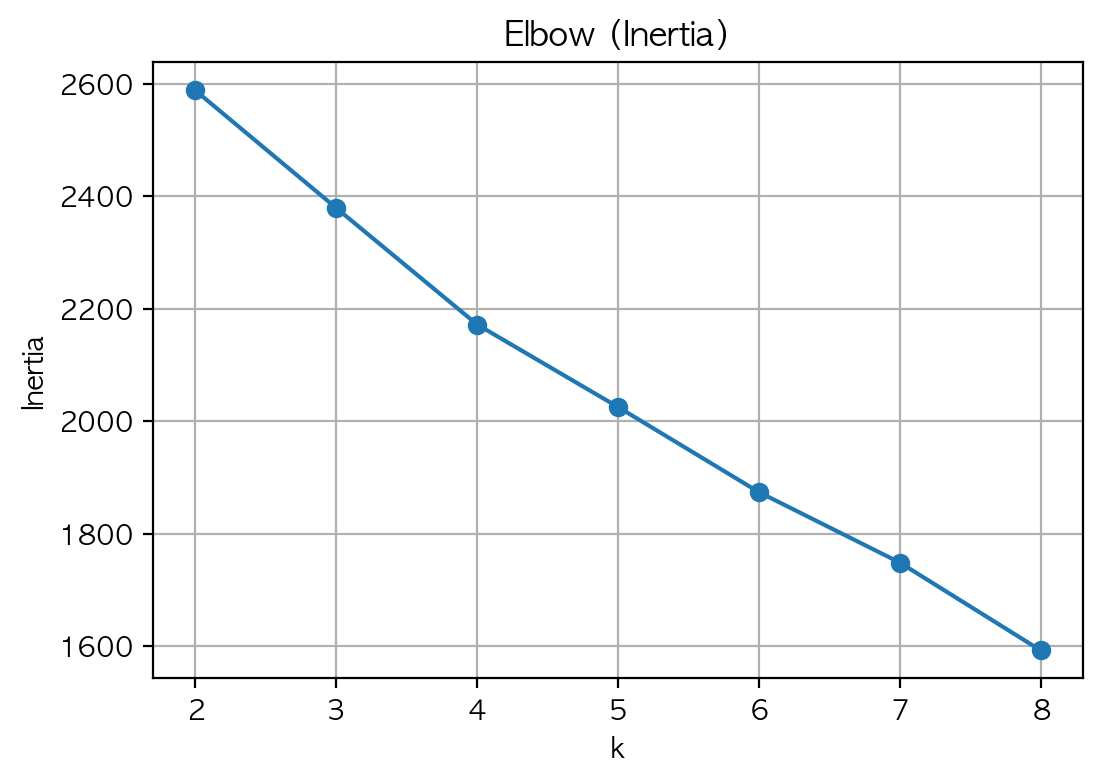

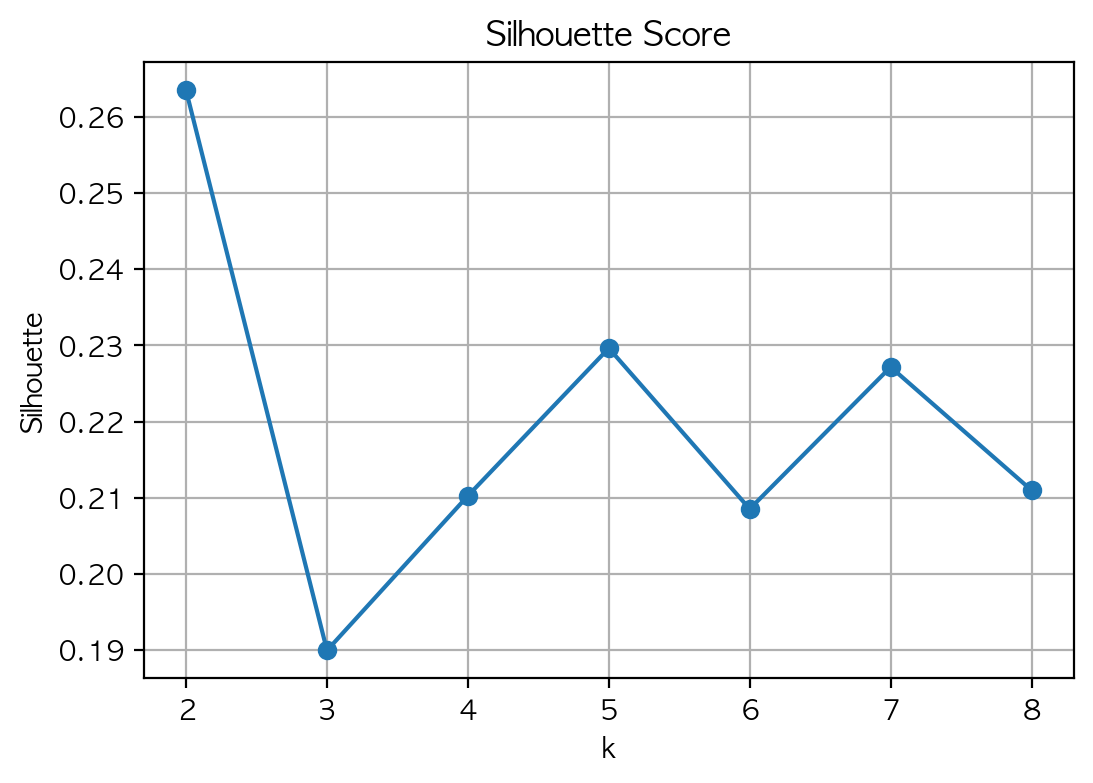

[INFO] ÏÑ†ÌÉùÎêú k = 2


domain_Í≤åÏûÑ  domain_ÍµêÏú°  domain_Í∏àÏúµ  domain_Í∏∞ÌÉÄ  domain_ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†  \
cluster                                                               
0         0.355082   0.008154   0.052659   0.020280        0.050731   
1         0.196989   0.000074   0.382529   0.000465        0.139530   

         domain_Î∑∞Ìã∞  domain_ÎπÑÏòÅÎ¶¨/Í≥µÍ≥µ  domain_ÏÉùÌôú  domain_ÏãùÎãπ/Ïπ¥Ìéò  domain_ÏãùÏùåÎ£å  \
cluster                                                                  
0         0.026844       0.030234   0.060569      0.045059    0.037800   
1         0.023124       0.005997   0.063444      0.020234    0.002717   

         domain_Ïö¥Îèô/Ïä§Ìè¨Ï∏†  domain_Ïö¥ÏÑ∏  domain_ÏùòÎ£å/Í±¥Í∞ï  domain_Ï±ÑÏö©  domain_Ïª§Î®∏Ïä§  
cluster                                                                 
0             0.011555   0.052461      0.043568   0.027541    0.177462  
1             0.000243   0.005523      0.003676   0.106192    0.049261

top_domains
cluster                                                   
0        Í≤åÏûÑ(35.51%), Ïª§Î®∏Ïä§(17.75%), ÏÉùÌôú(6.06%), Í∏àÏúµ(5.27%),...
1        Í∏àÏúµ(38.25%), Í≤åÏûÑ(19.70%), ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†(13.95%), Ï±ÑÏö©(10...

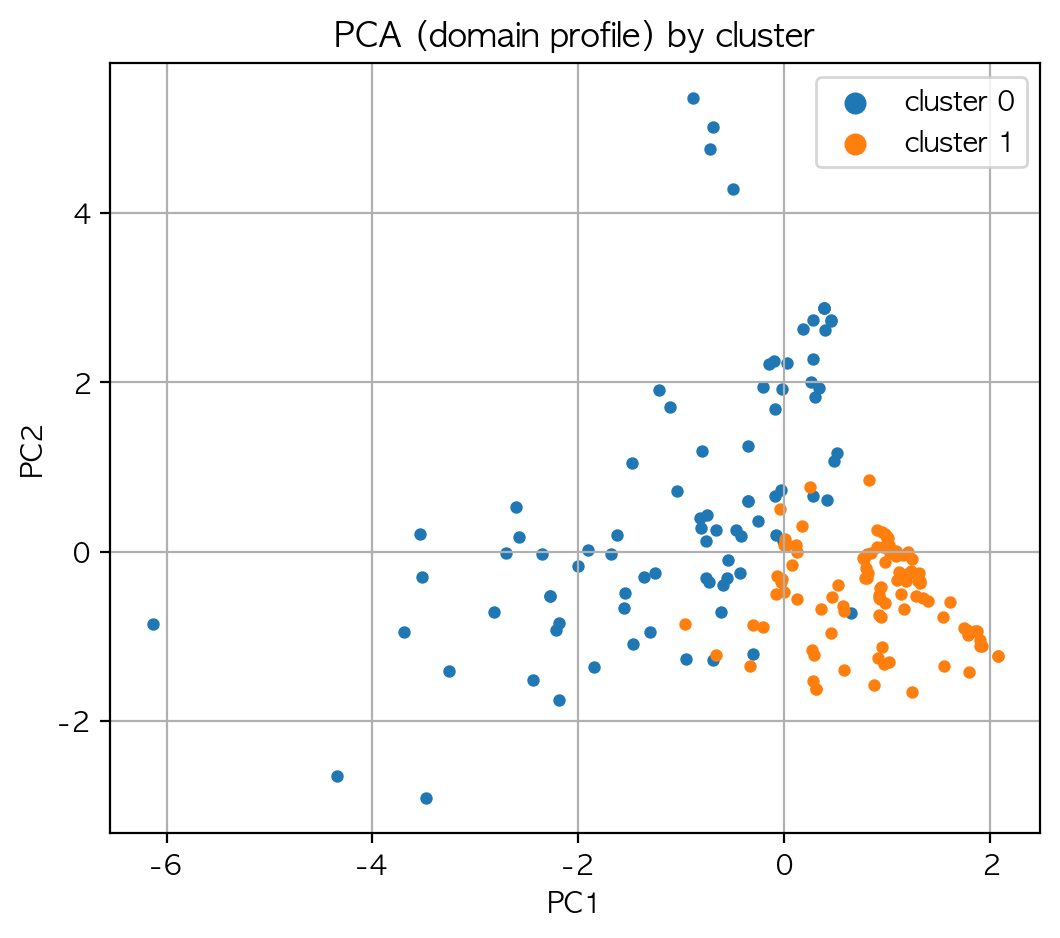

[DONE] mda_idx ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏôÑÎ£å


In [ ]:
# ----------------------------------
# 0) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() Í≤∞Í≥ºÎùºÍ≥† Í∞ÄÏ†ï
# ÏòàÏãú) domain_features.head()
# index = mda_idx, columns = ["domain_Í≤åÏûÑ", "domain_ÍµêÏú°", ...]
df = domain_features.copy()

# Í≤∞Ï∏°Ïπò/Î¨¥ÌïúÎåÄ Ï†ïÎ¶¨
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# (ÏÑ†ÌÉù) ÌôúÎèôÎüâ Ìé∏Ï∞®Í∞Ä ÌÅ¨Îã§Î©¥ ÎπÑÏú®(Ï†ïÍ∑úÌôî) Í∏∞Î∞ò ÌäπÏßïÏúºÎ°ú Î≥ÄÌôò Í∂åÏû•
# Í∞Å mda_idxÏùò Ï¥ùÌï©ÏúºÎ°ú ÎÇòÎà† ÎèÑÎ©îÏù∏ Î∂ÑÌè¨(ÌôïÎ•†)Î°ú Î≥ÄÌôò
row_sum = df.sum(axis=1)
row_sum[row_sum == 0] = 1  # 0 division Î∞©ÏßÄ
df_ratio = df.div(row_sum, axis=0)

# (ÏÑ†ÌÉù) 0-Î∂ÑÏÇ∞(ÏÉÅÏàò)Ïù∏ Ïª¨Îüº Ï†úÍ±∞ (ÌïôÏäµ ÏïàÏ†ïÏÑ±)
var = df_ratio.var(axis=0)
keep_cols = var[var > 0].index
X = df_ratio[keep_cols].values

# 1) Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()  # ÌòπÏùÄ MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2) k Í∞í ÌÉêÏÉâ (ÏóòÎ≥¥ & Ïã§Î£®Ïó£)
ks = range(2, 9)  # 2~8Í∞ú Íµ∞Ïßë Î≤îÏúÑ ÌÉêÏÉâ
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# ÏóòÎ≥¥ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Ïã§Î£®Ïó£ Í∑∏ÎûòÌîÑ (Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Î∂ÑÎ¶¨Í∞Ä ÏûòÎê®)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) ÏµúÏ¢Ö KMeans ÌïôÏäµ (Ïã§Î£®Ïó£/ÏóòÎ≥¥ Î≥¥Í≥† k ÏÑ†ÌÉù)
best_k = int(ks[int(np.argmax(sil_scores))])  # Ïã§Î£®Ïó£ ÏµúÍ≥† k ÏûêÎèô ÏÑ†ÌÉù
print(f"[INFO] ÏÑ†ÌÉùÎêú k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Í≤∞Í≥º Î∂ôÏù¥Í∏∞
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌïÑ(ÎèÑÎ©îÏù∏ ÌèâÍ∑† Î∂ÑÌè¨)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÏÑú ÎπÑÏ§ëÏù¥ ÌÅ∞ ÏÉÅÏúÑ ÎèÑÎ©îÏù∏ Top-N ÎΩëÍ∏∞
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Î∂ÑÌè¨ (ÏàòÏπò)
display(top_table)                   # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ ÎèÑÎ©îÏù∏ ÏöîÏïΩ (Í∞ÄÎèÖÏÑ±)

# 5) 2D ÏãúÍ∞ÅÌôî (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) Í≤∞Í≥º Ï†ÄÏû• (ÏÑ†ÌÉù)
# mda_idxÎ≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®
result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎèÑÎ©îÏù∏ Î∂ÑÌè¨(ÌèâÍ∑†)
cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print("[DONE] mda_idx ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏôÑÎ£å")


========== k=3 Í≤∞Í≥º ==========


top_domains
cluster                                                   
0        Í≤åÏûÑ(74.47%), Ïª§Î®∏Ïä§(4.75%), Í∏∞ÌÉÄ(3.69%), Í∏àÏúµ(3.32%), ...
1        Ïª§Î®∏Ïä§(25.90%), Í≤åÏûÑ(11.93%), Ïö¥ÏÑ∏(8.44%), ÏÉùÌôú(7.45%),...
2        Í∏àÏúµ(38.06%), Í≤åÏûÑ(20.48%), ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†(13.58%), Ï±ÑÏö©(10...

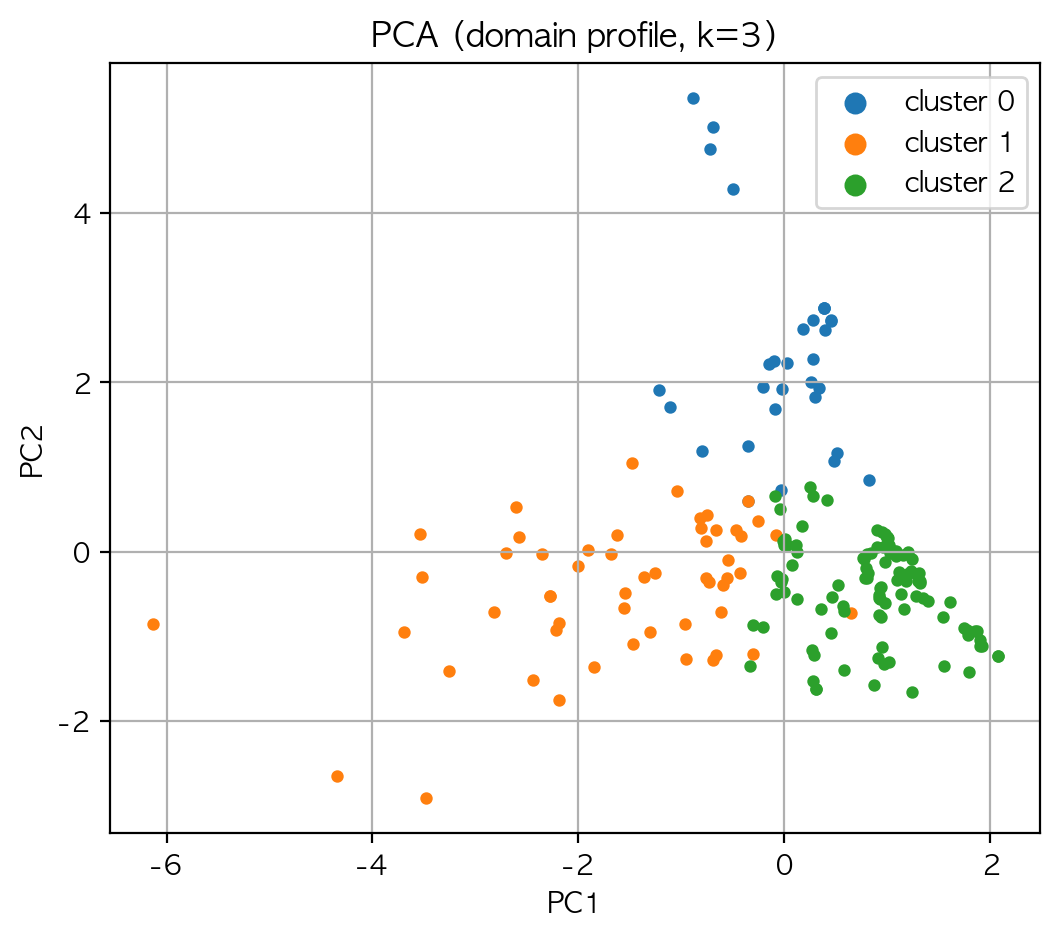

========== k=4 Í≤∞Í≥º ==========


top_domains
cluster                                                   
0        Í≤åÏûÑ(67.09%), ÎπÑÏòÅÎ¶¨/Í≥µÍ≥µ(5.03%), ÏãùÏùåÎ£å(5.02%), Ïª§Î®∏Ïä§(4.3...
1        Ïª§Î®∏Ïä§(28.71%), Í≤åÏûÑ(11.88%), ÏÉùÌôú(8.19%), ÏãùÎãπ/Ïπ¥Ìéò(7.57...
2        Ïö¥Îèô/Ïä§Ìè¨Ï∏†(50.00%), Ïö¥ÏÑ∏(50.00%), Í≤åÏûÑ(0.00%), ÍµêÏú°(0.00...
3        Í∏àÏúµ(37.92%), Í≤åÏûÑ(20.24%), ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†(13.53%), Ï±ÑÏö©(10...

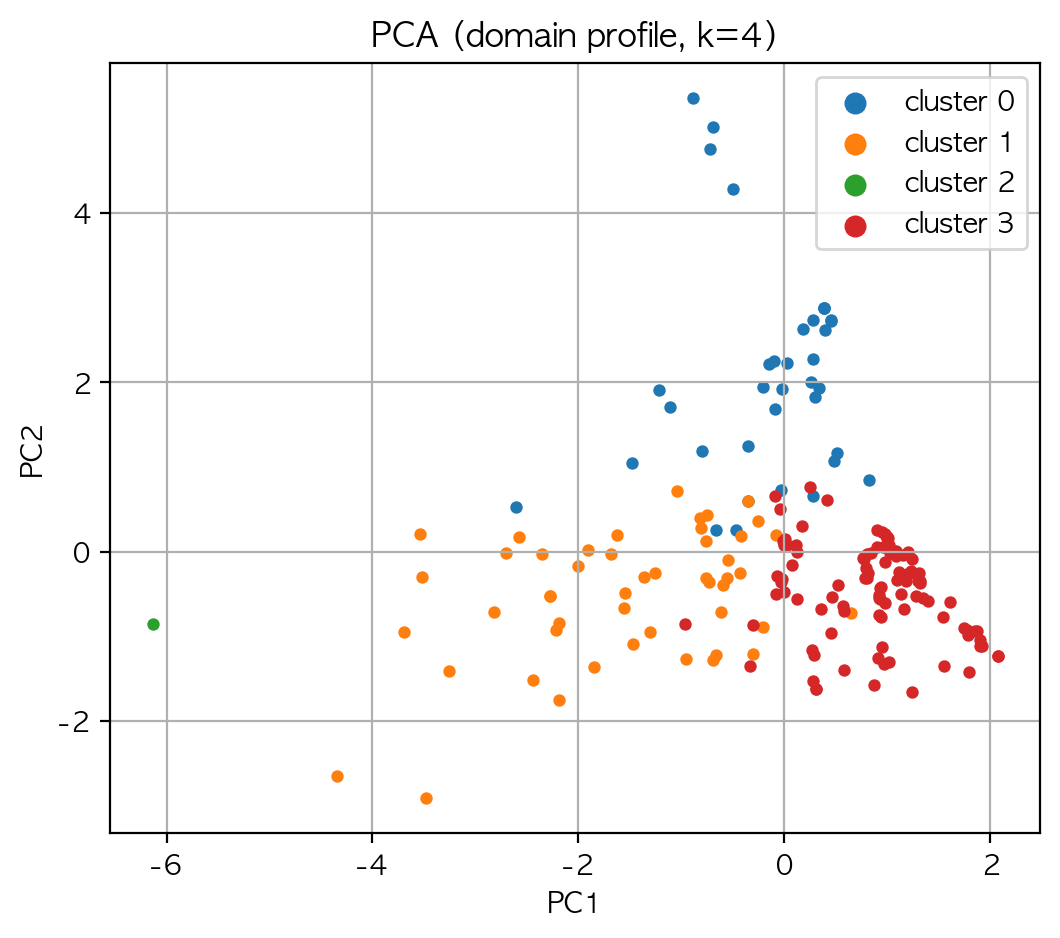

========== k=5 Í≤∞Í≥º ==========


top_domains
cluster                                                   
0        Í≤åÏûÑ(74.47%), Ïª§Î®∏Ïä§(4.75%), Í∏∞ÌÉÄ(3.69%), Í∏àÏúµ(3.32%), ...
1        Ïª§Î®∏Ïä§(26.18%), Í≤åÏûÑ(12.16%), Ïö¥ÏÑ∏(7.66%), ÏÉùÌôú(7.59%),...
2        Ïö¥Îèô/Ïä§Ìè¨Ï∏†(50.00%), Ïö¥ÏÑ∏(50.00%), Í≤åÏûÑ(0.00%), ÍµêÏú°(0.00...
3        ÍµêÏú°(33.33%), ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†(33.33%), Ïª§Î®∏Ïä§(33.33%), Í≤åÏûÑ(0...
4        Í∏àÏúµ(37.86%), Í≤åÏûÑ(20.68%), ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†(13.72%), Ï±ÑÏö©(10...

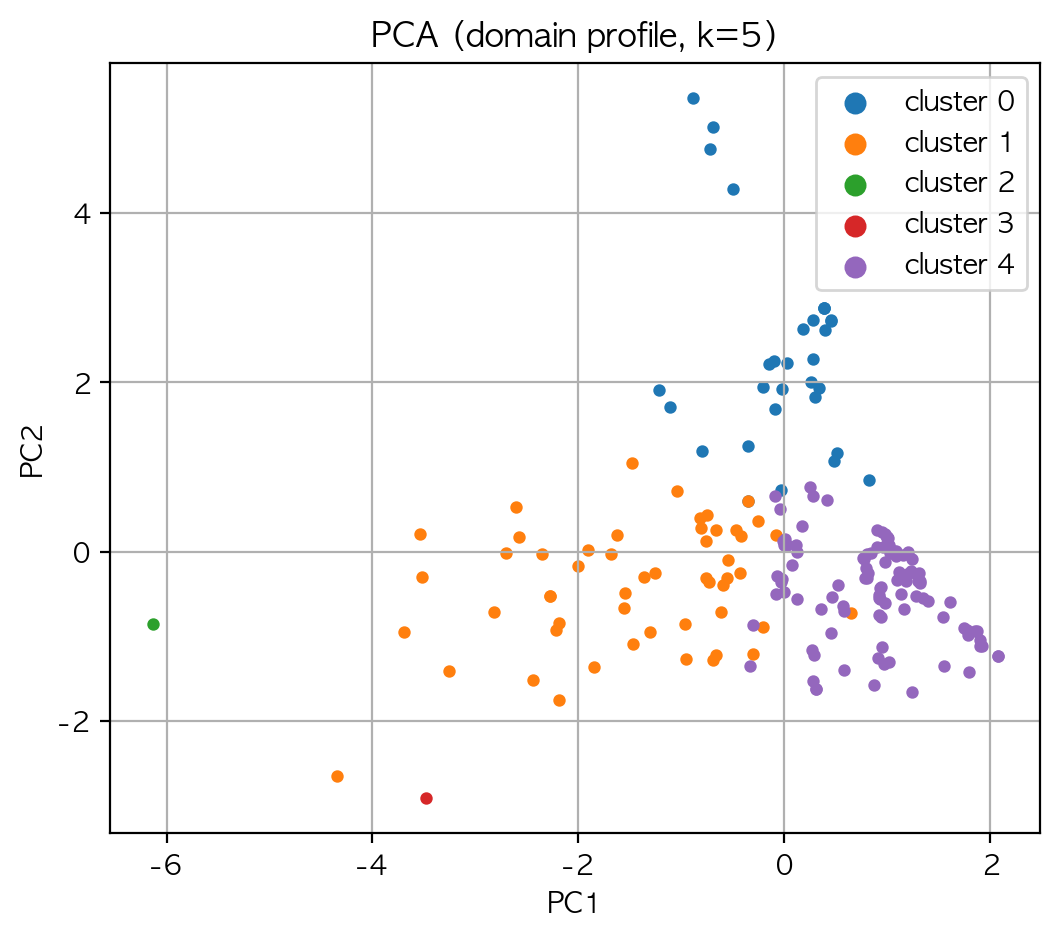

In [ ]:
# ==============================
# k=3,4,5 ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÎπÑÍµê
# ==============================

for k in [3, 4, 5]:
    print("="*10, f"k={k} Í≤∞Í≥º", "="*10)
    
    # KMeans ÌïôÏäµ
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Í≤∞Í≥º Ï†ÄÏû•
    result = pd.DataFrame(index=df_ratio.index)
    result["cluster"] = labels
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌïÑ
    cluster_profile = (
        pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
        .assign(cluster=labels)
        .groupby("cluster")
        .mean()
        .sort_index()
    )
    
    # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎåÄÌëú ÎèÑÎ©îÏù∏ Top-N
    def top_domains(profile_row, topn=5):
        s = profile_row.sort_values(ascending=False).head(topn)
        return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

    topn = 5
    top_table = pd.DataFrame({
        "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
    }, index=cluster_profile.index)

    display(top_table)   # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ ÎèÑÎ©îÏù∏ ÏöîÏïΩ
    
    # PCA ÏãúÍ∞ÅÌôî
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6,5))
    for c in range(k):
        idx = (labels == c)
        plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
    plt.title(f"PCA (domain profile, k={k})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(markerscale=2)
    plt.grid(True)
    plt.show()


============ k=3 Í≤∞Í≥º ============
- Í¥ÄÏÑ±(Inertia): 2,369.14
- Ïã§Î£®Ïó£ Ï†êÏàò(Silhouette): 0.1857

[ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨]


count
cluster       
0           31
1           54
2          104


[ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌïÑ(ÌèâÍ∑†, Ïõê Ïä§ÏºÄÏùº)]


domain_Í≤åÏûÑ  domain_ÍµêÏú°  domain_Í∏àÏúµ  domain_Í∏∞ÌÉÄ  domain_ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†  domain_Î∑∞Ìã∞  domain_ÎπÑÏòÅÎ¶¨/Í≥µÍ≥µ  domain_ÏÉùÌôú  domain_ÏãùÎãπ/Ïπ¥Ìéò  domain_ÏãùÏùåÎ£å  domain_Ïö¥Îèô/Ïä§Ìè¨Ï∏†  domain_Ïö¥ÏÑ∏  domain_ÏùòÎ£å/Í±¥Í∞ï  domain_Ï±ÑÏö©  domain_Ïª§Î®∏Ïä§
cluster                                                                                                                                                                                          
0           0.7447     0.0001     0.0332     0.0369          0.0307     0.0075         0.0092     0.0325        0.0033      0.0198         0.0004     0.0068        0.0241     0.0033      0.0475
1           0.1193     0.0130     0.0615     0.0103          0.0677     0.0391         0.0400     0.0745        0.0687      0.0481         0.0178     0.0844        0.0540     0.0428      0.2590
2           0.2048     0.0001     0.3806     0.0009          0.1358     0.0226         0.0075     0.0646        0.0207      0.0031         0.0004     0.0030        0.0045     0.1048      0.0469


[ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ ÎèÑÎ©îÏù∏ Top-5]


top_domains
cluster                                                   
0        Í≤åÏûÑ(74.47%), Ïª§Î®∏Ïä§(4.75%), Í∏∞ÌÉÄ(3.69%), Í∏àÏúµ(3.32%), ...
1        Ïª§Î®∏Ïä§(25.90%), Í≤åÏûÑ(11.93%), Ïö¥ÏÑ∏(8.44%), ÏÉùÌôú(7.45%),...
2        Í∏àÏúµ(38.06%), Í≤åÏûÑ(20.48%), ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†(13.58%), Ï±ÑÏö©(10...


[ÎùºÎ≤®Ïù¥ Î∂ôÏùÄ Í∞úÏ≤¥Î≥Ñ Í≤∞Í≥º(ÏÉÅÏúÑ 10Í∞ú ÎØ∏Î¶¨Î≥¥Í∏∞)]


domain_Í≤åÏûÑ  domain_ÍµêÏú°  domain_Í∏àÏúµ  domain_Í∏∞ÌÉÄ  domain_ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†  domain_Î∑∞Ìã∞  domain_ÎπÑÏòÅÎ¶¨/Í≥µÍ≥µ  domain_ÏÉùÌôú  domain_ÏãùÎãπ/Ïπ¥Ìéò  domain_ÏãùÏùåÎ£å  domain_Ïö¥Îèô/Ïä§Ìè¨Ï∏†  domain_Ïö¥ÏÑ∏  domain_ÏùòÎ£å/Í±¥Í∞ï  domain_Ï±ÑÏö©  domain_Ïª§Î®∏Ïä§  \
mda_idx                                                                                                                                                                                             
12          0.8082     0.0000     0.0171     0.0000          0.0002     0.0000         0.0314     0.0064        0.0000      0.0028         0.0000     0.0000        0.0006     0.0000      0.1333   
14          0.4585     0.0000     0.0420     0.0007          0.1859     0.0701         0.0000     0.0737        0.0000      0.0759         0.0000     0.0000        0.0567     0.0105      0.0260   
18          0.5561     0.0000     0.1533     0.0000          0.1795     0.0000         0.0000     0.1035        0.0000      0.0000         0.0000     0.0000        0.0000     0.0000      0.0075   
22          0.4468     0.0002     0.1410     0.0000          0.1915     0.0064         0.0577     0.0344        0.0003      0.0137         0.0044     0.0005        0.0295     0.0379      0.0357   
26          0.6239     0.0000     0.0605     0.0000          0.0295     0.0000         0.0000     0.1696        0.0000      0.0000         0.0000     0.0000        0.0000     0.0000      0.1165   
30          0.0370     0.0002     0.1362     0.0000          0.0477     0.0514         0.0008     0.0027        0.0000      0.0025         0.0000     0.0006        0.0012     0.7145      0.0052   
32          0.0000     0.0000     0.2891     0.0000          0.1963     0.0000         0.0000     0.0515        0.0000      0.0000         0.0000     0.0000        0.4034     0.0000      0.0597   
54          0.1245     0.0030     0.1425     0.0000          0.0301     0.0119         0.0574     0.0514        0.0007      0.0158         0.0012     0.3575        0.0185     0.0613      0.1242   
56          0.5646     0.0000     0.1478     0.0000          0.0104     0.0000         0.0000     0.0352        0.0000      0.0000         0.0000     0.0369        0.1447     0.0000      0.0603   
58          0.6355     0.0000     0.1625     0.0363          0.0016     0.0000         0.0000     0.0289        0.0000      0.0000         0.0000     0.0563        0.0665     0.0000      0.0123   

         cluster  
mda_idx           
12             0  
14             0  
18             0  
22             2  
26             0  
30             2  
32             1  
54             1  
56             0  
58             0

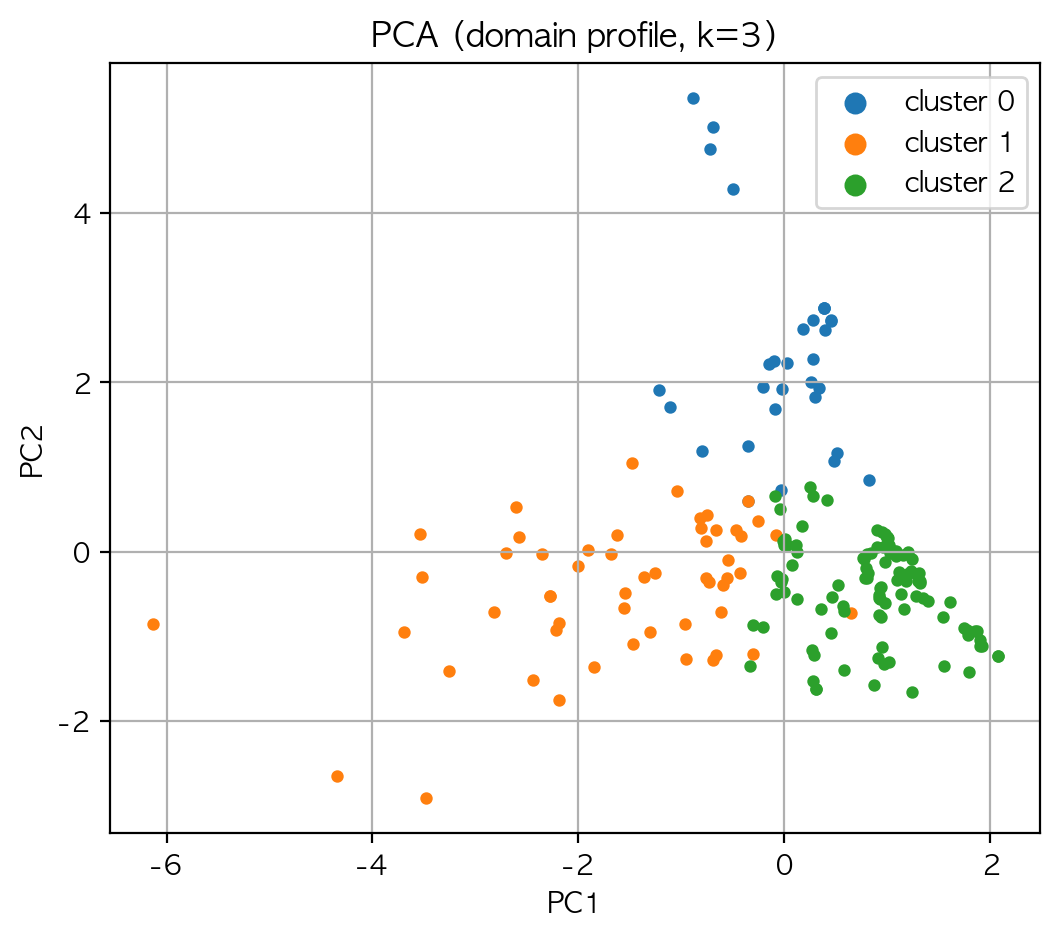

In [ ]:
# Î≥¥Í∏∞ ÏòµÏÖò (ÏõêÌïòÎ©¥ Ï°∞Ï†ï)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

k = 3
print("="*12, f"k={k} Í≤∞Í≥º", "="*12)

# 1) KMeans ÌïôÏäµ
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 2) Í∏∞Î≥∏ ÏßÄÌëú
inertia = kmeans.inertia_
sil = silhouette_score(X_scaled, labels) if len(np.unique(labels)) > 1 else np.nan
print(f"- Í¥ÄÏÑ±(Inertia): {inertia:,.2f}")
print(f"- Ïã§Î£®Ïó£ Ï†êÏàò(Silhouette): {sil:,.4f}")

# 3) Í≤∞Í≥º ÎùºÎ≤® DataFrame
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨
print("\n[ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÌè¨]")
display(result["cluster"].value_counts().sort_index().rename("count").to_frame())

# 5) ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌïÑ(Ïõê Ïä§ÏºÄÏùº XÏóêÏÑú ÌèâÍ∑†)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

print("\n[ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌïÑ(ÌèâÍ∑†, Ïõê Ïä§ÏºÄÏùº)]")
display(cluster_profile)

# 6) Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎåÄÌëú ÎèÑÎ©îÏù∏ Top-N
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

print(f"\n[ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ ÎèÑÎ©îÏù∏ Top-{topn}]")
display(top_table)

# 7) ÏõêÎ≥∏ Ïù∏Îç±Ïä§Ïóê ÎùºÎ≤® Î∂ôÏù∏ Ìëú(ÎØ∏Î¶¨Î≥¥Í∏∞)
print("\n[ÎùºÎ≤®Ïù¥ Î∂ôÏùÄ Í∞úÏ≤¥Î≥Ñ Í≤∞Í≥º(ÏÉÅÏúÑ 10Í∞ú ÎØ∏Î¶¨Î≥¥Í∏∞)]")
preview = pd.concat([pd.DataFrame(X, index=df_ratio.index, columns=keep_cols), result], axis=1)
display(preview.head(10))

# 8) ÌïÑÏöî Ïãú CSVÎ°ú Ï†ÄÏû• (ÏõêÌïòÎ©¥ Ï£ºÏÑù Ìï¥Ï†ú)
# cluster_profile.to_csv("cluster_profile_k3.csv", encoding="utf-8-sig")
# top_table.to_csv("cluster_top_domains_k3.csv", encoding="utf-8-sig")
# preview.to_csv("cluster_assignments_k3.csv", encoding="utf-8-sig")

# 9) PCA ÏãúÍ∞ÅÌôî (Ïä§ÏºÄÏùºÎêú Ï¢åÌëúÏóêÏÑú)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(k):
    idx = (labels == c)
    plt.scatter(coords[idx, 0], coords[idx, 1], s=12, label=f"cluster {c}")
plt.title(f"PCA (domain profile, k={k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()


In [ ]:
# Ï∂úÎ†• ÏòµÏÖòÏùÑ ÌÅ¨Í≤å ÏÑ§Ï†ï (ÏõêÌïòÎäî ÎßåÌÅº Ïà´Ïûê ÎäòÎ¶¥ Ïàò ÏûàÏùå)
pd.set_option("display.max_colwidth", None)   # Ìïú ÏÖÄ(column) Î¨∏ÏûêÏó¥ Í∏∏Ïù¥ Ï†úÌïú Ìï¥Ï†ú
pd.set_option("display.max_columns", None)   # Î™®Îì† Ïª¨Îüº Î≥¥Ïù¥Í≤å
pd.set_option("display.max_rows", None)      # Î™®Îì† Ìñâ Î≥¥Ïù¥Í≤å

display(top_table)  # Îã§Ïãú Ï∂úÎ†•


top_domains
cluster                                                                
0               Í≤åÏûÑ(74.47%), Ïª§Î®∏Ïä§(4.75%), Í∏∞ÌÉÄ(3.69%), Í∏àÏúµ(3.32%), ÏÉùÌôú(3.25%)
1           Ïª§Î®∏Ïä§(25.90%), Í≤åÏûÑ(11.93%), Ïö¥ÏÑ∏(8.44%), ÏÉùÌôú(7.45%), ÏãùÎãπ/Ïπ¥Ìéò(6.87%)
2        Í∏àÏúµ(38.06%), Í≤åÏûÑ(20.48%), ÎØ∏ÎîîÏñ¥/Ïª®ÌÖêÏ∏†(13.58%), Ï±ÑÏö©(10.48%), ÏÉùÌôú(6.46%)

In [ ]:
ad_counts = ads_info.groupby('mda_idx')['ads_idx'].nunique().reset_index()
ad_counts.rename(columns={'ads_idx': 'ad_count'}, inplace=True)

ad_counts = ad_counts.sort_values(by='ad_count', ascending=False)

ad_counts.head()

mda_idx  ad_count
50      563      6563
49      562      2686
59      634      2451
14      270      1801
28      371       973

In [ ]:
mda_563 = ads_info[ads_info['mda_idx'] == 563]

ads_counts = mda_563['ads_idx'].value_counts().reset_index()
ads_counts.columns = ['ads_idx', 'count']

ads_counts.head()


ads_idx  count
0   445048  23457
1   435826  20536
2   438831  19426
3   444350  18652
4   430776  16296

In [ ]:
def categorize_mda(x):
    if x < 11:
        return 'ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨'
    elif x <= 50:
        return 'ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ'
    elif x <= 200:
        return 'Ï§ëÍ∞Ñ Í∑úÎ™®'
    elif x <= 2000:
        return 'ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ'
    else:
        return 'Ï¥àÎåÄÌòï Ïö¥ÏòÅ'  # ÌòπÏãú 2000 ÎÑòÎäî Í≤ΩÏö∞ ÎåÄÎπÑ

# ad_counts : Îß§Ï≤¥ÏÇ¨Î≥Ñ Í¥ëÍ≥† ÏßëÌñâ Ïàò ÏßëÍ≥Ñ DataFrame
ad_counts['mda_size'] = ad_counts['ad_count'].apply(categorize_mda)

ad_counts.head()

mda_idx  ad_count mda_size
50      563      6563   Ï¥àÎåÄÌòï Ïö¥ÏòÅ
49      562      2686   Ï¥àÎåÄÌòï Ïö¥ÏòÅ
59      634      2451   Ï¥àÎåÄÌòï Ïö¥ÏòÅ
14      270      1801   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ
28      371       973   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ

============ k=3 Í≤∞Í≥º ============
             count       mean      std        min        25%        50%        75%        max
cluster_3                                                                                    
0         185.0000    44.8486 103.3313     1.0000     9.0000    23.0000    28.0000   973.0000
1           3.0000 2,312.6667 458.4303 1,801.0000 2,126.0000 2,451.0000 2,568.5000 2,686.0000
2           1.0000 6,563.0000      NaN 6,563.0000 6,563.0000 6,563.0000 6,563.0000 6,563.0000


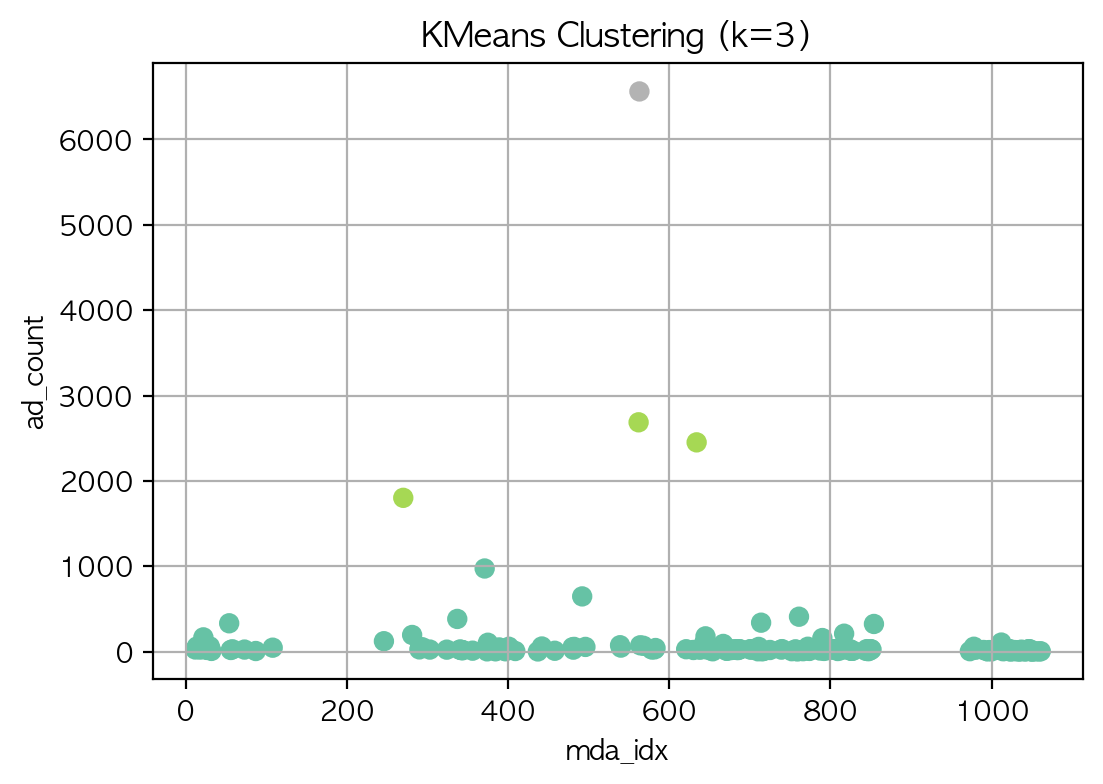

============ k=4 Í≤∞Í≥º ============
             count       mean      std        min        25%        50%        75%        max
cluster_4                                                                                    
0         178.0000    27.5056  33.4046     1.0000     9.0000    22.0000    27.0000   209.0000
1           3.0000 2,312.6667 458.4303 1,801.0000 2,126.0000 2,451.0000 2,568.5000 2,686.0000
2           1.0000 6,563.0000      NaN 6,563.0000 6,563.0000 6,563.0000 6,563.0000 6,563.0000
3           7.0000   485.8571 242.2694   323.0000   334.5000   382.0000   527.0000   973.0000


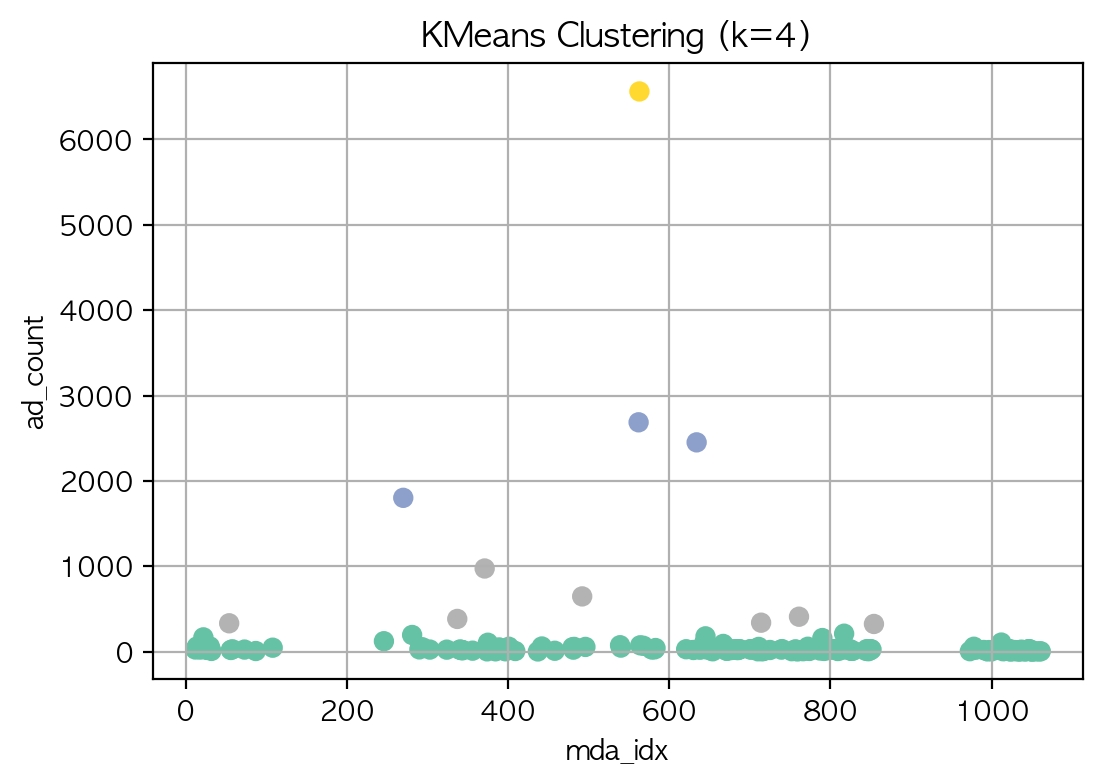

============ k=5 Í≤∞Í≥º ============
             count       mean      std        min        25%        50%        75%        max
cluster_5                                                                                    
0         178.0000    27.5056  33.4046     1.0000     9.0000    22.0000    27.0000   209.0000
1           2.0000 2,568.5000 166.1701 2,451.0000 2,509.7500 2,568.5000 2,627.2500 2,686.0000
2           1.0000 6,563.0000      NaN 6,563.0000 6,563.0000 6,563.0000 6,563.0000 6,563.0000
3           7.0000   485.8571 242.2694   323.0000   334.5000   382.0000   527.0000   973.0000
4           1.0000 1,801.0000      NaN 1,801.0000 1,801.0000 1,801.0000 1,801.0000 1,801.0000


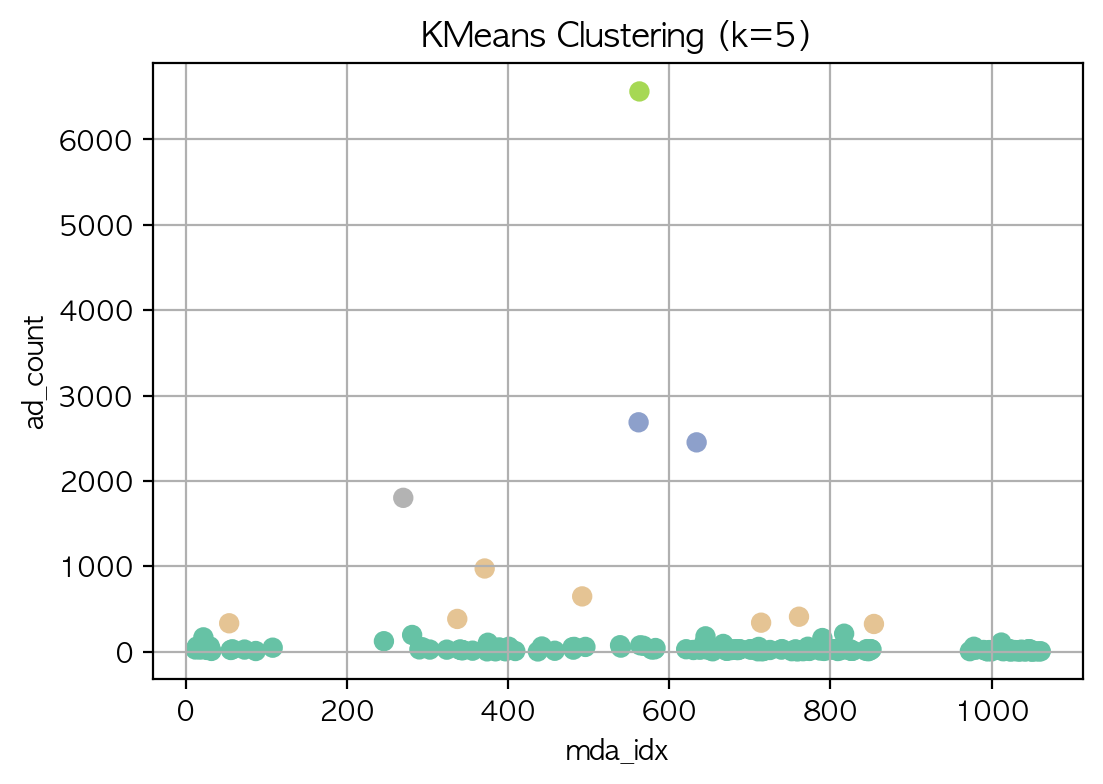

In [ ]:
# ad_counts Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏûàÎã§Í≥† Í∞ÄÏ†ï
# Ïà´ÏûêÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂ú
X = ad_counts[['ad_count']]

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans (k=3~5 ÏãúÎèÑÌï¥Î≥¥Í∏∞)
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    ad_counts[f'cluster_{k}'] = labels
    
    print("="*12, f"k={k} Í≤∞Í≥º", "="*12)
    print(ad_counts.groupby(f'cluster_{k}')['ad_count'].describe())
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6,4))
    plt.scatter(ad_counts['mda_idx'], ad_counts['ad_count'], 
                c=labels, cmap='Set2', s=40)
    plt.xlabel("mda_idx")
    plt.ylabel("ad_count")
    plt.title(f"KMeans Clustering (k={k})")
    plt.grid(True)
    plt.show()


In [ ]:
# 1. ads_time ÌÖåÏù¥Î∏îÏóêÏÑú Í∏∞Í∞Ñ ÌïÑÌÑ∞ÎßÅ
mask = (ads_time['rpt_time_date'] >= '2025-07-27') & (ads_time['rpt_time_date'] <= '2025-08-25')
ads_time_filtered = ads_time.loc[mask]

# 2. mda_idxÎ≥Ñ Ï¥ù ÌÅ¥Î¶≠Ïàò ÏßëÍ≥Ñ
clicks_by_mda = ads_time_filtered.groupby('mda_idx')['rpt_time_clk'].sum().reset_index()
clicks_by_mda.rename(columns={'rpt_time_clk': 'total_clicks'}, inplace=True)

# 3. ad_countsÏóê Î≥ëÌï© (mda_idx Í∏∞Ï§Ä)
ad_counts = ad_counts.merge(clicks_by_mda, on='mda_idx', how='left')

In [ ]:
ad_counts.head()

mda_idx  ad_count mda_size  cluster_3  cluster_4  cluster_5  total_clicks
0      563      6563   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          2          2          2        520684
1      562      2686   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          1          1          1         21018
2      634      2451   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          1          1          1          5065
3      270      1801   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ          1          1          4         61629
4      371       973   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ          0          3          3         29225

In [ ]:
def categorize_clicks(x):
    if x < 1000:
        return 'Ï¥àÏ†ÄÌôúÏÑ±'
    elif x < 10000:
        return 'Ï†ÄÌôúÏÑ±'
    elif x < 100000:
        return 'Î≥¥ÌÜµ'
    elif x < 1000000:
        return 'Í≥†ÌôúÏÑ±'
    else:
        return 'Ï¥àÍ≥†ÌôúÏÑ±'

ad_counts['clk_size'] = ad_counts['total_clicks'].apply(categorize_clicks)

ad_counts.head()

mda_idx  ad_count mda_size  cluster_3  cluster_4  cluster_5  total_clicks clk_size
0      563      6563   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          2          2          2        520684      Í≥†ÌôúÏÑ±
1      562      2686   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          1          1          1         21018       Î≥¥ÌÜµ
2      634      2451   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          1          1          1          5065      Ï†ÄÌôúÏÑ±
3      270      1801   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ          1          1          4         61629       Î≥¥ÌÜµ
4      371       973   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ          0          3          3         29225       Î≥¥ÌÜµ

============ k=3 Í≤∞Í≥º ============
             count            mean          std             min             25%             50%             75%             max
cluster_3                                                                                                                      
0         184.0000      9,817.2500  23,389.0075          1.0000         97.5000      3,537.0000      9,506.2500    180,770.0000
1           1.0000 13,467,994.0000          NaN 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000
2           4.0000    383,240.0000 141,397.8096    224,538.0000    285,135.0000    393,869.0000    491,974.0000    520,684.0000


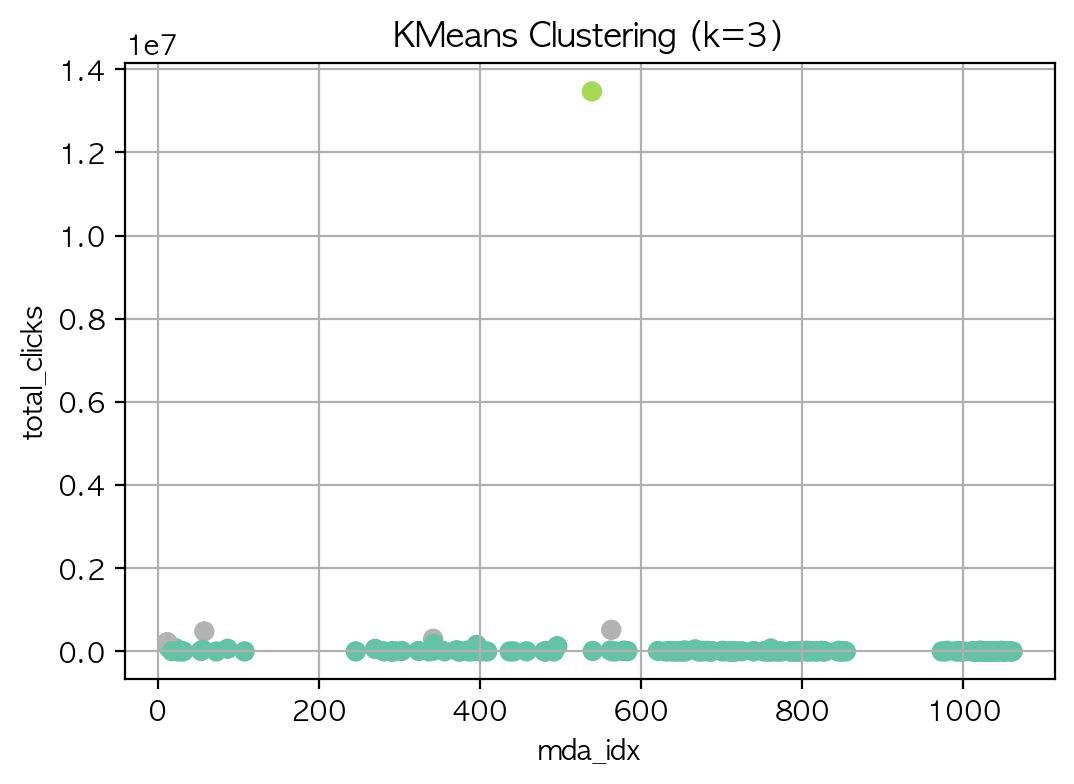

============ k=4 Í≤∞Í≥º ============
             count            mean         std             min             25%             50%             75%             max
cluster_4                                                                                                                     
0         181.0000      7,406.7790 13,784.5694          1.0000         96.0000      3,415.0000      9,203.0000     84,790.0000
1           1.0000 13,467,994.0000         NaN 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000
2           2.0000    501,544.0000 27,068.0476    482,404.0000    491,974.0000    501,544.0000    511,114.0000    520,684.0000
3           5.0000    199,123.8000 69,111.1387    127,878.0000    157,099.0000    180,770.0000    224,538.0000    305,334.0000


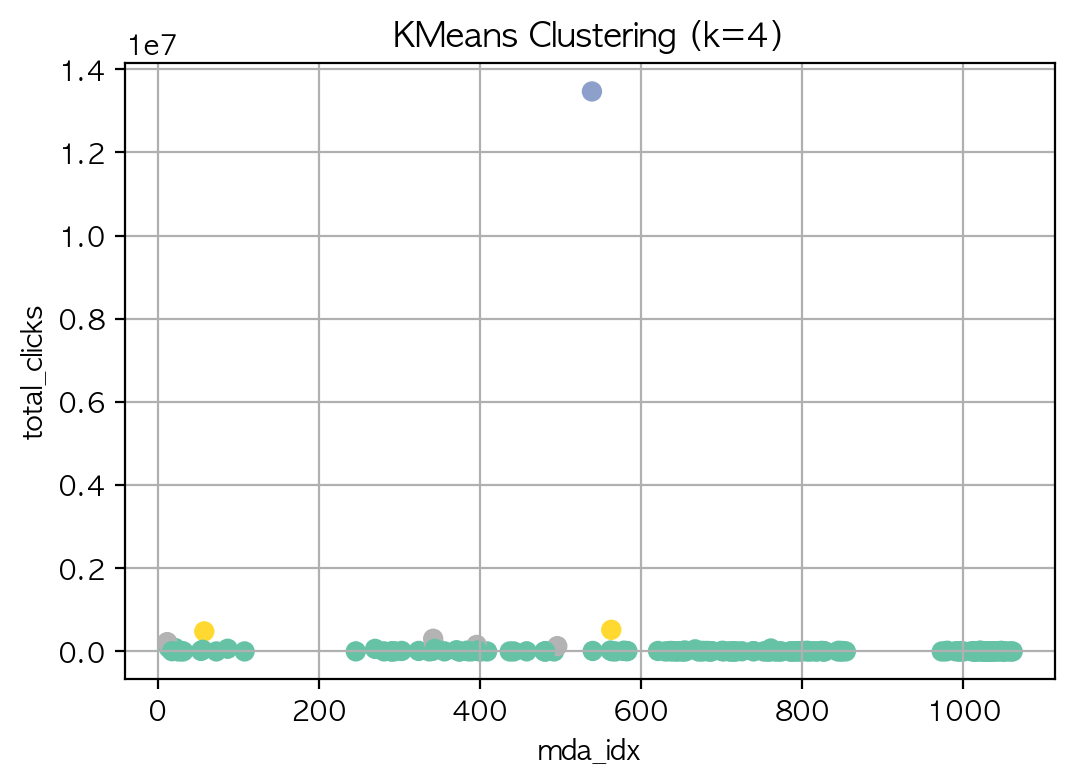

============ k=5 Í≤∞Í≥º ============
             count            mean         std             min             25%             50%             75%             max
cluster_5                                                                                                                     
0         173.0000      4,776.3295  5,704.2391          1.0000         73.0000      2,966.0000      7,980.0000     29,225.0000
1           1.0000 13,467,994.0000         NaN 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000
2           2.0000    501,544.0000 27,068.0476    482,404.0000    491,974.0000    501,544.0000    511,114.0000    520,684.0000
3           4.0000    216,935.2500 65,218.7165    157,099.0000    174,852.2500    202,654.0000    244,737.0000    305,334.0000
4           9.0000     71,355.5556 25,291.4433     40,368.0000     61,462.0000     64,352.0000     80,977.0000    127,878.0000


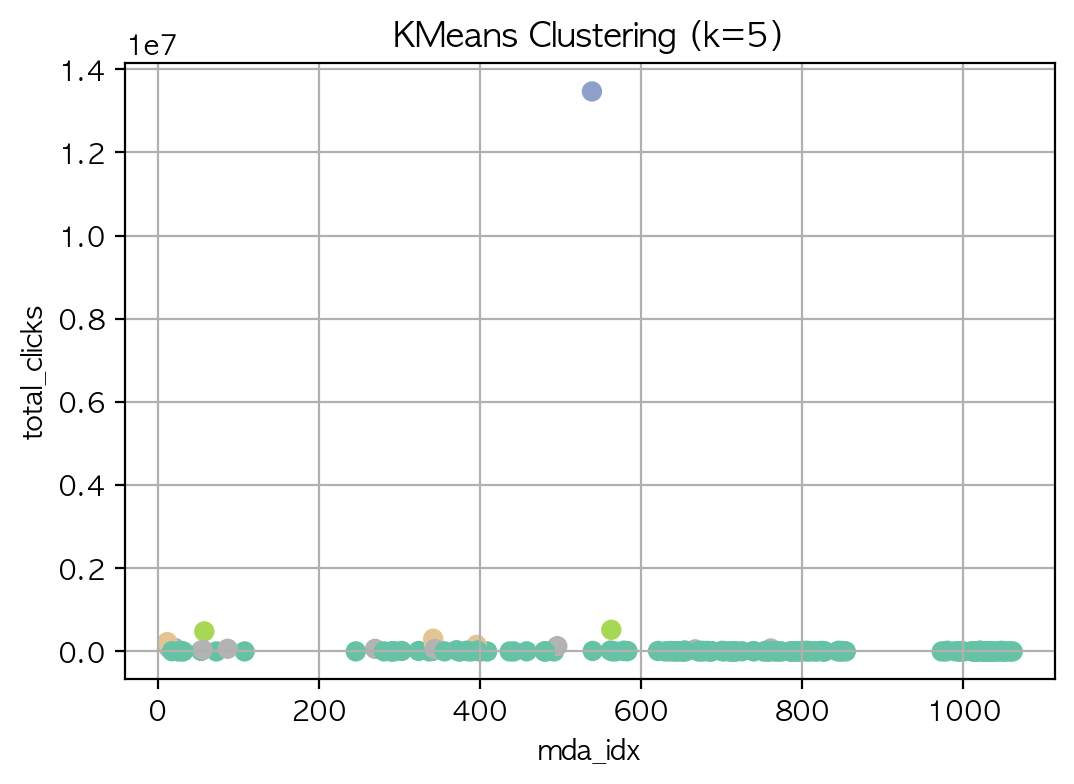

In [ ]:
# ad_counts Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏûàÎã§Í≥† Í∞ÄÏ†ï
# Ïà´ÏûêÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂ú
X = ad_counts[['total_clicks']]

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans (k=3~5 ÏãúÎèÑÌï¥Î≥¥Í∏∞)
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    ad_counts[f'cluster_{k}'] = labels
    
    print("="*12, f"k={k} Í≤∞Í≥º", "="*12)
    print(ad_counts.groupby(f'cluster_{k}')['total_clicks'].describe())
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6,4))
    plt.scatter(ad_counts['mda_idx'], ad_counts['total_clicks'], 
                c=labels, cmap='Set2', s=40)
    plt.xlabel("mda_idx")
    plt.ylabel("total_clicks")
    plt.title(f"KMeans Clustering (k={k})")
    plt.grid(True)
    plt.show()


In [ ]:
ad_counts.head()

mda_idx  ad_count mda_size  cluster_3  cluster_4  cluster_5  total_clicks clk_size
0      563      6563   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          2          2          2        520684      Í≥†ÌôúÏÑ±
1      562      2686   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          0          0          0         21018       Î≥¥ÌÜµ
2      634      2451   Ï¥àÎåÄÌòï Ïö¥ÏòÅ          0          0          0          5065      Ï†ÄÌôúÏÑ±
3      270      1801   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ          0          0          4         61629       Î≥¥ÌÜµ
4      371       973   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ          0          0          0         29225       Î≥¥ÌÜµ

In [ ]:
# 1. ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
features = ['ad_count', 'total_clicks', 'mda_size', 'clk_size']

# 2. ÏàòÏπòÌòï/Î≤îÏ£ºÌòï Î∂ÑÎ¶¨
num_cols = ['ad_count', 'total_clicks']
cat_cols = ['mda_size', 'clk_size']

# 3. Î≤îÏ£ºÌòï ÏõêÌï´ Ïù∏ÏΩîÎî©
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(ad_counts[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 4. Í≤∞Ìï©
X = pd.concat([
    ad_counts[num_cols].reset_index(drop=True),
    pd.DataFrame(encoded, columns=encoded_cols)
], axis=1)

# 5. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. KMeans Ïã§Ìñâ (Ïòà: k=3,4,5)
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    ad_counts[f'cluster_{k}_mix'] = labels
    
    print("="*12, f"k={k} Í≤∞Í≥º", "="*12)
    print(ad_counts.groupby(f'cluster_{k}_mix')[['ad_count','total_clicks']].mean())


============ k=3 Í≤∞Í≥º ============
               ad_count    total_clicks
cluster_3_mix                          
0               27.8939      4,951.1212
1               74.0000 13,467,994.0000
2              162.9754     24,693.1148
============ k=4 Í≤∞Í≥º ============
                ad_count    total_clicks
cluster_4_mix                           
0                27.8939      4,951.1212
1                68.7647     20,720.9496
2             3,900.0000    182,255.6667
3                74.0000 13,467,994.0000
============ k=5 Í≤∞Í≥º ============
                ad_count    total_clicks
cluster_5_mix                           
0                32.3088        145.7059
1                41.8846     23,360.2821
2               116.9231     24,629.6667
3                74.0000 13,467,994.0000
4             3,900.0000    182,255.6667


In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥ºÏôÄ Ï£ºÏöî ÏßÄÌëúÎßå Î≥¥Í∏∞
cols_to_show = ['mda_idx', 'ad_count', 'total_clicks', 
                'mda_size', 'clk_size',
                'cluster_3_mix', 'cluster_4_mix', 'cluster_5_mix']

display(ad_counts[cols_to_show].head(20))  # ÏÉÅÏúÑ 20Í∞ú ÌôïÏù∏


mda_idx  ad_count  total_clicks mda_size clk_size  cluster_3_mix  cluster_4_mix  cluster_5_mix
0       563      6563        520684   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±              2              2              4
1       562      2686         21018   Ï¥àÎåÄÌòï Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              2              4
2       634      2451          5065   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±              2              2              4
3       270      1801         61629   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              1              2
4       371       973         29225   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              1              2
5       492       646           805   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
6       761       408         70530   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              1              2
7       337       382          1902   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±              2              1              1
8       714       338          1288   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±              2              1              1
9        54       331         12744   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              1              2
10      854       323           701   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
11      817       209          1184   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±              2              1              1
12      281       194          1416    Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
13      645       178          1056    Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
14       22       166         80977    Ï§ëÍ∞Ñ Í∑úÎ™®       Î≥¥ÌÜµ              2              1              2
15      790       158          1405    Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
16      246       121          1615    Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
17     1012       105          2928    Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
18      375       103           422    Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
19      643        94           963    Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0

In [ ]:
# Ïòà: k=4 Í≤∞Í≥ºÏóêÏÑú cluster_4_mix == 2 (Ï¥àÎåÄÌòï Í∑∏Î£π) Îß§Ï≤¥ÏÇ¨Îßå Î≥¥Í∏∞
ad_counts.loc[ad_counts['cluster_4_mix'] == 2, 
              ['mda_idx','ad_count','total_clicks','mda_size','clk_size']]


mda_idx  ad_count  total_clicks mda_size clk_size
0      563      6563        520684   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
1      562      2686         21018   Ï¥àÎåÄÌòï Ïö¥ÏòÅ       Î≥¥ÌÜµ
2      634      2451          5065   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±

In [ ]:
# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÏÑú ad_countÏôÄ total_clicks Í∏∞Ï§Ä ÏÉÅÏúÑ 5Í∞ú Îß§Ï≤¥ÏÇ¨ Î≥¥Í∏∞
for k in ['cluster_3_mix','cluster_4_mix','cluster_5_mix']:
    print("="*12, k, "="*12)
    for c in ad_counts[k].unique():
        print(f"\n‚ñ∂ Cluster {c}")
        display(
            ad_counts.loc[ad_counts[k]==c,
                          ['mda_idx','ad_count','total_clicks','mda_size','clk_size']]
            .sort_values('total_clicks', ascending=False)
            .head(5)
        )


============ cluster_3_mix ============

‚ñ∂ Cluster 2


mda_idx  ad_count  total_clicks mda_size clk_size
0        563      6563        520684   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
74        58        26        482404   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
121      342        17        305334   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
85        12        24        224538   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
123      343        17        180770   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±


‚ñ∂ Cluster 0


mda_idx  ad_count  total_clicks  mda_size clk_size
152      396         6        157099  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨      Í≥†ÌôúÏÑ±
154       87         6         64352  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ
160      397         4         24249  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ
174      654         3         24056  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ
163      384         4         18867  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ


‚ñ∂ Cluster 1


mda_idx  ad_count  total_clicks mda_size clk_size
21      539        74      13467994    Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÍ≥†ÌôúÏÑ±

============ cluster_4_mix ============

‚ñ∂ Cluster 2


mda_idx  ad_count  total_clicks mda_size clk_size
0      563      6563        520684   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
1      562      2686         21018   Ï¥àÎåÄÌòï Ïö¥ÏòÅ       Î≥¥ÌÜµ
2      634      2451          5065   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±


‚ñ∂ Cluster 1


mda_idx  ad_count  total_clicks mda_size clk_size
74        58        26        482404   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
121      342        17        305334   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
85        12        24        224538   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
123      343        17        180770   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
32       496        54        127878    Ï§ëÍ∞Ñ Í∑úÎ™®      Í≥†ÌôúÏÑ±


‚ñ∂ Cluster 0


mda_idx  ad_count  total_clicks  mda_size clk_size
152      396         6        157099  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨      Í≥†ÌôúÏÑ±
154       87         6         64352  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ
160      397         4         24249  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ
174      654         3         24056  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ
163      384         4         18867  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ


‚ñ∂ Cluster 3


mda_idx  ad_count  total_clicks mda_size clk_size
21      539        74      13467994    Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÍ≥†ÌôúÏÑ±

============ cluster_5_mix ============

‚ñ∂ Cluster 4


mda_idx  ad_count  total_clicks mda_size clk_size
0      563      6563        520684   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
1      562      2686         21018   Ï¥àÎåÄÌòï Ïö¥ÏòÅ       Î≥¥ÌÜµ
2      634      2451          5065   Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±


‚ñ∂ Cluster 2


mda_idx  ad_count  total_clicks  mda_size clk_size
25        14        59         84790     Ï§ëÍ∞Ñ Í∑úÎ™®       Î≥¥ÌÜµ
14        22       166         80977     Ï§ëÍ∞Ñ Í∑úÎ™®       Î≥¥ÌÜµ
6        761       408         70530    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ
154       87         6         64352  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨       Î≥¥ÌÜµ
3        270      1801         61629    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ


‚ñ∂ Cluster 0


mda_idx  ad_count  total_clicks mda_size clk_size
19      643        94           963    Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±
36      389        48           871   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ     Ï¥àÏ†ÄÌôúÏÑ±
39      108        45           813   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ     Ï¥àÏ†ÄÌôúÏÑ±
5       492       646           805   ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ     Ï¥àÏ†ÄÌôúÏÑ±
42      651        31           765   ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ     Ï¥àÏ†ÄÌôúÏÑ±


‚ñ∂ Cluster 1


mda_idx  ad_count  total_clicks  mda_size clk_size
74        58        26        482404    ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
121      342        17        305334    ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
85        12        24        224538    ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
123      343        17        180770    ÏÜåÍ∑úÎ™® Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±
152      396         6        157099  ÌÖåÏä§Ìä∏Ìòï Îß§Ï≤¥ÏÇ¨      Í≥†ÌôúÏÑ±


‚ñ∂ Cluster 3


mda_idx  ad_count  total_clicks mda_size clk_size
21      539        74      13467994    Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÍ≥†ÌôúÏÑ±

In [ ]:
# Ï£ºÏöî Ïª¨Îüº + ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ÑÎ∂Ä Î≥¥Í∏∞
cols_to_show = [
    'mda_idx', 'ad_count', 'total_clicks', 
    'mda_size', 'clk_size',
    'cluster_3_mix', 'cluster_4_mix', 'cluster_5_mix'
]

# Ï†ÑÏ≤¥ Ï∂úÎ†• (ÌñâÏù¥ ÎßéÏúºÎ©¥ JupyterÏóêÏÑúÎäî Ïä§ÌÅ¨Î°§Î°ú Î≥¥Ïùº Ïàò ÏûàÏùå)
display(ad_counts[cols_to_show])

# ÌñâÏù¥ ÎßéÏïÑ ÏûòÎ¶¨Îäî Í≤ΩÏö∞ ‚Üí CSVÎ°ú Ï†ÄÏû• ÌõÑ ÌôïÏù∏
ad_counts[cols_to_show].to_csv("mda_cluster_result.csv", encoding="utf-8-sig", index=False)


mda_idx  ad_count  total_clicks  mda_size clk_size  cluster_3_mix  cluster_4_mix  cluster_5_mix
0        563      6563        520684    Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Í≥†ÌôúÏÑ±              2              2              4
1        562      2686         21018    Ï¥àÎåÄÌòï Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              2              4
2        634      2451          5065    Ï¥àÎåÄÌòï Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±              2              2              4
3        270      1801         61629    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              1              2
4        371       973         29225    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              1              2
5        492       646           805    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
6        761       408         70530    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              1              2
7        337       382          1902    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±              2              1              1
8        714       338          1288    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±              2              1              1
9         54       331         12744    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ       Î≥¥ÌÜµ              2              1              2
10       854       323           701    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
11       817       209          1184    ÎåÄÍ∑úÎ™® Ïö¥ÏòÅ      Ï†ÄÌôúÏÑ±              2              1              1
12       281       194          1416     Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
13       645       178          1056     Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
14        22       166         80977     Ï§ëÍ∞Ñ Í∑úÎ™®       Î≥¥ÌÜµ              2              1              2
15       790       158          1405     Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
16       246       121          1615     Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
17      1012       105          2928     Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
18       375       103           422     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
19       643        94           963     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
20       667        89         50214     Ï§ëÍ∞Ñ Í∑úÎ™®       Î≥¥ÌÜµ              2              1              2
21       539        74      13467994     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÍ≥†ÌôúÏÑ±              1              3              3
22       564        73          3627     Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
23       568        67            98     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
24        30        60          5197     Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
25        14        59         84790     Ï§ëÍ∞Ñ Í∑úÎ™®       Î≥¥ÌÜµ              2              1              2
26       442        59           172     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
27       772        56           257     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
28       978        56            69     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
29       401        56           336     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
30       711        54           121     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±              0              0              0
31       482        54          3615     Ï§ëÍ∞Ñ Í∑úÎ™®      Ï†ÄÌôúÏÑ±              2              1              1
32       496        54        127878     Ï§ëÍ∞Ñ Í∑úÎ™®      Í≥†ÌôúÏÑ±              2              1              1
33       291        52            73     Ï§ëÍ∞Ñ Í∑úÎ™®     Ï¥àÏ†ÄÌôúÏÑ±        

In [ ]:
ad_counts['cluster_3_mix'].value_counts()

cluster_3_mix
2    122
0     66
1      1
Name: count, dtype: int64

In [ ]:
ad_counts['cluster_4_mix'].value_counts()

cluster_4_mix
1    119
0     66
2      3
3      1
Name: count, dtype: int64

In [ ]:
ad_counts['cluster_5_mix'].value_counts()

cluster_5_mix
1    78
0    68
2    39
4     3
3     1
Name: count, dtype: int64

In [ ]:
# # ads_list : Í¥ëÍ≥† Îã®ÏúÑ Îç∞Ïù¥ÌÑ∞ (ads_idx, mda_idx Ìè¨Ìï®)
# avg_ads = ads_list.groupby('mda_idx')['ads_idx'].count().mean()
# print("Îß§Ï≤¥ÏÇ¨Î≥Ñ ÌèâÍ∑† Í¥ëÍ≥† Ïàò :", avg_ads)


KeyError: 'mda_idx'

In [ ]:
ad_counts.head()

In [ ]:
ad_counts.drop(columns=['cluster_3', 'cluster_4', 'cluster_5'], inplace=True)

In [ ]:
ad_counts.head()

In [ ]:
# --- 0) ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import pandas as pd

from typing import Dict, List, Optional, Tuple
from dataclasses import dataclass

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# --- 1) ÏÑ§Ï†ï(Î∞îÍøî Ïì∞Í∏∞)
@dataclass
class ClusterConfig:
    segment_col: str = "mda_size"        # ÏÑ∏Í∑∏Î®ºÌä∏ Ïª¨Îüº
    id_col: str = "mda_idx"              # Îß§Ï≤¥ÏÇ¨ ID
    k_candidates: Tuple[int, ...] = (3,4,5,6)
    min_rows_for_clustering: int = 20    # Ïù¥Î≥¥Îã§ ÏûëÏúºÎ©¥ 1ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú Ï≤òÎ¶¨
    pca_time_n: int = 2                  # ÏöîÏùº/ÏãúÍ∞Ñ Ìå®ÌÑ¥ÏùÑ PCA Î™á Ï∂ïÏúºÎ°ú Ï∂ïÏÜåÌï†ÏßÄ(0Ïù¥Î©¥ ÏÇ¨Ïö© ÏïàÌï®)
    log1p_cols: Tuple[str, ...] = ("total_clicks", "ad_count")  # Î°úÍ∑∏ Î≥ÄÌôò ÎåÄÏÉÅ
    numeric_cols_base: Tuple[str, ...] = ("total_clicks","ad_count") # Í∏∞Î≥∏ ÌîºÏ≤ò
    add_ratio_cols: bool = True          # total_clicks/ad_count Í∞ôÏùÄ ÎπÑÏú® ÌîºÏ≤ò Ï∂îÍ∞Ä
    dropna_fill: str = "median"          # Í≤∞Ï∏°Ïπò ÎåÄÏπò: 'median' ÎòêÎäî 'zero'


cfg = ClusterConfig()


# --- 2) Ïú†Ìã∏: ÌîºÏ≤ò Ïó¥ ÏûêÎèô ÌÉêÏÉâ(ÏöîÏùº/ÏãúÍ∞Ñ Ìå®ÌÑ¥, ÌíàÏßàÏßÄÌëú Îì± Ïù¥Î¶Ñ Í∑úÏπô)
def find_columns(df: pd.DataFrame) -> Dict[str, List[str]]:
    cols = df.columns.tolist()
    time_cols = [c for c in cols if c.startswith("weekday_name_eff_") or c.startswith("daypart_eff_")]
    quality_cols = [c for c in cols if any(key in c.lower() for key in ["cvr","epc","r_hat","volatility","ctit","dup","entropy","topcat_share","cat_entropy"])]
    # Ïà´ÏûêÌòïÎßå Í≥®ÎùºÎÉÑ
    num_like = df.select_dtypes(include=[np.number]).columns.tolist()
    return {
        "time": [c for c in time_cols if c in num_like],
        "quality": [c for c in quality_cols if c in num_like],
        "numeric": [c for c in num_like if c not in [cfg.id_col] ]
    }


# --- 3) ÌîºÏ≤ò ÎπåÎìú(Î°úÍ∑∏/ÎπÑÏú®/PCA/Ïä§ÏºÄÏùºÎßÅ)
def build_features(df: pd.DataFrame, cfg: ClusterConfig) -> Tuple[pd.DataFrame, List[str]]:
    cols_info = find_columns(df)

    # Í∏∞Î≥∏ + ÌíàÏßàÏßÄÌëú Ìè¨Ìï®
    feat_cols = list(cfg.numeric_cols_base)
    for c in cols_info["quality"]:
        if c not in feat_cols:
            feat_cols.append(c)

    # ÎπÑÏú® ÌîºÏ≤ò
    if cfg.add_ratio_cols and all(c in df.columns for c in ("total_clicks","ad_count")):
        df = df.copy()
        df["clicks_per_ad"] = (df["total_clicks"].astype(float) / df["ad_count"].replace(0, np.nan)).replace([np.inf, -np.inf], np.nan)
        feat_cols.append("clicks_per_ad")

    # Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÇ¨Ïö©
    feat_cols = [c for c in feat_cols if c in df.columns]

    # Í≤∞Ï∏° ÎåÄÏπò
    X = df[feat_cols].copy()
    if cfg.dropna_fill == "median":
        X = X.fillna(X.median(numeric_only=True))
    else:
        X = X.fillna(0)

    # Î°úÍ∑∏ Î≥ÄÌôò
    for c in cfg.log1p_cols:
        if c in X.columns:
            X[c] = np.log1p(X[c].clip(lower=0))

    # ÏãúÍ∞Ñ/ÏöîÏùº Ìå®ÌÑ¥ ‚Üí PCA Ï∂ïÏÜå(ÏòµÏÖò)
    pca_feats = pd.DataFrame(index=df.index)
    if cfg.pca_time_n and cfg.pca_time_n > 0 and len(cols_info["time"]) > 0:
        T = df[cols_info["time"]].fillna(0)
        # row-normalize (Ìï©=1) ‚Äì Ï†ÑÎ∞òÏ†Å ÌÅ¨Í∏∞ ÏòÅÌñ• Ï†úÍ±∞
        row_sum = T.sum(axis=1).replace(0, 1)
        T_norm = T.div(row_sum, axis=0)
        pca = PCA(n_components=min(cfg.pca_time_n, T_norm.shape[1]))
        T_p = pca.fit_transform(T_norm.values)
        for i in range(T_p.shape[1]):
            pca_feats[f"time_pca_{i+1}"] = T_p[:, i]

    # Ìï©ÏπòÍ∏∞
    X_full = pd.concat([X, pca_feats], axis=1)

    # Ïä§ÏºÄÏùºÎßÅ
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_full.values), columns=X_full.columns, index=X_full.index)

    return X_scaled, X_scaled.columns.tolist()


# --- 4) k ÏûêÎèô ÏÑ†ÌÉù(KMeans + Ïã§Î£®Ïó£ Ïö∞ÏÑ†, Î≥¥Ï°∞ÏßÄÌëúÎ°ú CH/DBI)
def choose_k(X: pd.DataFrame, k_candidates: Tuple[int, ...]) -> int:
    best_k, best_sil = None, -1
    # ÏÉòÌîå ÏàòÍ∞Ä ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ Í∑∏ÎÉ• 1
    if X.shape[0] < min(k_candidates):
        return 1
    for k in k_candidates:
        if k >= X.shape[0]:  # kÎäî ÏÉòÌîå Ïàò ÎØ∏ÎßåÏù¥Ïñ¥Ïïº Ìï®
            continue
        km = KMeans(n_clusters=k, random_state=42, n_init="auto")
        labels = km.fit_predict(X)
        # Î™®Îì† ÎùºÎ≤®Ïù¥ ÎèôÏùºÌïòÎ©¥ silhouette Î∂àÍ∞Ä
        if len(set(labels)) == 1:
            continue
        try:
            sil = silhouette_score(X, labels, metric="euclidean")
        except Exception:
            sil = -1
        # Î≥¥Ï°∞ ÌåêÎã®(ÎπÑÏä∑ÌïòÎ©¥ CH‚Üë, DBI‚Üì Í≥†Î†§)
        if sil > best_sil:
            best_sil = sil
            best_k = k

    if best_k is None:
        return 1
    return best_k


# --- 5) ÏÑ∏Í∑∏Î®ºÌä∏(Ïòà: mda_size)Î≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
def segmentwise_clustering(ad_counts: pd.DataFrame, cfg: ClusterConfig = cfg) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Î∞òÌôò:
      - df_out: ÏõêÎ≥∏ + cluster_id(ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÎùºÎ≤®) + k_used
      - prof: ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌååÏùº(Ï§ëÏïôÍ∞í ÏöîÏïΩ)
    """
    assert cfg.segment_col in ad_counts.columns, f"ÏÑ∏Í∑∏Î®ºÌä∏ Ïª¨Îüº({cfg.segment_col})Ïù¥ ÏóÜÏäµÎãàÎã§."
    df = ad_counts.copy()
    df_out_list = []
    prof_list = []

    for seg, sub in df.groupby(cfg.segment_col):
        sub = sub.copy().reset_index(drop=True)

        # ÏµúÏÜå Ìñâ ÎØ∏ÎßåÏù¥Î©¥ Ï†ÑÎ∂Ä ÌïòÎÇòÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú
        if len(sub) < cfg.min_rows_for_clustering:
            sub["cluster_local"] = 0
            sub["k_used"] = 1
        else:
            X_scaled, feat_cols = build_features(sub, cfg)
            k_opt = choose_k(X_scaled, cfg.k_candidates)
            if k_opt <= 1:
                sub["cluster_local"] = 0
                sub["k_used"] = 1
            else:
                km = KMeans(n_clusters=k_opt, random_state=42, n_init="auto")
                sub["cluster_local"] = km.fit_predict(X_scaled)
                sub["k_used"] = k_opt

        # ÏÇ¨ÎûåÏù¥ ÏùΩÍ∏∞ Ï¢ãÏùÄ Í∏ÄÎ°úÎ≤å ÎùºÎ≤®
        sub["cluster_id"] = sub[cfg.segment_col].astype(str) + "_c" + sub["cluster_local"].astype(str)
        df_out_list.append(sub)

        # ÌîÑÎ°úÌååÏùº ÏöîÏïΩ(Ï§ëÏïôÍ∞í)
        num_cols = sub.select_dtypes(include=[np.number]).columns.tolist()
        # ÎÑàÎ¨¥ Í∏∞Ïà†ÏßÄÌëúÍ∞Ä ÎßéÏúºÎ©¥ ÌïµÏã¨Îßå
        keep_cols = [c for c in ["total_clicks","ad_count","clicks_per_ad","CVR","EPC","volatility","cat_entropy","topcat_share"] if c in sub.columns]
        if not keep_cols:
            keep_cols = num_cols
        prof = sub.groupby("cluster_id")[keep_cols].median(numeric_only=True)
        prof["size"] = sub.groupby("cluster_id").size()
        prof["segment"] = seg
        prof_list.append(prof.reset_index())

    df_out = pd.concat(df_out_list, axis=0, ignore_index=True)
    prof = pd.concat(prof_list, axis=0, ignore_index=True)

    # Ï†ïÎ†¨
    df_out = df_out.sort_values([cfg.segment_col, "cluster_local"]).reset_index(drop=True)
    prof = prof.sort_values(["segment", "cluster_id"]).reset_index(drop=True)
    return df_out, prof


# --- 6) (ÏÑ†ÌÉù) ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∏∞Î∞ò Í∞ÄÏ§ëÏπò ÌÖåÏù¥Î∏î ÏÉùÏÑ± ÏòàÏãú
def make_cluster_weights(profile_df: pd.DataFrame) -> pd.DataFrame:
    """
    ÏòàÏãú Í∑úÏπô:
      - EPCÍ∞Ä ÎÜíÏùÑÏàòÎ°ù weight_up
      - volatility(Î≥ÄÎèôÏÑ±)Ïù¥ ÎÜíÏúºÎ©¥ Ìå®ÎÑêÌã∞
      - clicks_per_ad ÎÜíÏúºÎ©¥ ÏÜåÌè≠ Í∞ÄÏÇ∞
      weight = 1.0 + a*rank_norm(EPC) + b*rank_norm(clicks_per_ad) - c*rank_norm(volatility)
    """
    prof = profile_df.copy()
    def rank_norm(s):
        r = s.rank(method="average", pct=True)
        return (r - r.min()) / (r.max() - r.min() + 1e-9)

    a, b, c = 0.6, 0.2, 0.4
    for col in ["EPC","clicks_per_ad","volatility"]:
        if col not in prof.columns:
            prof[col] = prof[col] if col in prof.columns else 0.0

    prof["w_cluster"] = 1.0 \
                        + a * rank_norm(prof["EPC"]) \
                        + b * rank_norm(prof["clicks_per_ad"]) \
                        - c * rank_norm(prof["volatility"].replace({0: np.nan}).fillna(prof["volatility"].median() if "volatility" in prof else 0))
    # ÌïòÌïú/ÏÉÅÌïú ÌÅ¥Î¶¨Ìïë
    prof["w_cluster"] = prof["w_cluster"].clip(0.5, 1.8)
    return prof[["cluster_id","segment","w_cluster","EPC","clicks_per_ad","volatility","size"]]


# --- 7) ÏÇ¨Ïö© ÏòàÏãú
# df = ad_counts  # ÏÇ¨Ïö©ÏûêÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# df_clustered, prof = segmentwise_clustering(df, cfg)
# wtable = make_cluster_weights(prof)

# df_clusteredÏóêÎäî Í∞Å Îß§Ï≤¥ÏÇ¨Î≥Ñ 'cluster_id', 'k_used'Í∞Ä Ï∂îÍ∞ÄÎê©ÎãàÎã§.
# profÏóêÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï§ëÏïôÍ∞í ÏöîÏïΩÏù¥ Îì§Ïñ¥ ÏûàÏäµÎãàÎã§.
# wtableÏùÄ (ÏòàÏãú Í∑úÏπôÏúºÎ°ú ÎßåÎì†) ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ÄÏ§ëÏπò ÌÖåÏù¥Î∏îÏûÖÎãàÎã§.



In [ ]:
df = ad_counts  # ÏÇ¨Ïö©ÏûêÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
df_clustered, prof = segmentwise_clustering(df, cfg)
wtable = make_cluster_weights(prof)


In [ ]:
wtable

In [ ]:
# ad_reward: Í¥ëÍ≥†Ï†ÅÎ¶Ω ÌÖåÏù¥Î∏î (Ïª¨Îüº: mda_idx, earn_cost Îì±)
mda_revenue = (
    ads_rwd
    .groupby("mda_idx")
    .agg(total_revenue=("earn_cost", "sum"))
    .reset_index()
)

mda_revenue


In [ ]:
# time_report: ÏãúÍ∞ÑÎ≥Ñ Ï†ÅÎ¶Ω ÌÖåÏù¥Î∏î (Ïª¨Îüº: mda_idx, rpt_time_earn Îì±)
mda_revenue_daily = (
    ads_time
    .groupby("mda_idx")
    .agg(total_revenue=("rpt_time_earn", "sum"))
    .reset_index()
)

mda_revenue_daily


In [ ]:
# ÎÇ†Ïßú Ïª¨Îüº datetime Î≥ÄÌôò
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# 'ÎÖÑ-Ïõî' Îã®ÏúÑ Ïª¨Îüº Ï∂îÍ∞Ä
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# Îß§Ï≤¥ÏÇ¨ √ó ÏõîÎ≥Ñ ÏàòÏùµ Ìï©Í≥Ñ
mda_revenue_monthly = (
    ads_timee
    .groupby(["mda_idx", "year_month"])
    .agg(total_revenue=("rpt_time_earn", "sum"))
    .reset_index()
    .sort_values(["mda_idx", "year_month"])
)

print(mda_revenue_monthly.head())


In [ ]:
ads_timee.head()

In [ ]:
# ÎÇ†Ïßú Î≥ÄÌôò
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# Ïõî Îã®ÏúÑ Ï∂îÏ∂ú
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# Ï†ÑÏ≤¥ Îß§Ï≤¥ÏÇ¨ Ìï©ÏÇ∞ ÏõîÎ≥Ñ ÏàòÏùµ
monthly_total = (
    ads_timee.groupby("year_month")["rpt_time_earn"]
    .sum()
    .reset_index()
)

# Period ‚Üí Timestamp Î≥ÄÌôò (Í∑∏ÎûòÌîÑ Ï∂ïÏö©)
monthly_total["year_month"] = monthly_total["year_month"].dt.to_timestamp()

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10,5))
plt.plot(monthly_total["year_month"], monthly_total["rpt_time_earn"], marker="o")
plt.title("ÏõîÎ≥Ñ Ï¥ù ÏàòÏùµ Ï∂îÏÑ∏")
plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù ÏàòÏùµ")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12,6))

for mda, sub in mda_revenue_monthly.groupby("mda_idx"):
    plt.plot(sub["year_month"].dt.to_timestamp(),
             sub["total_revenue"],
             marker="o", label=f"mda {mda}")

plt.title("Îß§Ï≤¥ÏÇ¨Î≥Ñ ÏõîÎ≥Ñ ÏàòÏùµ Ï∂îÏÑ∏")
plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù ÏàòÏùµ")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
ad_counts.head()

In [ ]:
ads_timee.head()

In [ ]:
# 0) Ïª¨Îüº/ÌÇ§ Ï†ïÎ¶¨
ads_timee.columns = ads_timee.columns.str.strip()
ad_counts.columns = ad_counts.columns.str.strip()

ads_timee["mda_idx"] = ads_timee["mda_idx"].astype(str)
ad_counts["mda_idx"] = ad_counts["mda_idx"].astype(str)

# 1) ÎÇ†Ïßú ‚Üí Ïõî(Period) Ïª¨Îüº ÏÉùÏÑ±
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# 2) (mda_idx, year_month)Î≥Ñ Ïõî ÏàòÏùµ ÏßëÍ≥Ñ
monthly_by_mda = (
    ads_timee.groupby(["mda_idx", "year_month"], as_index=False)
             .agg(rpt_time_earn=("rpt_time_earn", "sum"))
)

# 3) ad_countsÏóêÏÑú mda_sizeÎßå Ï∂îÏ∂ú(Ï§ëÎ≥µ Ï†úÍ±∞) ÌõÑ Î®∏ÏßÄ
mda_sizes = ad_counts.loc[:, ["mda_idx", "mda_size"]].drop_duplicates(subset=["mda_idx"])
monthly_joined = monthly_by_mda.merge(mda_sizes, on="mda_idx", how="left", validate="m:1")

# 4) mda_size Îã®ÏúÑ ÏõîÎ≥Ñ Ï¥ùÏàòÏùµ
mda_size_monthly = (
    monthly_joined.groupby(["mda_size", "year_month"], as_index=False)
                  .agg(total_revenue=("rpt_time_earn", "sum"))
                  .sort_values(["mda_size", "year_month"])
)

# 5) (ÏÑ†ÌÉù) ÌîºÎ≤ó ÌÖåÏù¥Î∏î: Ìñâ=Ïõî, Ïó¥=mda_size, Í∞í=Ï¥ùÏàòÏùµ
mda_size_monthly_pivot = mda_size_monthly.pivot_table(
    index="year_month", columns="mda_size", values="total_revenue", fill_value=0
).sort_index()

# 6) (ÏÑ†ÌÉù) Í∑∏ÎûòÌîÑ: mda_sizeÎ≥Ñ ÏõîÎ≥Ñ ÏàòÏùµ Ï∂îÏÑ∏
mda_size_monthly_plot = mda_size_monthly.copy()
mda_size_monthly_plot["year_month"] = mda_size_monthly_plot["year_month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
for seg, sub in mda_size_monthly_plot.groupby("mda_size"):
    plt.plot(sub["year_month"], sub["total_revenue"], marker="o", label=str(seg))
plt.title("mda_sizeÎ≥Ñ ÏõîÎ≥Ñ ÏàòÏùµ Ï∂îÏÑ∏")
plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù ÏàòÏùµ")
plt.legend()
plt.grid(True)
plt.show()

# Í≤∞Í≥º DFÎì§:
# - monthly_joined: mda_idx x month x ÏàòÏùµ + mda_size
# - mda_size_monthly: mda_size x month Ï¥ùÏàòÏùµ
# - mda_size_monthly_pivot: ÏõîÎ≥Ñ x mda_size Îß§Ìä∏Î¶≠Ïä§


In [ ]:
ad_counts.value_counts()

In [ ]:
print(ad_counts["mda_size"].value_counts())

In [ ]:
# ads_list: Í¥ëÍ≥† Î™©Î°ù (Ïª¨Îüº: ads_idx, mda_idx Îì±)

# Îß§Ï≤¥ÏÇ¨Î≥Ñ Í¥ëÍ≥† Í∞úÏàò ÏßëÍ≥Ñ
ads_per_mda = (
    ads_info.groupby("mda_idx")
    .agg(ad_count=("ads_idx", "nunique"))  # Í≥†Ïú† Í¥ëÍ≥† Í∞úÏàò
    .reset_index()
)

print(ads_per_mda.head())

# Ï†ÑÏ≤¥ Îß§Ï≤¥ÏÇ¨ Ïàò
print("Îß§Ï≤¥ÏÇ¨ Ïàò:", ads_per_mda["mda_idx"].nunique())

# Í¥ëÍ≥† Ïàò ÏöîÏïΩ ÌÜµÍ≥Ñ
ads_per_mda["ad_count"].describe()


In [ ]:
# ÌäπÏ†ï mda_idx = 539 Ïùò Í¥ëÍ≥† Í∞úÏàò
ads_539 = ads_info[ads_info["mda_idx"] == 539]

ad_count_539 = ads_539["ads_idx"].nunique()
print("Îß§Ï≤¥ÏÇ¨ 539Ïùò Í¥ëÍ≥† Ïàò:", ad_count_539)


In [ ]:
ads_539_revenue_time = (
    ads_timee[ads_timee["mda_idx"] == '539']
    .groupby("ads_idx", as_index=False)
    .agg(total_revenue=("rpt_time_earn", "sum"))
    .sort_values("total_revenue", ascending=False)
)

print(ads_539_revenue_time.head())


In [ ]:
ads_timee.head()

In [ ]:
ad_539_351170 = (
    ads_timee[
        (ads_timee["mda_idx"] == 539) & (ads_timee["ads_idx"] == 351170)
    ]
    .agg(
        total_revenue=("rpt_time_earn", "sum"),
        total_clicks=("rpt_time_clk", "sum"),
        total_turns=("rpt_time_turn", "sum")
    )
)

# Ï†ÑÌôòÏú® (turns / clicks)
ad_539_351170["CVR"] = (
    ad_539_351170["total_turns"] / ad_539_351170["total_clicks"]
    if ad_539_351170["total_clicks"] > 0 else 0
)

print(ad_539_351170)


In [ ]:
# 1) Ïª¨Îüº/ÌÉÄÏûÖ Ï†ïÎ¶¨
ads_timee = ads_timee.copy()
ads_timee.columns = ads_timee.columns.str.strip()

# Î¨∏ÏûêÏó¥ ÎπÑÍµêÎ°ú ÏïàÏ†ÑÌïòÍ≤å ÌïÑÌÑ∞
ads_timee["mda_idx"] = ads_timee["mda_idx"].astype(str)
ads_timee["ads_idx"] = ads_timee["ads_idx"].astype(str)

mda_target = "539"
ads_target = "443941"

f = ads_timee[(ads_timee["mda_idx"] == mda_target) & (ads_timee["ads_idx"] == ads_target)]

# 2) Ïª¨Îüº ÌõÑÎ≥¥ ÏÑ§Ï†ï (ÏûàÎäî Í≤ÉÎßå ÏÇ¨Ïö©)
revenue_col = "rpt_time_earn" if "rpt_time_earn" in f.columns else ("earn_cost" if "earn_cost" in f.columns else None)
clicks_col  = "rpt_time_clk"  if "rpt_time_clk"  in f.columns else ("clicks"    if "clicks"    in f.columns else None)
turns_col   = "rpt_time_turn" if "rpt_time_turn" in f.columns else ("turns"     if "turns"     in f.columns else None)

# 3) Ìï©Í≥Ñ Í≥ÑÏÇ∞ (ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú)
total_revenue = float(f[revenue_col].sum()) if revenue_col else 0.0
total_clicks  = int(f[clicks_col].sum())    if clicks_col  else 0
total_turns   = int(f[turns_col].sum())     if turns_col   else 0

# 4) CVR Í≥ÑÏÇ∞ (0 ÎÇòÎàóÏÖà Î∞©ÏßÄ)
cvr = (total_turns / total_clicks) if total_clicks > 0 else 0.0

result = pd.DataFrame({
    "mda_idx":   [mda_target],
    "ads_idx":   [ads_target],
    "total_revenue": [total_revenue],
    "total_clicks":  [total_clicks],
    "total_turns":   [total_turns],
    "CVR":           [cvr],
})

print(result)


In [ ]:
# Ï°∞ÌöåÌï† Í¥ëÍ≥† Î¶¨Ïä§Ìä∏
target_ads = ["351170", "441329", "443941", "441962"]

# ads_timee ÏïàÏ†ÑÌïòÍ≤å Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
ads_timee = ads_timee.copy()
ads_timee.columns = ads_timee.columns.str.strip()

# ÌÉÄÏûÖ ÎßûÏ∂îÍ∏∞
ads_timee["ads_idx"] = ads_timee["ads_idx"].astype(str)

# ÌïÑÌÑ∞ÎßÅ (Ìï¥Îãπ ads_idxÎßå ÏÑ†ÌÉù)
subset = ads_timee[ads_timee["ads_idx"].isin(target_ads)]

# Í¥ëÍ≥†Î≥Ñ ÏßëÍ≥Ñ
ads_summary = (
    subset.groupby("ads_idx", as_index=False)
    .agg(
        total_revenue=("rpt_time_earn", "sum"),  # ÏàòÏùµ Ìï©
        total_clicks=("rpt_time_clk", "sum"),    # ÌÅ¥Î¶≠ Ìï©
        total_turns=("rpt_time_turn", "sum")     # Ï†ÑÌôò Ìï©
    )
)

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ (0 ÎÇòÎàóÏÖà Î∞©ÏßÄ)
ads_summary["CVR"] = ads_summary.apply(
    lambda row: row["total_turns"] / row["total_clicks"] if row["total_clicks"] > 0 else 0,
    axis=1
)

print(ads_summary)


In [ ]:
# ÎÇ†ÏßúÌòï Î≥ÄÌôò (ÏÑ†ÌÉù)
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# Îß§Ï≤¥ÏÇ¨Î≥Ñ ÏßëÍ≥Ñ
mda_summary = (
    ads_timee.groupby("mda_idx", as_index=False)
    .agg(
        total_clicks=("rpt_time_clk", "sum"),
        total_turns=("rpt_time_turn", "sum"),
        total_revenue=("rpt_time_earn", "sum")
    )
)

# CVR Í≥ÑÏÇ∞
mda_summary["CVR"] = mda_summary.apply(
    lambda row: row["total_turns"] / row["total_clicks"] if row["total_clicks"] > 0 else 0,
    axis=1
)

print(mda_summary.head())


In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò ÏÑ†ÌÉù
features = ["total_clicks", "total_revenue", "CVR"]

X = mda_summary[features].copy()

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Ïã§Ìñâ (Ïòà: 3Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
mda_summary["cluster"] = kmeans.fit_predict(X_scaled)

print(mda_summary[["mda_idx", "total_clicks", "total_revenue", "CVR", "cluster"]])


In [ ]:
# ÎÇ†Ïßú Î≥ÄÌôò
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# 2025-07-27 Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå
recent_df = ads_timee[ads_timee["rpt_time_date"] >= pd.to_datetime("2025-07-27")].copy()


In [ ]:
mda_summary = (
    recent_df.groupby("mda_idx", as_index=False)
    .agg(
        total_clicks=("rpt_time_clk", "sum"),
        total_turns=("rpt_time_turn", "sum"),
        total_revenue=("rpt_time_earn", "sum")
    )
)

# Ï†ÑÌôòÏú® (0 ÎÇòÎàóÏÖà Î∞©ÏßÄ)
mda_summary["CVR"] = mda_summary.apply(
    lambda r: r["total_turns"] / r["total_clicks"] if r["total_clicks"] > 0 else 0,
    axis=1
)

print(mda_summary.head())


In [ ]:
# ÌîºÏ≤ò ÏÑ†ÌÉù
features = ["total_clicks", "total_revenue", "CVR"]

X = mda_summary[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò kÎäî ÏÉÅÌô©Ïóê Îî∞Îùº Ï°∞Ï†ï (Ïòà: 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
mda_summary["cluster"] = kmeans.fit_predict(X_scaled)

print(mda_summary.head())


In [ ]:
# ÎÇ†Ïßú Î≥ÄÌôò
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# Ïõî Îã®ÏúÑ Ïª¨Îüº Ï∂îÍ∞Ä
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# ÏõîÎ≥Ñ Ï†ÑÏ≤¥ ÏàòÏùµ Ìï©Í≥Ñ
monthly_total = (
    ads_timee.groupby("year_month")["rpt_time_earn"]
    .sum()
    .reset_index()
)

# Í∑∏ÎûòÌîÑÏö© Î≥ÄÌôò
monthly_total["year_month"] = monthly_total["year_month"].dt.to_timestamp()

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10,5))
plt.plot(monthly_total["year_month"], monthly_total["rpt_time_earn"], marker="o")
plt.title("ÏõîÎ≥Ñ Ï¥ù ÏàòÏùµ Ï∂îÏÑ∏ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)")
plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù ÏàòÏùµ")
plt.grid(True)
plt.show()


In [ ]:
# 0) Ïª¨Îüº/ÌÇ§ Ï†ïÎ¶¨
ads_timee.columns = ads_timee.columns.str.strip()
ad_counts.columns = ad_counts.columns.str.strip()

ads_timee["mda_idx"] = ads_timee["mda_idx"].astype(str)
ad_counts["mda_idx"] = ad_counts["mda_idx"].astype(str)

# 1) ÎÇ†Ïßú ‚Üí Ïõî(Period) Ïª¨Îüº ÏÉùÏÑ±
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# 2) (mda_idx, year_month)Î≥Ñ Ïõî ÏàòÏùµ ÏßëÍ≥Ñ
monthly_by_mda = (
    ads_timee.groupby(["mda_idx", "year_month"], as_index=False)
             .agg(rpt_time_earn=("rpt_time_earn", "sum"))
)

# 3) ad_countsÏóêÏÑú mda_sizeÎßå Ï∂îÏ∂ú(Ï§ëÎ≥µ Ï†úÍ±∞) ÌõÑ Î®∏ÏßÄ
mda_sizes = ad_counts.loc[:, ["mda_idx", "mda_size"]].drop_duplicates(subset=["mda_idx"])
monthly_joined = monthly_by_mda.merge(mda_sizes, on="mda_idx", how="left", validate="m:1")

# 4) mda_size Îã®ÏúÑ ÏõîÎ≥Ñ Ï¥ùÏàòÏùµ
mda_size_monthly = (
    monthly_joined.groupby(["mda_size", "year_month"], as_index=False)
                  .agg(total_revenue=("rpt_time_earn", "sum"))
                  .sort_values(["mda_size", "year_month"])
)

# 5) (ÏÑ†ÌÉù) ÌîºÎ≤ó ÌÖåÏù¥Î∏î: Ìñâ=Ïõî, Ïó¥=mda_size, Í∞í=Ï¥ùÏàòÏùµ
mda_size_monthly_pivot = mda_size_monthly.pivot_table(
    index="year_month", columns="mda_size", values="total_revenue", fill_value=0
).sort_index()

# 6) (ÏÑ†ÌÉù) Í∑∏ÎûòÌîÑ: mda_sizeÎ≥Ñ ÏõîÎ≥Ñ ÏàòÏùµ Ï∂îÏÑ∏
mda_size_monthly_plot = mda_size_monthly.copy()
mda_size_monthly_plot["year_month"] = mda_size_monthly_plot["year_month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
for seg, sub in mda_size_monthly_plot.groupby("mda_size"):
    plt.plot(sub["year_month"], sub["total_revenue"], marker="o", label=str(seg))
plt.title("mda_sizeÎ≥Ñ ÏõîÎ≥Ñ ÏàòÏùµ Ï∂îÏÑ∏")
plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù ÏàòÏùµ")
plt.legend()
plt.grid(True)
plt.show()

# Í≤∞Í≥º DFÎì§:
# - monthly_joined: mda_idx x month x ÏàòÏùµ + mda_size
# - mda_size_monthly: mda_size x month Ï¥ùÏàòÏùµ
# - mda_size_monthly_pivot: ÏõîÎ≥Ñ x mda_size Îß§Ìä∏Î¶≠Ïä§


In [ ]:
# 1) Ïõî Îã®ÏúÑ ÌÅ¥Î¶≠/Ï†ÑÌôò ÏßëÍ≥Ñ
monthly_cvr_by_mda = (
    ads_timee.groupby(["mda_idx", "year_month"], as_index=False)
             .agg(total_clicks=("rpt_time_clk", "sum"),
                  total_turns=("rpt_time_turn", "sum"))
)

# 2) CVR Í≥ÑÏÇ∞ (ÌÅ¥Î¶≠ 0Ïù¥Î©¥ 0 Ï≤òÎ¶¨)
monthly_cvr_by_mda["CVR"] = monthly_cvr_by_mda.apply(
    lambda r: r["total_turns"] / r["total_clicks"] if r["total_clicks"] > 0 else 0,
    axis=1
)

# 3) ad_countsÏóêÏÑú mda_size Î∂ôÏù¥Í∏∞
monthly_cvr_joined = monthly_cvr_by_mda.merge(
    mda_sizes, on="mda_idx", how="left", validate="m:1"
)

# 4) mda_size Îã®ÏúÑ ÌèâÍ∑† Ï†ÑÌôòÏú® (ÏõîÎ≥Ñ)
mda_size_cvr_monthly = (
    monthly_cvr_joined.groupby(["mda_size","year_month"], as_index=False)
                      .agg(mean_CVR=("CVR","mean"))
                      .sort_values(["mda_size","year_month"])
)

# 5) ÏãúÍ∞ÅÌôî
mda_size_cvr_monthly_plot = mda_size_cvr_monthly.copy()
mda_size_cvr_monthly_plot["year_month"] = mda_size_cvr_monthly_plot["year_month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
for seg, sub in mda_size_cvr_monthly_plot.groupby("mda_size"):
    plt.plot(sub["year_month"], sub["mean_CVR"], marker="o", label=str(seg))
plt.title("mda_sizeÎ≥Ñ ÏõîÎ≥Ñ ÌèâÍ∑† Ï†ÑÌôòÏú® Ï∂îÏÑ∏")
plt.xlabel("Ïõî")
plt.ylabel("CVR (Ï†ÑÌôòÏú®)")
plt.legend(title="mda_size")
plt.grid(True)
plt.show()

# Í≤∞Í≥º DFÎì§
# - monthly_cvr_by_mda : mda_idx x month ÌÅ¥Î¶≠/Ï†ÑÌôò/Ï†ÑÌôòÏú®
# - monthly_cvr_joined : + mda_size
# - mda_size_cvr_monthly : mda_size x month ÌèâÍ∑† CVR


In [ ]:
# PCA 2Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for c in sorted(mda_summary["cluster"].unique()):
    mask = mda_summary["cluster"] == c
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f"Cluster {c}", alpha=0.7)

plt.title("Îß§Ï≤¥ÏÇ¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò
features = ["total_clicks", "total_revenue", "CVR"]

X = mda_summary[features].copy()

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Ïã§Ìñâ (ÌÅ¥Îü¨Ïä§ÌÑ∞ 5Í∞ú)
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
mda_summary["cluster"] = kmeans.fit_predict(X_scaled)

# Í≤∞Í≥º ÌôïÏù∏
print(mda_summary.head())

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞úÏàò ÌôïÏù∏
cluster_counts = mda_summary["cluster"].value_counts().sort_index()
print("\nÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Ïàò:")
print(cluster_counts)


In [ ]:
# ÌîºÏ≤ò: Ï†ÑÌôòÏú®Îßå ÏÇ¨Ïö©
X = mda_summary[["CVR"]].copy()

# Ïä§ÏºÄÏùºÎßÅ (Í∞íÏùò Î∂ÑÌè¨Î•º ÎßûÏ∂∞Ï§å)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Ïã§Ìñâ (ÌÅ¥Îü¨Ïä§ÌÑ∞ 5Í∞ú)
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
mda_summary["cluster_cvr"] = kmeans.fit_predict(X_scaled)

# Í≤∞Í≥º ÌôïÏù∏
print(mda_summary[["mda_idx", "CVR", "cluster_cvr"]].head())

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞úÏàò
print("\nÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Ïàò:")
print(mda_summary["cluster_cvr"].value_counts().sort_index())


In [ ]:
cluster_profile = (
    mda_summary.groupby("cluster_cvr")["CVR"]
    .agg(["count", "mean", "min", "max"])
    .reset_index()
)

print(cluster_profile)


In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(
    range(len(mda_summary)),
    mda_summary["CVR"],
    c=mda_summary["cluster_cvr"],
    cmap="tab10",
    alpha=0.7
)

plt.title("Îß§Ï≤¥ÏÇ¨ Ï†ÑÌôòÏú® ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (CVR Í∏∞Î∞ò)")
plt.xlabel("Îß§Ï≤¥ÏÇ¨ (index)")
plt.ylabel("CVR")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
cluster_groups = (
    mda_summary.groupby("cluster_cvr")["mda_idx"]
    .apply(list)
    .to_dict()
)

for c, mda_list in cluster_groups.items():
    print(f"Cluster {c} ‚Üí {len(mda_list)}Í∞ú Îß§Ï≤¥ÏÇ¨")
    print(mda_list[:10], "...")  # ÎÑàÎ¨¥ Í∏∏Î©¥ Ïïû 10Í∞úÎßå ÌëúÏãú


In [ ]:
# ---------------------------
# 1) Îß§Ï≤¥ÏÇ¨Î≥Ñ Ï¥ùÏàòÏùµ ÏßëÍ≥Ñ
# ---------------------------
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

mda_rev = (
    df.groupby("mda_idx", as_index=False)
      .agg(total_revenue=("rpt_time_earn", "sum"))
      .fillna({"total_revenue": 0})
)

# ---------------------------
# 2) Ï†ÑÏ≤òÎ¶¨(Î°úÍ∑∏+Ïä§ÏºÄÏùº)
#   - ÏàòÏùµ Î∂ÑÌè¨Í∞Ä Í∏∏Í≤å ÎäòÏñ¥Ïßà Ïàò ÏûàÏñ¥ log1p Í∂åÏû•
# ---------------------------
mda_rev["rev_log1p"] = np.log1p(mda_rev["total_revenue"])
scaler = StandardScaler()
X = scaler.fit_transform(mda_rev[["rev_log1p"]])

# ---------------------------
# 3) k ÏÑ†ÌÉù(ÏòµÏÖò) ÎòêÎäî Í≥†Ï†ïÍ∞í
# ---------------------------
def choose_k(X, ks=(3,4,5,6)):
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X):  # ÌëúÎ≥∏Î≥¥Îã§ ÌÅ∞ k Î∞©ÏßÄ
            continue
        km = KMeans(n_clusters=k, random_state=42, n_init="auto")
        labels = km.fit_predict(X)
        if len(set(labels)) < 2:  # Ïã§Î£®Ïó£ Í≥ÑÏÇ∞ Î∂àÍ∞Ä
            continue
        sil = silhouette_score(X, labels)
        if sil > best_sil:
            best_sil, best_k = sil, k
    return best_k or 3

k = choose_k(X, ks=(3,4,5,6))  # ÏûêÎèô ÏÑ†ÌÉù
# k = 5  # <- Í≥†Ï†ïÏúºÎ°ú Ïì∞Í≥† Ïã∂ÏúºÎ©¥ Ïù¥ Ï§Ñ ÏÇ¨Ïö©

kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda_rev["cluster_rev"] = kmeans.fit_predict(X)

# ---------------------------
# 4) ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌååÏùº
# ---------------------------
profile = (
    mda_rev
    .groupby("cluster_rev")
    .agg(
        count=("mda_idx", "nunique"),
        total_revenue_sum=("total_revenue", "sum"),
        total_revenue_mean=("total_revenue", "mean"),
        total_revenue_median=("total_revenue", "median"),
        rev_log1p_mean=("rev_log1p", "mean")
    )
    .sort_index()
)
print("ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌååÏùº:")
print(profile)

# ---------------------------
# 5) ÏãúÍ∞ÅÌôî (1D ‚Üí Î∞ïÏä§ÌîåÎ°Ø + ÏÇ∞Ï†êÎèÑ)
# ---------------------------

# (A) Î∞ïÏä§ÌîåÎ°Ø: ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï¥ùÏàòÏùµ Î∂ÑÌè¨
plt.figure(figsize=(9,5))
mda_rev.boxplot(column="total_revenue", by="cluster_rev")
plt.title(f"ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï¥ùÏàòÏùµ Î∂ÑÌè¨ (k={k})")
plt.suptitle("")
plt.xlabel("cluster_rev")
plt.ylabel("total_revenue")
plt.yscale("symlog")  # Ïä§ÏºÄÏùº Ï∞®Ïù¥ ÌÅ¨Î©¥ Î°úÍ∑∏Ï∂ï Ï∂îÏ≤ú
plt.grid(True)
plt.show()

# (B) ÏÇ∞Ï†êÎèÑ: index vs Ï¥ùÏàòÏùµ (ÏÉâ=ÌÅ¥Îü¨Ïä§ÌÑ∞)
plt.figure(figsize=(10,5))
plt.scatter(
    range(len(mda_rev)),
    mda_rev["total_revenue"],
    c=mda_rev["cluster_rev"],
    cmap="tab10",
    alpha=0.8
)
plt.title(f"Îß§Ï≤¥ÏÇ¨Î≥Ñ Ï¥ùÏàòÏùµ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (k={k})")
plt.xlabel("publisher index")
plt.ylabel("total_revenue")
plt.yscale("symlog")
plt.colorbar(label="cluster_rev")
plt.grid(True)
plt.show()

# ---------------------------
# 6) ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Î¶¨Ïä§Ìä∏ (ÎîïÏÖîÎÑàÎ¶¨)
# ---------------------------
cluster_members = (
    mda_rev.groupby("cluster_rev")["mda_idx"]
           .apply(list)
           .to_dict()
)
# Ïòà: Ïïû 10Í∞úÎßå ÎØ∏Î¶¨Î≥¥Í∏∞
for c, lst in cluster_members.items():
    print(f"\nCluster {c} ‚Üí {len(lst)}Í∞ú Îß§Ï≤¥ÏÇ¨")
    print(lst[:10], "...")


In [ ]:
# Îß§Ï≤¥ÏÇ¨Î≥Ñ ÏßëÍ≥Ñ (Ïù¥ÎØ∏ mda_summary ÏûàÎã§Î©¥ Ïû¨ÏÇ¨Ïö©)
mda_summary = (
    ads_timee.groupby("mda_idx", as_index=False)
    .agg(
        total_clicks=("rpt_time_clk", "sum"),
        total_turns=("rpt_time_turn", "sum"),
        total_revenue=("rpt_time_earn", "sum")
    )
)
mda_summary["CVR"] = mda_summary.apply(
    lambda r: r["total_turns"] / r["total_clicks"] if r["total_clicks"] > 0 else 0,
    axis=1
)

# log Î≥ÄÌôò
mda_summary["rev_log1p"] = np.log1p(mda_summary["total_revenue"])

# ÌîºÏ≤ò ÏÑ†ÌÉù
X = mda_summary[["CVR", "rev_log1p"]]

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans (Ïòà: 4Í∞ú Í∑∏Î£π)
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
mda_summary["cluster_cvr_rev"] = kmeans.fit_predict(X_scaled)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌîÑÎ°úÌååÏùº
profile = (
    mda_summary.groupby("cluster_cvr_rev")
    .agg(
        count=("mda_idx","nunique"),
        mean_CVR=("CVR","mean"),
        mean_revenue=("total_revenue","mean"),
        median_revenue=("total_revenue","median")
    )
)
print(profile)

# ÏãúÍ∞ÅÌôî (CVR vs ÏàòÏùµ)
plt.figure(figsize=(8,6))
plt.scatter(
    mda_summary["CVR"],
    mda_summary["total_revenue"],
    c=mda_summary["cluster_cvr_rev"],
    cmap="tab10",
    alpha=0.7
)
plt.yscale("symlog")  # ÏàòÏùµ Ïä§ÏºÄÏùº Ï∞®Ïù¥ ÌÅ¨Î©¥ Î°úÍ∑∏Ï∂ï Ï∂îÏ≤ú
plt.title("Îß§Ï≤¥ÏÇ¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (CVR + Ï¥ùÏàòÏùµ Í∏∞Ï§Ä)")
plt.xlabel("CVR")
plt.ylabel("Total Revenue")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
cluster_groups = (
    mda_summary.groupby("cluster_cvr_rev")["mda_idx"]
    .apply(list)
    .to_dict()
)

# Í≤∞Í≥º Ï∂úÎ†• (Ïïû 10Í∞úÎßå ÌôïÏù∏)
for c, mda_list in cluster_groups.items():
    print(f"Cluster {c} ‚Üí {len(mda_list)}Í∞ú Îß§Ï≤¥ÏÇ¨")
    print(mda_list[:10], "...")


In [ ]:
# ----- Í≥µÌÜµ: ÎÇ†Ïßú ÌïÑÌÑ∞ -----
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")
df = df[df["rpt_time_date"] >= pd.to_datetime("2025-07-27")]

# ----- Îß§Ï≤¥ÏÇ¨Î≥Ñ ÏßëÍ≥Ñ & CVR -----
mda_cvr = (
    df.groupby("mda_idx", as_index=False)
      .agg(total_clicks=("rpt_time_clk", "sum"),
           total_turns=("rpt_time_turn", "sum"))
)
mda_cvr["CVR"] = np.where(mda_cvr["total_clicks"]>0,
                          mda_cvr["total_turns"]/mda_cvr["total_clicks"], 0.0)

# ----- Ïä§ÏºÄÏùº & KMeans(k ÏûêÎèô ÏÑ†ÌÉù or Í≥†Ï†ï) -----
X = mda_cvr[["CVR"]].values
X_scaled = StandardScaler().fit_transform(X)

def choose_k(X, ks=(3,4,5,6)):
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X): continue
        lab = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        if len(set(lab))<2: continue
        sil = silhouette_score(X, lab)
        if sil > best_sil: best_k, best_sil = k, sil
    return best_k or 3

k = 5   # ÌïÑÏöîÏãú k=5 Îì±ÏúºÎ°ú Í≥†Ï†ï Í∞ÄÎä•
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda_cvr["cluster_cvr"] = km.fit_predict(X_scaled)

# ----- ÌîÑÎ°úÌååÏùº -----
cvr_profile = (mda_cvr.groupby("cluster_cvr")
               .agg(count=("mda_idx","nunique"),
                    mean_CVR=("CVR","mean"),
                    min_CVR=("CVR","min"),
                    max_CVR=("CVR","max"))
               .sort_index())
print(cvr_profile)


In [ ]:
# ÏÇ∞Ï†êÎèÑ (CVR Î∂ÑÌè¨)
plt.figure(figsize=(8,5))
plt.scatter(mda_cvr["mda_idx"], mda_cvr["CVR"],
            c=mda_cvr["cluster_cvr"], cmap="tab10", alpha=0.7)
plt.title("Îß§Ï≤¥ÏÇ¨Î≥Ñ CVR ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (2025-07-27 Ïù¥ÌõÑ)")
plt.xlabel("mda_idx")
plt.ylabel("CVR")
plt.colorbar(label="Cluster")
plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Î¶¨Ïä§Ìä∏
cvr_clusters = mda_cvr.groupby("cluster_cvr")["mda_idx"].apply(list).to_dict()
for c, lst in cvr_clusters.items():
    print(f"\n[CVR Cluster {c}] {len(lst)}Í∞ú Îß§Ï≤¥ÏÇ¨")
    print(lst[:15], "...")


In [ ]:
# ----- ÎÇ†Ïßú ÌïÑÌÑ∞ -----
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")
df = df[df["rpt_time_date"] >= pd.to_datetime("2025-07-27")]

# ----- Îß§Ï≤¥ÏÇ¨Î≥Ñ Ï¥ùÏàòÏùµ -----
mda_rev = (df.groupby("mda_idx", as_index=False)
             .agg(total_revenue=("rpt_time_earn","sum")))
# Î∂ÑÌè¨ ÏïàÏ†ïÌôî
mda_rev["rev_log1p"] = np.log1p(mda_rev["total_revenue"])

# ----- Ïä§ÏºÄÏùº & KMeans -----
X = mda_rev[["rev_log1p"]].values
X_scaled = StandardScaler().fit_transform(X)

def choose_k(X, ks=(3,4,5,6)):  # ÏúÑÏôÄ ÎèôÏùº
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X): continue
        lab = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        if len(set(lab))<2: continue
        sil = silhouette_score(X, lab)
        if sil > best_sil: best_k, best_sil = k, sil
    return best_k or 3

k = 5
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda_rev["cluster_rev"] = km.fit_predict(X_scaled)

# ----- ÌîÑÎ°úÌååÏùº -----
rev_profile = (mda_rev.groupby("cluster_rev")
               .agg(count=("mda_idx","nunique"),
                    total_revenue_sum=("total_revenue","sum"),
                    total_revenue_mean=("total_revenue","mean"),
                    total_revenue_median=("total_revenue","median"))
               .sort_index())
print(rev_profile)


In [ ]:
# ÏÇ∞Ï†êÎèÑ (Ï¥ùÏàòÏùµ Î°úÍ∑∏ Î∂ÑÌè¨)
plt.figure(figsize=(8,5))
plt.scatter(mda_rev["mda_idx"], mda_rev["total_revenue"],
            c=mda_rev["cluster_rev"], cmap="tab10", alpha=0.7)
plt.yscale("symlog")
plt.title("Îß§Ï≤¥ÏÇ¨Î≥Ñ Ï¥ùÏàòÏùµ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (2025-07-27 Ïù¥ÌõÑ)")
plt.xlabel("mda_idx")
plt.ylabel("Total Revenue")
plt.colorbar(label="Cluster")
plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Î¶¨Ïä§Ìä∏
rev_clusters = mda_rev.groupby("cluster_rev")["mda_idx"].apply(list).to_dict()
for c, lst in rev_clusters.items():
    print(f"\n[Revenue Cluster {c}] {len(lst)}Í∞ú Îß§Ï≤¥ÏÇ¨")
    print(lst[:15], "...")


In [ ]:
# ----- ÎÇ†Ïßú ÌïÑÌÑ∞ -----
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")
df = df[df["rpt_time_date"] >= pd.to_datetime("2025-07-27")]

# ----- Îß§Ï≤¥ÏÇ¨Î≥Ñ ÏßëÍ≥Ñ -----
mda = (df.groupby("mda_idx", as_index=False)
         .agg(total_clicks=("rpt_time_clk","sum"),
              total_turns=("rpt_time_turn","sum"),
              total_revenue=("rpt_time_earn","sum")))
mda["CVR"] = np.where(mda["total_clicks"]>0,
                      mda["total_turns"]/mda["total_clicks"], 0.0)
mda["rev_log1p"] = np.log1p(mda["total_revenue"])

# ----- Ïä§ÏºÄÏùº & KMeans (2D ÌîºÏ≤ò: CVR, rev_log1p) -----
X = mda[["CVR","rev_log1p"]].values
X_scaled = StandardScaler().fit_transform(X)

def choose_k(X, ks=(4,5,6)):  # 2DÎùº 4~6 Ï∂îÏ≤ú
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X): continue
        lab = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        if len(set(lab))<2: continue
        sil = silhouette_score(X, lab)
        if sil > best_sil: best_k, best_sil = k, sil
    return best_k or 4

k = choose_k(X_scaled, ks=(4,5,6))
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda["cluster_cvr_rev"] = km.fit_predict(X_scaled)

# ----- ÌîÑÎ°úÌååÏùº -----
profile = (mda.groupby("cluster_cvr_rev")
           .agg(count=("mda_idx","nunique"),
                mean_CVR=("CVR","mean"),
                mean_revenue=("total_revenue","mean"),
                median_revenue=("total_revenue","median"))
           .sort_index())
print(profile)


In [ ]:
# 2D ÏÇ∞Ï†êÎèÑ (CVR vs Ï¥ùÏàòÏùµ)
plt.figure(figsize=(8,6))
plt.scatter(mda["CVR"], mda["total_revenue"],
            c=mda["cluster_cvr_rev"], cmap="tab10", alpha=0.7)
plt.yscale("symlog")
plt.title("Îß§Ï≤¥ÏÇ¨Î≥Ñ CVR+Ï¥ùÏàòÏùµ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (2025-07-27 Ïù¥ÌõÑ)")
plt.xlabel("CVR")
plt.ylabel("Total Revenue")
plt.colorbar(label="Cluster")
plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îß§Ï≤¥ÏÇ¨ Î¶¨Ïä§Ìä∏
cvr_rev_clusters = mda.groupby("cluster_cvr_rev")["mda_idx"].apply(list).to_dict()
for c, lst in cvr_rev_clusters.items():
    print(f"\n[CVR+Revenue Cluster {c}] {len(lst)}Í∞ú Îß§Ï≤¥ÏÇ¨")
    print(lst[:15], "...")


# ÌÅ¥ÎûòÏä§

In [ ]:
class MDAClustering:
    def __init__(self, df, start_date="2025-07-27"):
        self.df = df.copy()
        self.df["rpt_time_date"] = pd.to_datetime(self.df["rpt_time_date"], errors="coerce")
        self.df = self.df[self.df["rpt_time_date"] >= pd.to_datetime(start_date)]
        self.results = {}

    def _fit_kmeans(self, X, k=None, ks=(3,4,5,6)):
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        if not k:
            k = choose_k(X_scaled, ks)
        model = KMeans(n_clusters=k, random_state=42, n_init="auto")
        return model.fit_predict(X_scaled)

    def cluster_cvr(self, k=None):
        g = (self.df.groupby("mda_idx", as_index=False)
                 .agg(clicks=("rpt_time_clk","sum"),
                      turns=("rpt_time_turn","sum")))
        g["CVR"] = np.where(g["clicks"]>0, g["turns"]/g["clicks"], 0.0)
        g["cluster_cvr"] = self._fit_kmeans(g[["CVR"]], k)
        self.results["cvr"] = g
        return g

    def cluster_revenue(self, k=None):
        g = self.df.groupby("mda_idx", as_index=False).agg(revenue=("rpt_time_earn","sum"))
        g["rev_log1p"] = np.log1p(g["revenue"])
        g["cluster_rev"] = self._fit_kmeans(g[["rev_log1p"]], k)
        self.results["rev"] = g
        return g

    def cluster_cvr_revenue(self, k=None):
        g = (self.df.groupby("mda_idx", as_index=False)
                 .agg(clicks=("rpt_time_clk","sum"),
                      turns=("rpt_time_turn","sum"),
                      revenue=("rpt_time_earn","sum")))
        g["CVR"] = np.where(g["clicks"]>0, g["turns"]/g["clicks"], 0.0)
        g["rev_log1p"] = np.log1p(g["revenue"])
        g["cluster_cvr_rev"] = self._fit_kmeans(g[["CVR","rev_log1p"]], k)
        self.results["cvr_rev"] = g
        return g


In [ ]:
# ----------------------------
# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# ----------------------------
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# 2025-07-27 Ïù¥ÌõÑ ÌïÑÌÑ∞
df = df[df["rpt_time_date"] >= pd.to_datetime("2025-07-27")]

# Îß§Ï≤¥ÏÇ¨Î≥Ñ ÏßëÍ≥Ñ
mda_perf = (
    df.groupby("mda_idx", as_index=False)
      .agg(
          clicks=("rpt_time_clk", "sum"),
          turns=("rpt_time_turn", "sum"),
          cost=("rpt_time_cost", "sum"),    # Í¥ëÍ≥†ÎπÑ
          revenue=("rpt_time_earn", "sum")  # ÏàòÏùµ
      )
)

# ----------------------------
# 2) ÏßÄÌëú Í≥ÑÏÇ∞
# ----------------------------
mda_perf["CPC"] = np.where(mda_perf["clicks"] > 0,
                           mda_perf["cost"] / mda_perf["clicks"], 0.0)

mda_perf["CPA"] = np.where(mda_perf["turns"] > 0,
                           mda_perf["cost"] / mda_perf["turns"], np.nan)  # Ï†ÑÌôò ÏóÜÏúºÎ©¥ NaN

mda_perf["ROAS"] = np.where(mda_perf["cost"] > 0,
                            mda_perf["revenue"] / mda_perf["cost"], 0.0)

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
mda_perf = mda_perf.fillna(0)

# ----------------------------
# 3) ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï§ÄÎπÑ
# ----------------------------
features = ["CPC", "CPA", "ROAS"]
X = mda_perf[features].copy()
X_scaled = StandardScaler().fit_transform(X)

# k ÏûêÎèô ÏÑ†ÌÉù (Ïã§Î£®Ïó£)
def choose_k(X, ks=(3,4,5,6)):
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X): continue
        labels = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        if len(set(labels)) < 2: continue
        sil = silhouette_score(X, labels)
        if sil > best_sil:
            best_k, best_sil = k, sil
    return best_k or ks[0]

k = choose_k(X_scaled, ks=(3,4,5,6))
print(f"ÏÑ†ÌÉùÎêú k: {k}")

# KMeans ÌïôÏäµ
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda_perf["cluster_eff"] = kmeans.fit_predict(X_scaled)

# ----------------------------
# 4) ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌååÏùº
# ----------------------------
profile = (
    mda_perf.groupby("cluster_eff")
    .agg(
        count=("mda_idx","nunique"),
        mean_CPC=("CPC","mean"),
        mean_CPA=("CPA","mean"),
        mean_ROAS=("ROAS","mean"),
        median_ROAS=("ROAS","median")
    )
    .sort_index()
)
print(profile)

# ----------------------------
# 5) ÏãúÍ∞ÅÌôî (2D ÏòàÏãú)
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(mda_perf["CPC"], mda_perf["ROAS"],
            c=mda_perf["cluster_eff"], cmap="tab10", alpha=0.7)
plt.xscale("symlog"); plt.yscale("symlog")  # Ïä§ÏºÄÏùº Ï∞®Ïù¥ Ïª§ÏÑú Î°úÍ∑∏Ï∂ï Ï∂îÏ≤ú
plt.xlabel("CPC")
plt.ylabel("ROAS")
plt.title("Îß§Ï≤¥ÏÇ¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (CPC vs ROAS)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    mda_perf["CPC"], 
    mda_perf["CPA"], 
    mda_perf["ROAS"],
    c=mda_perf["cluster_eff"], cmap="tab10", alpha=0.7
)

ax.set_xlabel("CPC")
ax.set_ylabel("CPA")
ax.set_zlabel("ROAS")
ax.set_title("Îß§Ï≤¥ÏÇ¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (CPC, CPA, ROAS 3D Scatter)")

plt.colorbar(sc, label="Cluster")
plt.show()


In [ ]:
# 0) ÏÇ¨Ï†Ñ Ï†ïÎ¶¨
df = ads_timee.copy()
df.columns = df.columns.str.strip()

# ÎÇ†Ïßú/ÏãúÍ∞Ñ ÌååÏã±
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# ÏãúÍ∞Ñ ÌååÏã±: Î¨∏ÏûêÏó¥ "HH:MM:SS" ÎåÄÎπÑ, Ïù¥ÎØ∏ Ï†ïÏàòÏãúÍ∞ÑÏù¥Î©¥ Í∑∏ÎåÄÎ°ú Ïì∞Í∏∞
if np.issubdtype(df["rpt_time_time"].dtype, np.number):
    df["hour"] = df["rpt_time_time"].astype(int).clip(0, 23)
else:
    df["hour"] = pd.to_datetime(df["rpt_time_time"], format="%H:%M:%S", errors="coerce").dt.hour
df["hour"] = df["hour"].fillna(0).astype(int).clip(0, 23)

# 1) ÏùºÏûê√óÏãúÍ∞Ñ ÏÜåÏßÑ ÏßëÍ≥Ñ
daily = (
    df.groupby(["mda_idx","rpt_time_date","hour"], as_index=False)
      .agg(cost=("rpt_time_cost","sum"))
)

# ÌïòÎ£® Ï¥ù ÏÜåÏßÑ Í≥ÑÏÇ∞ (0Ïù∏ ÎÇ† Ï†úÏô∏Ìï¥ ÎπÑÏú® NaN Î∞©ÏßÄ)
daily["daily_cost"] = daily.groupby(["mda_idx","rpt_time_date"])["cost"].transform("sum")
daily = daily[daily["daily_cost"] > 0]
daily["spend_ratio"] = daily["cost"] / daily["daily_cost"]

# 2) ÏãúÍ∞ÑÎåÄ Íµ¨Í∞ÑÌôî
def daypart(h):
    if 6 <= h < 12: return "morning"
    elif 12 <= h < 18: return "afternoon"
    elif 18 <= h < 24: return "evening"
    else: return "night"
daily["daypart"] = daily["hour"].apply(daypart)

# 3) Îß§Ï≤¥ÏÇ¨Î≥Ñ ÌèâÍ∑† ÏÜåÏßÑ Ìå®ÌÑ¥(ÏãúÍ∞ÑÎåÄ ÎπÑÏú®)
mda_pattern = (
    daily.groupby(["mda_idx","daypart"], as_index=False)["spend_ratio"].mean()
         .pivot(index="mda_idx", columns="daypart", values="spend_ratio")
         .fillna(0)
         .reset_index()
)

# 4) ÏÜåÏßÑ ÏÜçÎèÑ ÏßÄÏàò (50%/80%Ïóê ÎèÑÎã¨Ìïú ÏãúÍ∞Å)
def calc_time_to_consume(gr):
    gr = gr.sort_values("hour")
    gr["cum_ratio"] = gr["spend_ratio"].cumsum()
    # ÎèÑÎã¨ Î™ªÌïòÎ©¥ NaN -> 24Î°ú ÏπòÌôò(ÌïòÎ£® ÎÇ¥ Î™ª Ï±ÑÏõÄ)
    t50 = gr.loc[gr["cum_ratio"] >= 0.5, "hour"].min()
    t80 = gr.loc[gr["cum_ratio"] >= 0.8, "hour"].min()
    return pd.Series({
        "time_to_consume_50": t50 if pd.notnull(t50) else 24,
        "time_to_consume_80": t80 if pd.notnull(t80) else 24
    })

time_to_consume = (
    daily.groupby(["mda_idx","rpt_time_date"])
         .apply(calc_time_to_consume)
         .reset_index()                              # ‚òÖ Î™®Ìò∏ÏÑ± Ìï¥ÏÜå Ìè¨Ïù∏Ìä∏
         .groupby("mda_idx", as_index=False)        # ÎÇ†Ïßú ÌèâÍ∑†
         .agg(time_to_consume_50=("time_to_consume_50","mean"),
              time_to_consume_80=("time_to_consume_80","mean"))
)

# 5) ÌÜµÌï© ÌîºÏ≤ò
features = (
    mda_pattern.merge(time_to_consume, on="mda_idx", how="left")
               .fillna({"morning":0,"afternoon":0,"evening":0,"night":0,
                        "time_to_consume_50":24,"time_to_consume_80":24})
)

# 6) ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: k=4)
X = features[["morning","afternoon","evening","night",
              "time_to_consume_50","time_to_consume_80"]].values
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
features["cluster_spend"] = kmeans.fit_predict(X_scaled)

# 7) ÌîÑÎ°úÌååÏùº ÌôïÏù∏
profile = (
    features.groupby("cluster_spend")
    .agg(
        count=("mda_idx","nunique"),
        avg_morning=("morning","mean"),
        avg_afternoon=("afternoon","mean"),
        avg_evening=("evening","mean"),
        avg_night=("night","mean"),
        avg_t50=("time_to_consume_50","mean"),
        avg_t80=("time_to_consume_80","mean"),
    )
    .sort_index()
)
print(profile)

# 8) ÏòàÏãú ÏãúÍ∞ÅÌôî: t50 vs morning (ÏÉâ=ÌÅ¥Îü¨Ïä§ÌÑ∞)
plt.figure(figsize=(8,6))
plt.scatter(features["time_to_consume_50"], features["morning"],
            c=features["cluster_spend"], cmap="tab10", alpha=0.7)
plt.xlabel("50% ÏÜåÏßÑ ÎèÑÎã¨ ÏãúÍ∞Å(ÌèâÍ∑†, Ïãú)")
plt.ylabel("Ïò§Ï†Ñ ÏÜåÏßÑ ÎπÑÏú®(ÌèâÍ∑†)")
plt.title("ÏÜåÏßÑ Ìå®ÌÑ¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (time_to_consume & daypart ratios)")
plt.colorbar(label="cluster_spend")
plt.grid(True)
plt.show()


In [ ]:
# 1) Í¥ëÍ≥† ÏÑ±Í≥º ÏßëÍ≥Ñ (ads_timee ÌôúÏö©)
ad_perf = (
    ads_timee.groupby("ads_idx", as_index=False)
             .agg(
                 clicks=("rpt_time_clk","sum"),
                 turns=("rpt_time_turn","sum"),
                 earn=("rpt_time_earn","sum")
             )
)
ad_perf["CVR"] = np.where(ad_perf["clicks"] > 0,
                          ad_perf["turns"]/ad_perf["clicks"], 0.0)

# 2) Ï∞∏Ïó¨ ÏôÑÎ£åÏú® ÏßëÍ≥Ñ (Ï∞∏Ïó¨Ï†ïÎ≥¥ ÌÖåÏù¥Î∏î ÌïÑÏöî)
completion = (
    ads_info.groupby("ads_idx", as_index=False)
                  .agg(starts=("click_key","count"),
                       completes=("reward_price","count"))
)
completion["completion_rate"] = np.where(completion["starts"] > 0,
                                         completion["completes"]/completion["starts"], 0.0)

# 3) join + ads_category Î∂ôÏù¥Í∏∞
perf_joined = (
    ad_perf.merge(completion, on="ads_idx", how="left")
           .merge(ads_list[["ads_idx","ads_category"]], on="ads_idx", how="left")
)

# 4) ads_category Îã®ÏúÑ ÏßëÍ≥Ñ
summary_by_category = (
    perf_joined.groupby("ads_category", as_index=False)
               .agg(
                   ads_count=("ads_idx","nunique"),
                   total_clicks=("clicks","sum"),
                   total_turns=("turns","sum"),
                   mean_CVR=("CVR","mean"),
                   mean_completion=("completion_rate","mean"),
                   total_earn=("earn","sum")
               )
               .sort_values("total_earn", ascending=False)
)

print(summary_by_category)


In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

# -------------------------------
# 0) ÌÉÄÏûÖ/ÎÇ†Ïßú Ï†ïÎ¶¨
# -------------------------------
ads_timee = ads_timee.copy()
ads_info = ads_info.copy()

# ÌÇ§ dtype ÌÜµÏùº(Î¨∏Ïûê or Ï†ïÏàò Ï§ë ÌÉù1) ‚Äî ÌòºÌï©Ïùº Í∞ÄÎä•ÏÑ± ÎåÄÎπÑ Î¨∏Ïûê Ï∂îÏ≤ú
for df in (ads_timee, ads_info):
    df["ads_idx"] = df["ads_idx"].astype(str)
    df["mda_idx"] = df["mda_idx"].astype(str)

ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")
ads_info["click_date"] = pd.to_datetime(ads_info["click_date"], errors="coerce")

# -------------------------------
# 1) Train/Test Split (ÏãúÍ∞Ñ Í∏∞Ï§Ä)
# -------------------------------
cutoff_date = pd.Timestamp("2025-08-15")

train_time = ads_timee[ads_timee["rpt_time_date"] <= cutoff_date].copy()
test_time  = ads_timee[ads_timee["rpt_time_date"] >  cutoff_date].copy()

print(f"[ads_timee] Train: {train_time['rpt_time_date'].min()} ~ {train_time['rpt_time_date'].max()}  rows={len(train_time)}")
print(f"[ads_timee] Test : {test_time['rpt_time_date'].min()} ~ {test_time['rpt_time_date'].max()}  rows={len(test_time)}")

# ads_info ÎèôÏùº Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨ (Ïú†Ï†Ä Í¥ÄÎ†® ÌèâÍ∞ÄÎäî Ïó¨Í∏∞ÏÑú)
train_part = ads_info[ads_info["click_date"] <= cutoff_date].copy()
test_part  = ads_info[ads_info["click_date"] >  cutoff_date].copy()

print(f"[ads_info] Train: {train_part['click_date'].min()} ~ {train_part['click_date'].max()}  rows={len(train_part)}")
print(f"[ads_info] Test : {test_part['click_date'].min()} ~ {test_part['click_date'].max()}  rows={len(test_part)}")

# -------------------------------
# 2) Cold-start ÌèâÍ∞Ä ÏÑ∏Ìä∏ Ï†ïÏùò
# -------------------------------
# Í¥ëÍ≥† cold-start: train_timeÏóê ÏóÜÍ≥† test_timeÏóêÎßå ÏûàÎäî ads_idx
cold_ads = test_time.loc[~test_time["ads_idx"].isin(train_time["ads_idx"].unique()), "ads_idx"].unique()
print(f"Cold-start Í¥ëÍ≥† Í∞úÏàò: {len(cold_ads)}")
test_cold_ads_time = test_time[test_time["ads_idx"].isin(cold_ads)]

# Ïú†Ï†Ä cold-start: train_partÏóê ÏóÜÍ≥† test_partÏóêÎßå ÏûàÎäî dvc_idx
# (dvc_idxÎäî participationsÏóêÎßå ÏûàÏùå)
if "dvc_idx" in test_part.columns:
    # dtype ÌòºÏÑ† Î∞©ÏßÄ
    train_part["dvc_idx"] = train_part["dvc_idx"].astype(str)
    test_part["dvc_idx"]  = test_part["dvc_idx"].astype(str)
    cold_users = test_part.loc[~test_part["dvc_idx"].isin(train_part["dvc_idx"].dropna().unique()), "dvc_idx"].unique()
    print(f"Cold-start Ïú†Ï†Ä Í∞úÏàò: {len(cold_users)}")
    test_cold_users_part = test_part[test_part["dvc_idx"].isin(cold_users)]
else:
    cold_users = []
    test_cold_users_part = pd.DataFrame()
    print("Ï∞∏Ïó¨Ï†ïÎ≥¥Ïóê dvc_idxÍ∞Ä ÏóÜÏñ¥ Ïú†Ï†Ä cold-start ÌèâÍ∞ÄÎ•º ÏÉùÎûµÌï©ÎãàÎã§.")

# -------------------------------
# 3) TimeSeriesSplit (ads_timee Í∏∞Ï§Ä)
# -------------------------------
tscv = TimeSeriesSplit(n_splits=5)
for fold, (tr_idx, va_idx) in enumerate(tscv.split(train_time), 1):
    tr_fold, va_fold = train_time.iloc[tr_idx], train_time.iloc[va_idx]
    print(f"[Fold {fold}] Train: {tr_fold['rpt_time_date'].min()} ~ {tr_fold['rpt_time_date'].max()}  | rows={len(tr_fold)}")
    print(f"          Valid: {va_fold['rpt_time_date'].min()} ~ {va_fold['rpt_time_date'].max()}  | rows={len(va_fold)}")
    # üëâ Ïó¨Í∏∞ÏÑú Î™®Îç∏ ÌïôÏäµ/Í≤ÄÏ¶ù

# -------------------------------
# 4) Ìù¨ÏÜå Í¥ëÍ≥† ÌïÑÌÑ∞ (ads_timee Í∏∞Ï§Ä)
# -------------------------------
def filter_sparse_time(df, min_clicks=5):
    # ads_timeeÏóêÎäî clicksÍ∞Ä ÏïÑÎãàÎùº rpt_time_clkÏûÑ
    ad_clk = df.groupby("ads_idx")["rpt_time_clk"].sum().reset_index()
    valid_ads = ad_clk.loc[ad_clk["rpt_time_clk"] >= min_clicks, "ads_idx"]
    return df[df["ads_idx"].isin(valid_ads)]

train_time_f = filter_sparse_time(train_time, min_clicks=5)
test_time_f  = filter_sparse_time(test_time,  min_clicks=5)

print(f"Ìù¨ÏÜå ÌïÑÌÑ∞ ÌõÑ Train rows: {len(train_time_f)}, Test rows: {len(test_time_f)}")

# -------------------------------
# (ÏÑ†ÌÉù) Îß§Ï≤¥-Í¥ëÍ≥† Î†àÎ≤® ÏµúÏÜå ÎÖ∏Ï∂ú Í∏∞Ï§ÄÎèÑ Í∞ÄÎä•
# -------------------------------
def filter_sparse_time_mda_ad(df, min_clicks=3):
    g = df.groupby(["mda_idx","ads_idx"])["rpt_time_clk"].sum().reset_index()
    valid_pairs = g.loc[g["rpt_time_clk"] >= min_clicks, ["mda_idx","ads_idx"]]
    return df.merge(valid_pairs, on=["mda_idx","ads_idx"], how="inner")

# train_time_f = filter_sparse_time_mda_ad(train_time_f, 3)
# test_time_f  = filter_sparse_time_mda_ad(test_time_f,  3)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation   

# ===============================
# 1. Feature Engineering
# ===============================
df = ads_timee.copy()

# ÎÇ†Ïßú ÌîºÏ≤ò
df["weekday"] = df["rpt_time_date"].dt.weekday      # 0=Ïõî, 6=Ïùº
df["hour"] = df["rpt_time_time"].astype(str).str[:2].astype(int)  # "HH:MM" ‚Üí HH

# Ï†ÑÌôòÏú® Ï∂îÍ∞Ä
df["CVR"] = df["rpt_time_turn"] / (df["rpt_time_clk"] + 1e-6)

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©
for col in ["ads_idx", "mda_idx"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# ===============================
# 2. Train / Test Split (cutoff Í∏∞Ï§Ä)
# ===============================
cutoff_date = pd.Timestamp("2025-08-15")
train = df[df["rpt_time_date"] <= cutoff_date].copy()
test  = df[df["rpt_time_date"] >  cutoff_date].copy()

# ===============================
# 3. Feature / Target
# ===============================
features = [
    "ads_idx", "mda_idx", "weekday", "hour",
    "rpt_time_clk", "rpt_time_scost", "rpt_time_acost", "rpt_time_cost", "CVR"
]
target = "rpt_time_turn"   # Ï†ÑÌôò Ïàò ÏòàÏ∏°

X_train, y_train = train[features], train[target]
X_test, y_test   = test[features], test[target]

# ===============================
# 4. LightGBM ÌïôÏäµ
# ===============================
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "seed": 42,
}

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    num_boost_round=500,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)   # 50ÎùºÏö¥ÎìúÎßàÎã§ Î°úÍ∑∏ Ï∂úÎ†•
    ]
)
# ===============================
# 5. ÌèâÍ∞Ä
# ===============================
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # ‚úÖ Ïó¨Í∏∞ÏÑú Î£®Ìä∏ ÏîåÏö∞Í∏∞
print(f"Test RMSE: {rmse:.4f}")

# ===============================
# 6. Ï∂îÏ≤ú Î¶¨Ïä§Ìä∏ (Top-N)
# ===============================
# Ïòà: testÏóêÏÑú Îß§Ï≤¥ÏÇ¨ 1Í≥≥(mda_idx=0) Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ Í¥ëÍ≥† Ï∂îÏ≤ú
sample_mda = 0
candidate_ads = test[test["mda_idx"] == sample_mda].copy()
candidate_ads["score"] = model.predict(candidate_ads[features])

top_ads = (
    candidate_ads.groupby("ads_idx")["score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print("Ï∂îÏ≤ú Í¥ëÍ≥† TOP-10:")
print(top_ads)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

# ===============================
# 1. Feature Engineering
# ===============================
df = ads_timee.copy()

# ÏãúÍ∞Ñ ÌîºÏ≤ò ÏÉùÏÑ±
df["weekday"] = df["rpt_time_date"].dt.weekday   # ÏöîÏùº (0=Ïõî, 6=Ïùº)
df["hour"] = df["rpt_time_time"].astype(str).str[:2].astype(int)

# Í¥ëÍ≥† Î©îÌÉÄ Ï†ïÎ≥¥ (ads_listÏóêÏÑú join)
# üëâ ads_listÏóêÎäî ads_category, ads_contract_price, ads_os_type Ìè¨Ìï®
# ads_idx ÌÉÄÏûÖ ÌÜµÏùº
ads_timee["ads_idx"] = ads_timee["ads_idx"].astype(str)
ads_list["ads_idx"] = ads_list["ads_idx"].astype(str)

# Î≥ëÌï©
df["hour"] = df["rpt_time_time"].astype(str).str[:2].astype(int)
df["weekday"] = pd.to_datetime(df["rpt_time_date"]).dt.weekday

# ads_listÏóêÏÑú Í¥ëÍ≥† Î©îÌÉÄ Ï†ïÎ≥¥ Î≥ëÌï©
ads_timee["ads_idx"] = ads_timee["ads_idx"].astype(str)
ads_list["ads_idx"] = ads_list["ads_idx"].astype(str)

df = df.merge(
    ads_list[["ads_idx", "ads_category", "ads_contract_price", "ads_os_type"]],
    on="ads_idx",
    how="left"
)
# Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©
for col in ["ads_category", "ads_os_type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# ===============================
# 2. Train/Test Split (cutoff Í∏∞Ï§Ä)
# ===============================
cutoff_date = pd.Timestamp("2025-08-15")
train = df[df["rpt_time_date"] <= cutoff_date].copy()
test  = df[df["rpt_time_date"] >  cutoff_date].copy()

# ===============================
# 3. Feature / Target
# ===============================
features = ["ads_category", "ads_contract_price", "ads_os_type", "hour", "weekday"]
target = "rpt_time_turn"   # Ï†ÑÌôò Ïàò

X_train, y_train = train[features], train[target]
X_test, y_test   = test[features], test[target]

# ===============================
# 4. LightGBM ÌïôÏäµ
# ===============================
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "seed": 42,
}

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    num_boost_round=500,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)

# ===============================
# 5. ÌèâÍ∞Ä (RMSE)
# ===============================
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse:.4f}")

# ===============================
# 6. Ï∂îÏ≤ú Î¶¨Ïä§Ìä∏ (Top-N Í¥ëÍ≥†)
# ===============================
# Ïòà: ÌäπÏ†ï ÏãúÍ∞Ñ(weekday=2, hour=18) ÏÉÅÌô©ÏóêÏÑú Ï∂îÏ≤ú
context = {"weekday": 2, "hour": 18}

candidates = test.copy()
for k, v in context.items():
    candidates[k] = v  # ÎèôÏùº Ïª®ÌÖçÏä§Ìä∏Î°ú Í∞ÄÏ†ï

candidates["score"] = model.predict(candidates[features])

top_ads = (
    candidates.groupby("ads_idx")["score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print("Ï∂îÏ≤ú Í¥ëÍ≥† TOP-10:")
print(top_ads)


In [ ]:
# ===============================
# Ï∂îÏ≤ú Í¥ëÍ≥† TOP-N ÏÉÅÏÑ∏ Î≥¥Í∏∞
# ===============================
topN = 10  # ÏõêÌïòÎäî Ï∂îÏ≤ú Í∞úÏàò

# test Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ads_idxÏôÄ y_pred Îß§Ìïë
test_with_pred = test.copy()
test_with_pred["pred_turns"] = y_pred

# ads_idx Îã®ÏúÑÎ°ú ÌèâÍ∑† ÏòàÏ∏°Í∞í ÏßëÍ≥Ñ (Í¥ëÍ≥†Î≥Ñ Ï∂îÏ≤ú Ï†êÏàò)
ad_scores = (
    test_with_pred.groupby("ads_idx", as_index=False)["pred_turns"].mean()
)

# TOP-N Ï∂îÏ∂ú
top_ads = ad_scores.sort_values("pred_turns", ascending=False).head(topN)
top_ads["ads_idx"] = top_ads["ads_idx"].astype(str)

# Í¥ëÍ≥† Î©îÌÉÄ Ï†ïÎ≥¥ Î∂ôÏù¥Í∏∞
top_ads = top_ads.merge(
    ads_list[["ads_idx", "ads_name", "ads_category", "ads_contract_price", "ads_os_type"]].astype({"ads_idx": str}),
    on="ads_idx",
    how="left"
)

top_ads


In [ ]:
def recommend_topN_for_mda(test_df, y_pred, ads_list, mda_id, topN=10):
    """
    test_df: ÏòàÏ∏° ÎåÄÏÉÅ DF (test), Î∞òÎìúÏãú 'mda_idx'ÏôÄ 'ads_idx' Ìè¨Ìï®
    y_pred : model.predict(X_test) Í≤∞Í≥º Î≤°ÌÑ∞ (test_dfÏôÄ Í∞ôÏùÄ ÏàúÏÑú)
    ads_list: Í¥ëÍ≥† Î©îÌÉÄ DF (ads_idx, ads_name, ads_category, ads_contract_price, ads_os_type)
    mda_id : Ï∂îÏ≤ú ÎåÄÏÉÅ Îß§Ï≤¥ÏÇ¨ ID (Ïòà: 539)
    """
    # ÌÇ§ ÌÉÄÏûÖ ÌÜµÏùº
    tdf = test_df.copy()
    tdf["mda_idx"] = tdf["mda_idx"].astype(str)
    tdf["ads_idx"] = tdf["ads_idx"].astype(str)
    ads_meta = ads_list.copy()
    ads_meta["ads_idx"] = ads_meta["ads_idx"].astype(str)

    # ÏòàÏ∏°Í∞í Î∂ôÏù¥Í∏∞
    tdf["pred_turns"] = y_pred

    # Îß§Ï≤¥ÏÇ¨ ÌïÑÌÑ∞ (Ïòà: '539')
    mda_id_str = str(mda_id)
    sub = tdf[tdf["mda_idx"] == mda_id_str]
    if sub.empty:
        print(f"[warn] mda_idx={mda_id} Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä test Íµ¨Í∞ÑÏóê ÏóÜÏäµÎãàÎã§.")
        return pd.DataFrame(columns=["ads_idx","pred_turns","ads_name","ads_category","ads_contract_price","ads_os_type"])

    # Í¥ëÍ≥†Î≥Ñ ÌèâÍ∑† ÏòàÏ∏° Ï†êÏàòÎ°ú ÏßëÍ≥Ñ
    ad_scores = (sub.groupby("ads_idx", as_index=False)["pred_turns"].mean()
                   .sort_values("pred_turns", ascending=False)
                   .head(topN))

    # Î©îÌÉÄ Ï°∞Ïù∏
    out = ad_scores.merge(
        ads_meta[["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]],
        on="ads_idx", how="left"
    )
    # Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨
    out = out[["ads_idx","pred_turns","ads_name","ads_category","ads_contract_price","ads_os_type"]]
    return out

# ÏÇ¨Ïö© ÏòàÏãú:
top_for_539 = recommend_topN_for_mda(test, y_pred, ads_list, mda_id=539, topN=10)
print(top_for_539)


In [ ]:
ads_list[ads_list['ads_idx'] == 449331]

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

# ML
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# ===============================
# 0) Í≥µÌÜµ Ïú†Ìã∏
# ===============================
def ensure_types(df_time, df_ads):
    """ÌÇ§/ÎÇ†Ïßú ÌÉÄÏûÖ Ï†ïÎ¶¨"""
    df_time = df_time.copy()
    df_ads = df_ads.copy()

    # ÌÇ§Î•º Î¨∏ÏûêÏó¥Î°ú ÌÜµÏùº
    df_time["ads_idx"] = df_time["ads_idx"].astype(str)
    df_time["mda_idx"] = df_time["mda_idx"].astype(str)
    df_ads["ads_idx"]  = df_ads["ads_idx"].astype(str)

    # ÎÇ†Ïßú Î≥ÄÌôò
    df_time["rpt_time_date"] = pd.to_datetime(df_time["rpt_time_date"], errors="coerce")

    return df_time, df_ads

def build_features(ads_timee, ads_list):
    """ÌïÑÏöî ÌîºÏ≤ò Íµ¨ÏÑ±: hour, weekday + Í¥ëÍ≥† Î©îÌÉÄ Î®∏ÏßÄ"""
    df = ads_timee.copy()

    # ÏãúÍ∞Ñ ÌååÏÉù
    # rpt_time_time Ïù¥ "HH:MM" ÌòπÏùÄ Ï†ïÏàò/Î¨∏Ïûê ÌòºÏû¨Ïùº Ïàò ÏûàÏñ¥ ÏïàÏ†ÑÌïòÍ≤å Ï≤òÎ¶¨
    df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
    df["weekday"] = df["rpt_time_date"].dt.weekday

    # Í¥ëÍ≥† Î©îÌÉÄ Ï°∞Ïù∏ (ads_category, ads_contract_price, ads_os_type)
    meta_cols = ["ads_idx", "ads_category", "ads_contract_price", "ads_os_type"]
    missing_meta = [c for c in meta_cols if c not in ads_list.columns]
    if missing_meta:
        raise ValueError(f"ads_listÏóê ÌïÑÏöîÌïú Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§: {missing_meta}")

    df = df.merge(ads_list[meta_cols], on="ads_idx", how="left")

    # Í≤∞Ï∏° Ï≤òÎ¶¨(Í∞ÑÎã® Í∑úÏπô)
    df["ads_category"]        = df["ads_category"].fillna("unknown")
    df["ads_os_type"]         = df["ads_os_type"].fillna("unknown")
    df["ads_contract_price"]  = pd.to_numeric(df["ads_contract_price"], errors="coerce").fillna(0)

    # Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©(Î¨∏ÏûêÌòï Î≤îÏ£ºÏùº Í∞ÄÎä•ÏÑ±)
    for col in ["ads_category", "ads_os_type"]:
        if df[col].dtype == "object":
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

    return df

def rolling_time_split(df, date_col="rpt_time_date", train_window=30, test_window=7, step=7):
    """
    ÏµúÍ∑º Ìïú Îã¨(=train_windowÏùº) ÌïôÏäµ ‚Üí Îã§Ïùå test_windowÏùº ÌèâÍ∞ÄÎ•º
    stepÏùº Í∞ÑÍ≤©ÏúºÎ°ú ÏïûÏúºÎ°ú Íµ¥Î¶¨Îäî Ïä§ÌîåÎ¶¨ÌÑ∞
    """
    df = df.sort_values(date_col).reset_index(drop=True)
    min_date, max_date = df[date_col].min(), df[date_col].max()
    splits = []

    # Ï≤òÏùå ÏúàÎèÑÏö∞ ÎÅù(=train_end)ÏùÄ ÏµúÏÜåÎÇ†Ïßú + train_window
    train_end = min_date + timedelta(days=train_window)

    while train_end + timedelta(days=test_window) <= max_date:
        train_start = train_end - timedelta(days=train_window)
        test_end    = train_end + timedelta(days=test_window)

        tr = df[(df[date_col] >= train_start) & (df[date_col] < train_end)]
        te = df[(df[date_col] >= train_end)   & (df[date_col] < test_end)]

        if len(tr) > 0 and len(te) > 0:
            splits.append((train_start, train_end, test_end, tr.copy(), te.copy()))

        train_end += timedelta(days=step)

    return splits

def train_lgb_and_recommend(train_df, test_df, ads_list, mda_id=None, topN=10):
    """
    Ï£ºÏñ¥ÏßÑ train/testÎ°ú LightGBM ÌïôÏäµ ‚Üí ÏòàÏ∏° ‚Üí (ÏòµÏÖò) Îß§Ï≤¥ÏÇ¨Î≥Ñ Top-N Ï∂îÏ≤ú
    ÏÇ¨Ïö© ÌîºÏ≤ò: ['ads_category','ads_contract_price','ads_os_type','hour','weekday']
    ÌÉÄÍ≤ü: 'rpt_time_turn'
    """
    # ÌïÑÏàò Ïª¨Îüº Ï≤¥ÌÅ¨
    needed = ["ads_idx","mda_idx","rpt_time_turn","hour","weekday","ads_category","ads_contract_price","ads_os_type"]
    missing = [c for c in needed if c not in train_df.columns]
    if missing:
        raise ValueError(f"train_dfÏóê ÌïÑÏöîÌïú Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§: {missing}")

    features = ["ads_category","ads_contract_price","ads_os_type","hour","weekday"]
    target = "rpt_time_turn"

    X_train, y_train = train_df[features], train_df[target]
    X_test,  y_test  = test_df[features],  test_df[target]

    # LightGBM
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_valid = lgb.Dataset(X_test,  label=y_test, reference=lgb_train)

    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "seed": 42,
    }

    model = lgb.train(
        params,
        lgb_train,
        valid_sets=[lgb_train, lgb_valid],
        num_boost_round=500,
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(period=50),
        ],
    )

    # ÏòàÏ∏° & RMSE
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Ï∂îÏ≤ú Ïä§ÏΩîÏñ¥ Î∂ÄÏ∞©
    test_scored = test_df[["ads_idx","mda_idx"]].copy()
    test_scored["pred_turns"] = y_pred
    test_scored["ads_idx"] = test_scored["ads_idx"].astype(str)

    # Îß§Ï≤¥ÏÇ¨ ÌïÑÌÑ∞ (ÏòµÏÖò)
    if mda_id is not None:
        mda_id_str = str(mda_id)
        test_scored = test_scored[test_scored["mda_idx"].astype(str) == mda_id_str]

    # Í¥ëÍ≥† Îã®ÏúÑÎ°ú ÌèâÍ∑† Ï†êÏàò ÏßëÍ≥Ñ ‚Üí TopN
    if test_scored.empty:
        top_ads = pd.DataFrame(columns=["ads_idx","pred_turns","ads_name","ads_category","ads_contract_price","ads_os_type"])
    else:
        ad_scores = (test_scored.groupby("ads_idx", as_index=False)["pred_turns"].mean()
                                 .sort_values("pred_turns", ascending=False)
                                 .head(topN))

        # Î©îÌÉÄ Ï°∞Ïù∏
        meta_cols = ["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]
        meta = ads_list[meta_cols].copy()
        meta["ads_idx"] = meta["ads_idx"].astype(str)

        top_ads = ad_scores.merge(meta, on="ads_idx", how="left")
        # Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨
        top_ads = top_ads[["ads_idx","pred_turns","ads_name","ads_category","ads_contract_price","ads_os_type"]]

    return model, rmse, top_ads

# ===============================
# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# ===============================
# ads_timee: ÏãúÍ∞ÑÎ≥Ñ Ï†ÅÎ¶Ω (rpt_time_date, rpt_time_time, ads_idx, mda_idx, rpt_time_turn Îì±)
# ads_list : Í¥ëÍ≥† Î©îÌÉÄ (ads_idx, ads_name, ads_category, ads_contract_price, ads_os_type)
ads_timee, ads_list = ensure_types(ads_timee, ads_list)

# ÌïÑÏöî ÌîºÏ≤ò ÏÉùÏÑ± + Î©îÌÉÄ Ï°∞Ïù∏
df = build_features(ads_timee, ads_list)

# (ÏÑ†ÌÉù) ÎÑàÎ¨¥ Ìù¨ÏÜåÌïú Í¥ëÍ≥† Ï†úÍ±∞: Í¥ëÍ≥†Î≥Ñ ÌÅ¥Î¶≠ Ìï©Ïù¥ 5 ÎØ∏ÎßåÏù¥Î©¥ Ï†úÏô∏
if "rpt_time_clk" in df.columns:
    valid_ads = (df.groupby("ads_idx")["rpt_time_clk"].sum()
                   .reset_index()
                   .query("rpt_time_clk >= 5")["ads_idx"])
    df = df[df["ads_idx"].isin(valid_ads)]

# ===============================
# 2) Î°§ÎßÅ Ïä§ÌîåÎ¶ø ÏÉùÏÑ± (ÏµúÍ∑º 30Ïùº ÌïôÏäµ ‚Üí Îã§Ïùå 7Ïùº ÌèâÍ∞Ä, 7Ïùº Í∞ÑÍ≤© Ïù¥Îèô)
# ===============================
splits = rolling_time_split(df, date_col="rpt_time_date",
                            train_window=30, test_window=7, step=7)

print(f"Ï¥ù Ïä§ÌîåÎ¶ø Ïàò: {len(splits)}")

# ===============================
# 3) Í∞Å Ïä§ÌîåÎ¶øÎ≥Ñ ÌïôÏäµ/ÌèâÍ∞Ä/Ï∂îÏ≤ú
# ===============================
results = []  # Ïä§ÌîåÎ¶øÎ≥Ñ ÏöîÏïΩ Ï†ÄÏû•

# Ïòà: ÌäπÏ†ï Îß§Ï≤¥ÏÇ¨ÎßåÏùò Ï∂îÏ≤úÏùÑ ÎΩëÍ≥† Ïã∂Îã§Î©¥ mda_target ÏÑ§Ï†ï (ÎØ∏ÏßÄÏ†ï Ïãú Ï†ÑÏ≤¥)
mda_target = 539  # ‚Üê Ïó¨Í∏∞ Ïà´Ïûê Î∞îÍæ∏Î©¥ Îê®. Ï†ÑÏ≤¥ Ï∂îÏ≤úÏù¥Î©¥ None.

for i, (train_start, train_end, test_end, tr, te) in enumerate(splits, 1):
    print(f"\n[Split {i}] Train: {train_start.date()} ~ {train_end.date()-pd.Timedelta(days=1)} | "
          f"Test: {train_end.date()} ~ {test_end.date()-pd.Timedelta(days=1)}")
    print(f" rows train={len(tr):,}, test={len(te):,}")

    model, rmse, top_ads = train_lgb_and_recommend(tr, te, ads_list,
                                                   mda_id=mda_target,
                                                   topN=10)

    print(f"  ‚Üí Test RMSE: {rmse:.4f}")
    print("  ‚Üí Ï∂îÏ≤ú TOP-10 (head):")
    print(top_ads.head(10))

    # ÏöîÏïΩ Ï†ÄÏû•
    results.append({
        "split": i,
        "train_start": train_start,
        "train_end": train_end,
        "test_end": test_end,
        "rmse": rmse,
        "topN": top_ads
    })

# Í≤∞Í≥º ÏòàÏãú Ï†ëÍ∑º:
# results[0]["topN"]  # Ï≤´ Ïä§ÌîåÎ¶øÏùò Ï∂îÏ≤ú ÌÖåÏù¥Î∏î


In [ ]:
 top_ads.head(10)

In [ ]:
# ---------------------------
# 0) ÏµúÏÜå Ï§ÄÎπÑ: ads_timee, ads_list ÌïÑÏöî
#    ads_timee: rpt_time_date, rpt_time_time, ads_idx, mda_idx, rpt_time_clk, rpt_time_turn ...
#    ads_list : ads_idx, ads_name, ads_category, ads_contract_price, ads_os_type ...
# ---------------------------

def prep(df_time: pd.DataFrame, df_ads: pd.DataFrame) -> pd.DataFrame:
    """ÌÉÄÏûÖ/ÌååÏÉù/Î©îÌÉÄÏ°∞Ïù∏ÍπåÏßÄ Ìïú Î≤àÏóê (ÏóÜÎäî Ïª¨ÎüºÏùÄ ÏïåÏïÑÏÑú ÎÑòÏñ¥Í∞ê)"""
    df = df_time.copy()
    df["ads_idx"] = df["ads_idx"].astype(str)
    df["mda_idx"] = df["mda_idx"].astype(str)
    df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

    # hour / weekday
    if "rpt_time_time" in df.columns:
        df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
    else:
        df["hour"] = 0
    df["weekday"] = df["rpt_time_date"].dt.weekday

    # Í¥ëÍ≥† Î©îÌÉÄ Ï°∞Ïù∏(ÏûàÏúºÎ©¥)
    if df_ads is not None and not df_ads.empty:
        meta_cols = ["ads_idx","ads_category","ads_contract_price","ads_os_type","ads_name"]
        meta_cols = [c for c in meta_cols if c in df_ads.columns]
        df_ads2 = df_ads[meta_cols].copy()
        df_ads2["ads_idx"] = df_ads2["ads_idx"].astype(str)
        df = df.merge(df_ads2, on="ads_idx", how="left")

    # Í≤∞Ï∏° Í∞ÑÎã® Ï≤òÎ¶¨
    if "ads_category" in df.columns: df["ads_category"] = df["ads_category"].fillna("unknown")
    if "ads_os_type" in df.columns:  df["ads_os_type"]  = df["ads_os_type"].fillna("unknown")
    if "ads_contract_price" in df.columns:
        df["ads_contract_price"] = pd.to_numeric(df["ads_contract_price"], errors="coerce").fillna(0)

    return df

def rolling_splits(df, date_col="rpt_time_date", train_days=30, test_days=7, step_days=7):
    """ÏµúÍ∑º 30Ïùº ‚Üí Îã§Ïùå 7Ïùº, 7Ïùº Í∞ÑÍ≤© Ïä¨ÎùºÏù¥Îî©"""
    df = df.sort_values(date_col)
    min_d, max_d = df[date_col].min(), df[date_col].max()
    train_end = min_d + timedelta(days=train_days)
    while train_end + timedelta(days=test_days) <= max_d:
        tr_start = train_end - timedelta(days=train_days)
        te_end   = train_end + timedelta(days=test_days)
        tr = df[(df[date_col] >= tr_start) & (df[date_col] < train_end)]
        te = df[(df[date_col] >= train_end) & (df[date_col] < te_end)]
        if len(tr) and len(te):
            yield (tr_start, train_end, te_end, tr.copy(), te.copy())
        train_end += timedelta(days=step_days)

def fit_predict_simple(tr, te,
                       candidate_features=('ads_category','ads_contract_price','ads_os_type','hour','weekday'),
                       target='rpt_time_turn'):
    """Í∞ÑÎã® LightGBM ÌöåÍ∑Ä: Ï†ÑÌôòÏàò ÏòàÏ∏° ‚Üí Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ (Î≤îÏ£ºÌòï ÏïàÏ†Ñ Ïù∏ÏΩîÎî© Ìè¨Ìï®)"""

    feats = [f for f in candidate_features if f in tr.columns]
    if not feats:
        feats = [c for c in ["hour","weekday"] if c in tr.columns]

    # ----- Ïà´Ïûê/Î≤îÏ£ºÌòï ÏïàÏ†Ñ Î≥ÄÌôò -----
    tr[target] = pd.to_numeric(tr[target], errors="coerce").fillna(0)
    te[target] = pd.to_numeric(te[target], errors="coerce").fillna(0)
    if "rpt_time_clk" in tr.columns:
        tr["rpt_time_clk"] = pd.to_numeric(tr["rpt_time_clk"], errors="coerce").fillna(0)
    if "rpt_time_clk" in te.columns:
        te["rpt_time_clk"] = pd.to_numeric(te["rpt_time_clk"], errors="coerce").fillna(0)

    trX = tr[feats].copy()
    teX = te[feats].copy()
    for c in feats:
        if trX[c].dtype == "O" or str(trX[c].dtype).startswith("category") \
           or teX[c].dtype == "O" or str(teX[c].dtype).startswith("category"):
            cats = pd.Index(trX[c].astype(str).unique()).union(pd.Index(teX[c].astype(str).unique()))
            trX[c] = pd.Categorical(trX[c].astype(str), categories=cats).codes
            teX[c] = pd.Categorical(teX[c].astype(str), categories=cats).codes
        else:
            trX[c] = pd.to_numeric(trX[c], errors="coerce").fillna(0)
            teX[c] = pd.to_numeric(teX[c], errors="coerce").fillna(0)

    # ----- LightGBM -----
    lgb_train = lgb.Dataset(trX, label=tr[target])
    lgb_valid = lgb.Dataset(teX, label=te[target], reference=lgb_train)
    params = dict(objective="regression", metric="rmse", learning_rate=0.05,
                  num_leaves=31, feature_fraction=0.8, bagging_fraction=0.8,
                  bagging_freq=5, seed=42)
    model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_valid],
                      num_boost_round=300,
                      callbacks=[early_stopping(50), log_evaluation(50)])

    pred_turns = model.predict(teX, num_iteration=model.best_iteration)

    clk = te["rpt_time_clk"].values if "rpt_time_clk" in te.columns else np.ones(len(te))
    pred_cvr = pred_turns / (clk + 1e-6)

    rmse = float(np.sqrt(mean_squared_error(te[target], pred_turns)))

    # ‚úÖ hour/weekdayÍπåÏßÄ Ìè¨Ìï®Ìï¥ÏÑú Î∞òÌôò
    keep_cols = ["ads_idx","mda_idx","hour","weekday"]
    keep_cols = [c for c in keep_cols if c in te.columns]
    out = te[keep_cols].copy()
    out["pred_turns"] = pred_turns
    out["pred_cvr"]   = pred_cvr
    return model, rmse, out


def topN_by_ad(scored_df, ads_list=None, topN=10):
    """Í¥ëÍ≥† Îã®ÏúÑÎ°ú ÌèâÍ∑† Ïä§ÏΩîÏñ¥ ÏßëÍ≥Ñ ÌõÑ Top-N, Î©îÌÉÄ/Îß•ÎùΩ Î∂ôÏù¥Í∏∞"""
    ad_rank = (scored_df.groupby(["ads_idx","mda_idx","hour","weekday"], as_index=False)
               .agg(pred_turns=("pred_turns","mean"),
                    pred_cvr=("pred_cvr","mean"))
               .sort_values(["pred_turns","pred_cvr"], ascending=False)
               .head(topN))
    
    if ads_list is not None and not ads_list.empty:
        meta = ads_list.copy()
        meta["ads_idx"] = meta["ads_idx"].astype(str)
        ad_rank["ads_idx"] = ad_rank["ads_idx"].astype(str)
        keep = ["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]
        keep = [c for c in keep if c in meta.columns]
        ad_rank = ad_rank.merge(meta[keep], on="ads_idx", how="left")
    
    return ad_rank[["ads_idx","mda_idx","hour","weekday",
                    "pred_turns","pred_cvr",
                    "ads_name","ads_category","ads_contract_price","ads_os_type"]]


# =========================
# ‚ú® Ïã§Ìñâ ÏòàÏãú
# =========================
# 1) Ï§ÄÎπÑ
df = prep(ads_timee, ads_list)

# (ÏÑ†ÌÉù) ÎÑàÎ¨¥ Ìù¨ÏÜåÌïú Í¥ëÍ≥† Ï†úÍ±∞: Í¥ëÍ≥†Î≥Ñ ÌÅ¥Î¶≠ Ìï©Ïù¥ 5 ÎØ∏Îßå Ï†úÏô∏
if "rpt_time_clk" in df.columns:
    valid_ads = (df.groupby("ads_idx")["rpt_time_clk"].sum().reset_index()
                   .query("rpt_time_clk >= 5")["ads_idx"])
    df = df[df["ads_idx"].isin(valid_ads)]

# 2) Î°§ÎßÅ ÌïôÏäµ/Ï∂îÏ≤ú
results = []
for i, (tr_start, tr_end, te_end, tr, te) in enumerate(rolling_splits(df), 1):
    model, rmse, scored = fit_predict_simple(tr, te)
    top_ads = topN_by_ad(scored, ads_list, topN=10)
    print(f"[Split {i}] Train {tr_start.date()}~{(tr_end - pd.Timedelta(days=1)).date()}  "
          f"Test {tr_end.date()}~{(te_end - pd.Timedelta(days=1)).date()}  RMSE={rmse:.3f}")
    print(top_ads.head(10))
    results.append({"split": i, "rmse": rmse, "top_ads": top_ads, "scored": scored})

# 3) (ÏòµÏÖò) ÌäπÏ†ï Îß§Ï≤¥ÏÇ¨Îßå Î≥¥Í≥† Ïã∂ÏúºÎ©¥:
# mda_target = "539"
# top_ads_539 = topN_by_ad(results[-1]["scored"][results[-1]["scored"]["mda_idx"]==mda_target], ads_list, topN=10)
# print(top_ads_539)


In [ ]:
top10 = topN_by_ad(scored, ads_list, topN=10)
print(top10)

In [ ]:
# rpt_time_time Ïù¥ "1530" ÎòêÎäî "15:30" Í∞ôÏùÄ ÌòïÌÉúÎùºÍ≥† Í∞ÄÏ†ï
ads_timee["hour"] = ads_timee["rpt_time_time"].astype(str).str[:2].astype(int)


In [ ]:
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")
ads_timee["weekday"] = ads_timee["rpt_time_date"].dt.weekday  

In [ ]:
df = ads_timee.merge(
    ads_list[["ads_idx", "ads_category", "ads_contract_price", "ads_os_type", "ads_name"]],
    on="ads_idx",
    how="left"
)


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

# ---------------------------
# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# ---------------------------
df = ads_timee.copy()
df["ads_idx"] = df["ads_idx"].astype(str)
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# hour, weekday ÏÉùÏÑ±
df["hour"] = df["rpt_time_time"].astype(str).str[:2].astype(int)
df["weekday"] = df["rpt_time_date"].dt.weekday

# Í¥ëÍ≥† Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ merge
df = df.merge(
    ads_list[["ads_idx","ads_category","ads_contract_price","ads_os_type","ads_name"]],
    on="ads_idx", how="left"
)

# ---------------------------
# 2) ÎùºÎ≤® ÏÉùÏÑ± (Ï†ÑÌôò Ïó¨Î∂Ä)
# ---------------------------
df["label"] = (df["rpt_time_turn"] > 0).astype(int)

# ---------------------------
# 3) Feature / Target
# ---------------------------
features = ["ads_category","ads_contract_price","ads_os_type","hour","weekday"]
target = "label"

X = df[features].copy()
y = df[target]

# Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
for col in ["ads_category","ads_os_type"]:
    X[col] = X[col].astype(str).astype("category").cat.codes

# ---------------------------
# 4) Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ---------------------------
# 5) LightGBM Î∂ÑÎ•ò ÌïôÏäµ
# ---------------------------
train_set = lgb.Dataset(X_train, label=y_train)
valid_set = lgb.Dataset(X_test, label=y_test)

params = {
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "seed": 42
}

model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, valid_set],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(30), lgb.log_evaluation(50)]
)

# ---------------------------
# 6) ÏòàÏ∏° & ÌèâÍ∞Ä
# ---------------------------
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)  # Ï†ÑÌôò ÌôïÎ•†
y_pred = (y_pred_prob > 0.5).astype(int)  # 0/1 Î≥ÄÌôò

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC :", roc_auc_score(y_test, y_pred_prob))

# ---------------------------
# 7) Ï∂îÏ≤ú Í≤∞Í≥º ÏÉùÏÑ± (Top-N)
# ---------------------------
X_test = X_test.copy()
X_test["ads_idx"] = df.loc[X_test.index, "ads_idx"].values
X_test["mda_idx"] = df.loc[X_test.index, "mda_idx"].values
X_test["pred_prob"] = y_pred_prob

# Îß§Ï≤¥ÏÇ¨Î≥Ñ ÏÉÅÏúÑ 10Í∞ú Í¥ëÍ≥† Ï∂îÏ≤ú
top_ads = (X_test.groupby(["mda_idx","ads_idx"], as_index=False)
           .agg(pred_prob=("pred_prob","mean"))
           .sort_values(["mda_idx","pred_prob"], ascending=[True,False])
           .groupby("mda_idx").head(10))

print(top_ads.head(20))


In [ ]:
# 1) Í∏∞Î≥∏ Ï§ÄÎπÑ
df = ads_timee.copy()
df["ads_idx"] = df["ads_idx"].astype(str)
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# ---------------------------------------------------------
# 2) Í¥ëÍ≥† Î©îÌÉÄ Ï°∞Ïù∏ (ads_category, ads_reward_price, contract_price)
# ---------------------------------------------------------
meta_cols = ["ads_idx","ads_category","ads_reward_price","ads_contract_price","ads_sdate"]
meta_cols = [c for c in meta_cols if c in ads_list.columns]
ads_meta = ads_list[meta_cols].copy()
ads_meta["ads_idx"] = ads_meta["ads_idx"].astype(str)
ads_meta["ads_sdate"] = pd.to_datetime(ads_meta.get("ads_sdate"), errors="coerce")

df = df.merge(ads_meta, on="ads_idx", how="left")

# ---------------------------------------------------------
# 3) ÌîºÏ≤ò ÏÉùÏÑ±
# ---------------------------------------------------------

# (a) reward/contract ratio
df["ads_reward_price"]   = pd.to_numeric(df["ads_reward_price"], errors="coerce").fillna(0)
df["ads_contract_price"] = pd.to_numeric(df["ads_contract_price"], errors="coerce").fillna(0)
df["reward_contract_ratio"] = df["ads_reward_price"] / (df["ads_contract_price"] + 1e-6)

# (b) ad_age_days (Í¥ëÍ≥† Îì±Î°ùÏùºÎ°úÎ∂ÄÌÑ∞ Í≤ΩÍ≥ºÏùº)
if "ads_sdate" in df.columns:
    df["ad_age_days"] = (df["rpt_time_date"] - df["ads_sdate"]).dt.days.clip(lower=0)
else:
    df["ad_age_days"] = 0

# (c) CVR = Ï†ÑÌôò / ÌÅ¥Î¶≠
df["rpt_time_turn"] = pd.to_numeric(df.get("rpt_time_turn", 0), errors="coerce").fillna(0)
df["rpt_time_clk"]  = pd.to_numeric(df.get("rpt_time_clk", 0),  errors="coerce").fillna(0)
df["CVR"] = df["rpt_time_turn"] / (df["rpt_time_clk"] + 1e-6)

# (d) mean_CVR_last7d, mean_CVR_last30d (Í¥ëÍ≥†Î≥Ñ Î°§ÎßÅ ÌèâÍ∑†)
df = df.sort_values(["ads_idx","rpt_time_date"])
df["mean_CVR_last7d"] = (
    df.groupby("ads_idx")["CVR"]
      .transform(lambda s: s.rolling(window=7, min_periods=1).mean())
)
df["mean_CVR_last30d"] = (
    df.groupby("ads_idx")["CVR"]
      .transform(lambda s: s.rolling(window=30, min_periods=1).mean())
)

# (e) mda_size (Îß§Ï≤¥ÏÇ¨ Í∑úÎ™®: ad_counts ÌÖåÏù¥Î∏îÏóêÏÑú)
if "mda_idx" in ad_counts.columns and "mda_size" in ad_counts.columns:
    ad_counts["mda_idx"] = ad_counts["mda_idx"].astype(str)
    df = df.merge(ad_counts[["mda_idx","mda_size"]].drop_duplicates("mda_idx"),
                  on="mda_idx", how="left")
else:
    df["mda_size"] = "unknown"

# (f) mda_mean_CTR (Îß§Ï≤¥ÏÇ¨Î≥Ñ ÌèâÍ∑† CTR = ÌÅ¥Î¶≠/ÎÖ∏Ï∂ú)
if {"mda_idx","rpt_time_clk","rpt_time_cost"}.issubset(df.columns):
    df["CTR"] = df["rpt_time_clk"] / (df["rpt_time_cost"] + 1e-6)
    df["mda_mean_CTR"] = df.groupby("mda_idx")["CTR"].transform("mean")
else:
    df["mda_mean_CTR"] = 0

# (g) hour, is_weekend
df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
df["is_weekend"] = (df["rpt_time_date"].dt.weekday >= 5).astype(int)

# ---------------------------------------------------------
# 4) ÏµúÏ¢Ö ÌîºÏ≤òÏÖã ÏÑ†ÌÉù
# ---------------------------------------------------------
# ---------------------------------------------------------
feature_cols = [
    "ads_category","ads_reward_price","reward_contract_ratio",
    "ad_age_days","mean_CVR_last7d","mean_CVR_last30d",
    "mda_size","mda_mean_CTR","hour","is_weekend"
]

# ‚úÖ df Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© Í∞ÄÎä• (feature_colsÎäî ÌïôÏäµÏö©ÏúºÎ°ú Îî∞Î°ú Î≥¥Í¥Ä)
print(df[feature_cols].head())


In [2]:
df['feature_cols'].head()

NameError: name 'df' is not defined

In [ ]:
# =========================
# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# =========================
df = ads_timee.copy()
df["ads_idx"] = df["ads_idx"].astype(str)
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# ÏµúÍ∑º 1Í∞úÏõîÏπòÎßå ÌïÑÌÑ∞ÎßÅ
# cutoff = df["rpt_time_date"].max() - pd.Timedelta(days=30)
# df = df[df["rpt_time_date"] >= cutoff].copy()

# ÏãúÍ∞Ñ ÌååÏÉù
df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
df["weekday"] = df["rpt_time_date"].dt.weekday

# Î©îÌÉÄ Ï°∞Ïù∏
keep_meta = ["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type",]
keep_meta = [c for c in keep_meta if c in ads_list.columns]
meta = ads_list[keep_meta].copy()
meta["ads_idx"] = meta["ads_idx"].astype(str)
df = df.merge(meta, on="ads_idx", how="left")

# =========================
# 2) ÎùºÎ≤®/ÌîºÏ≤ò
# =========================
df["label"] = (pd.to_numeric(df.get("rpt_time_turn", 0), errors="coerce").fillna(0) > 0).astype(int)

candidate_feats = ["ads_category","ads_contract_price","ads_os_type","hour","weekday", "reward_contract_ratio",
                   "ad_age_days","mean_CVR_last7d","mean_CVR_last30d","mda_size","mda_mean_CTR","is_weekend"]
features = [f for f in candidate_feats if f in df.columns]
assert len(features) > 0, "ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌîºÏ≤òÍ∞Ä ÏóÜÏäµÎãàÎã§."

X = df[features].copy()
y = df["label"].copy()

# Î≤îÏ£ºÌòï ‚Üí ÏΩîÎìú
for col in ["ads_category","ads_os_type"]:
    if col in X.columns:
        X[col] = X[col].astype(str).astype("category").cat.codes
# ÏàòÏπòÌòï ÏïàÏ†Ñ Î≥ÄÌôò
for col in [c for c in X.columns if c not in ["ads_category","ads_os_type"]]:
    X[col] = pd.to_numeric(X[col], errors="coerce").fillna(0)

# ÏòàÏ∏° ÌõÑ Îß§ÌïëÏö© ÌÇ§(Í¥ëÍ≥†/Îß§Ï≤¥/ÏãúÍ∞Ñ Îß•ÎùΩ) Î≥¥Í¥Ä
keys = df[["ads_idx","mda_idx","hour","weekday"]].reset_index(drop=True)

# =========================
# 3) ÏãúÍ≥ÑÏó¥ Ïú†ÏÇ¨ Î∂ÑÌï†(Í∞ÑÎã®): ÏµúÍ∑º 20%Î•º ÌÖåÏä§Ìä∏
# =========================
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
keys_test = keys.iloc[split_idx:]

# =========================
# 4) LightGBM Î∂ÑÎ•ò ÌïôÏäµ
# =========================
train_set = lgb.Dataset(X_train, label=y_train)
valid_set = lgb.Dataset(X_test,  label=y_test)

params = dict(
    objective="binary",
    metric="auc",
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    seed=42
)

model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, valid_set],
    num_boost_round=300,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)

# =========================
# 5) ÏòàÏ∏° & ÌèâÍ∞Ä
# =========================
pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
pred_cls  = (pred_prob >= 0.5).astype(int)

print("Accuracy :", accuracy_score(y_test, pred_cls))
print("ROC-AUC  :", roc_auc_score(y_test, pred_prob))

# =========================
# 6) Ï∂îÏ≤ú Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
# =========================
pred_df = keys_test.copy()
pred_df["pred_prob"] = pred_prob

# Îß§Ï≤¥ÏÇ¨Î≥Ñ ÏÉÅÏúÑ 10Í∞ú Í¥ëÍ≥†
top10 = (pred_df.groupby(["mda_idx","ads_idx"], as_index=False)
         .agg(pred_prob=("pred_prob","mean"),
              hour=("hour","median"), weekday=("weekday","median"))
         .sort_values(["mda_idx","pred_prob"], ascending=[True, False])
         .groupby("mda_idx")
         .head(10))

# Î©îÌÉÄ Î∂ôÏù¥Í∏∞
ads_list_idx = ads_list.copy()
ads_list_idx["ads_idx"] = ads_list_idx["ads_idx"].astype(str)
top10 = top10.merge(
    ads_list_idx[["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]],
    on="ads_idx", how="left"
)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†• Ïª¨Îüº Ï†ïÎ¶¨
top10 = top10[[
    "mda_idx","ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type",
    "pred_prob","hour","weekday"
]].reset_index(drop=True)

print(top10.head(20))

# (ÏòµÏÖò) ÌäπÏ†ï Îß§Ï≤¥ÏÇ¨Îßå Î≥¥Í≥† Ïã∂Îã§Î©¥:
# mda_target = "539"
# print(top10[top10["mda_idx"] == mda_target].head(10))

In [3]:
df.head()

NameError: name 'df' is not defined

In [ ]:
top10.head(20)

In [ ]:
mda_target = "539"
top10[top10["mda_idx"] == mda_target].head(10)

In [ ]:
print("ÏµúÍ∑º 1Í∞úÏõî Îç∞Ïù¥ÌÑ∞:", df["rpt_time_date"].min(), "~", df["rpt_time_date"].max(), "rows=", len(df))

In [ ]:
# =========================
# üîπ Í∏∞Î≥∏ Î∂ÑÎ•ò ÏßÄÌëú
# =========================
print("Precision:", precision_score(y_test, pred_cls))
print("Recall   :", recall_score(y_test, pred_cls))
print("F1-score :", f1_score(y_test, pred_cls))

print("\n--- ÏÉÅÏÑ∏ Classification Report ---")
print(classification_report(y_test, pred_cls, digits=4))

# =========================
# üîπ Îû≠ÌÇπ Í∏∞Î∞ò ÏßÄÌëú (Ï∂îÏ≤úÏãúÏä§ÌÖú Í¥ÄÏ†ê)
# =========================
def precision_at_k(y_true, y_prob, k=10):
    """ÏÉÅÏúÑ k% ÌôïÎ•† Í¥ëÍ≥† Ï§ë Ïã§Ï†ú Ï†ÑÌôòÏú®"""
    cutoff = int(len(y_prob) * (k/100))
    idx = np.argsort(y_prob)[::-1][:cutoff]  # ÌôïÎ•† ÎÜíÏùÄ Ïàú
    return y_true.iloc[idx].mean()

for k in [1, 5, 10]:
    print(f"Precision@{k}% :", precision_at_k(y_test, pred_prob, k))
